## Check paths, versions and gpu

In [291]:
import os
os.environ["PATH"] = "/home/jovyan/shares/SR006.nfs2/miniconda/envs/idesign/bin:" + os.environ["PATH"]

In [292]:
# os.environ["TOKENIZERS_PARALLELISM"] = "false"

In [293]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [294]:
!nvidia-smi

Wed Jan 29 05:19:40 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.154.05             Driver Version: 535.154.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-80GB          On  | 00000000:C7:00.0 Off |                    0 |
| N/A   29C    P0              67W / 400W |    576MiB / 81920MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [295]:
!which python
!python --version
!pip show torch
!pip show torchvision
!pip show torchaudio

/home/jovyan/shares/SR006.nfs2/miniconda/envs/idesign/bin/python
Python 3.10.16
Name: torch
Version: 2.1.1
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: /home/jovyan/shares/SR006.nfs2/miniconda/envs/idesign/lib/python3.10/site-packages
Requires: filelock, fsspec, jinja2, networkx, sympy, typing-extensions
Required-by: accelerate, dgl, MinkowskiEngine, torchaudio, torchvision
Name: torchvision
Version: 0.16.1
Summary: image and video datasets and models for torch deep learning
Home-page: https://github.com/pytorch/vision
Author: PyTorch Core Team
Author-email: soumith@pytorch.org
License: BSD
Location: /home/jovyan/shares/SR006.nfs2/miniconda/envs/idesign/lib/python3.10/site-packages
Requires: numpy, pillow, requests, torch
Required-by: 
Name: torchaudio
Version: 2.1.1
Summary: An audio package for PyTorch
Home-page: https://github.com/py

In [296]:
import torch
print("PyTorch version:", torch.__version__)  
print("CUDA available:", torch.cuda.is_available())

if torch.cuda.is_available():
    print("CUDA version:", torch.version.cuda)
    print("GPU Name:", torch.cuda.get_device_name(0))
else:
    print("GPU not available.")

PyTorch version: 2.1.1
CUDA available: True
CUDA version: 11.8
GPU Name: NVIDIA A100-SXM4-80GB


In [297]:
import requests
import uuid
import base64
import warnings
from requests.packages.urllib3.exceptions import InsecureRequestWarning
import json
from jsonschema import validate, ValidationError
import re
import os
import torch

In [298]:
!df -h ./

Filesystem                                                                                 Size  Used Avail Use% Mounted on
pd50-nfs-002.sr006.aicloud.sbercloud.tech:/vol_fg_001/namespace_ai0001053-01306/workspace  600G  106G  495G  18% /home/jovyan/shares/SR006.nfs2


In [299]:
import importlib
import json
import re
import networkx as nx
from copy import deepcopy
from jsonschema import validate, ValidationError

import constraint_functions
import utils

importlib.reload(constraint_functions)
importlib.reload(utils)

from constraint_functions import *
from utils import *

## Set up Gigachat: Obtain access token for GigaChat-Pro Preview

In [300]:
warnings.simplefilter('ignore', InsecureRequestWarning)

client_id = "0c0728ba-647e-4329-a618-975eaf7dd514"
client_secret = "340fcdd9-e53b-4d7b-b3b5-e638da8f4cc6"
authorization_key = "MGMwNzI4YmEtNjQ3ZS00MzI5LWE2MTgtOTc1ZWFmN2RkNTE0OjM0MGZjZGQ5LWU1M2ItNGQ3Yi1iM2I1LWU2MzhkYThmNGNjNg=="

oauth_url = "https://ngw.devices.sberbank.ru:9443/api/v2/oauth"

# generate a unique RqUID for the request
rq_uid = str(uuid.uuid4())

payload = {
    'scope': 'GIGACHAT_API_CORP',
    'grant_type': 'client_credentials'
}
headers = {
    'Content-Type': 'application/x-www-form-urlencoded',
    'Accept': 'application/json',
    'RqUID': rq_uid,
    'Authorization': f'Basic {authorization_key}'
}

# request to obtain the access token
response = requests.post(oauth_url, headers=headers, data=payload, verify=False)

if response.status_code == 200:
    access_token = response.json().get("access_token")
    print("Access token:", access_token)
else:
    print(f"Failed to obtain access token: {response.status_code}")
    print("Response:", response.text)

Access token: eyJjdHkiOiJqd3QiLCJlbmMiOiJBMjU2Q0JDLUhTNTEyIiwiYWxnIjoiUlNBLU9BRVAtMjU2In0.hjNPdxMH4YaFVILjevhbMLEOKL2zCpWSntfd0Pqzianuu7-JWW9rApaRilP7FH_NwJvxycPHvy9wO8Qx4Ih5Vnu3CNVsqss_qtjFkE7jxNS4WUK6Jrr0b7AawaR17PAzM5UhPJT-RnyyyiFFO3l5nh6seXbju_yq85aaGwJU6zNIRNJJCmKAD7C-mYmWbbI_iTPRgbDM2nUmE8mfo9RZ5GAUeDkykzTuSHFGThfC7c3Z-_OhA-2aHDVI112GHttBcOoaM4ZT4pfsZ6hUQguVZ2_WDqU6ueUVMCEzzhDywJMoVChnXpzJxaKgVSFjCVscpuufHE6WktZFPYKbbpyZUQ.geITs6K3fdJ73ZFfQLG7IQ.FOQxEFJeG9Xka5ZXfUmT5gyJgAIpR6OynjC0LRlw5iA0u8SdWh_aZiC3zXj6161pMKWlOeNwMa0jM0QQ8k0w2wka_uR363ape8h0EE3wYHSpmgSuJ5zDt4k5OmGyodsbg8zV2xkrSfK-ojcndXi9O6WQov2dUF5Abf_TnBPld16TYYayNvJ9Hz4gWCkZQ6BMVVdPmVSG4Ns6-FFSklakYzJx8a0l09yMb5cX9PUwPbvh8_HoH6gDUUaxtXY1ooAYXoRyrJ7uBKFnaL2jDFf69EcziwXQeyWy4Whg2re5ecpGqJhvJPpxae8jG_nmkqlDHw54xi9bnIuWWwq7zsA1F8MnSsAxyh4OdVLU7If8JRJ7vCVp8G4bu1W-TbKvNUSJxAthZxrCnJI3_SyfiJn98Su_1UHbS3VwhNrG5pGJTl6Xe6GBV8lvnJuidmMz8ZVMFHn8FE7EKlmWZr8wUWwSHccCWrWepdVAkYUYg00MQDyUdQrZ0pFKI5IaTbrzFdMDodyWzKmG9zjMR57Bh1HMvuRoekKYcfrR

In [301]:
access_token

'eyJjdHkiOiJqd3QiLCJlbmMiOiJBMjU2Q0JDLUhTNTEyIiwiYWxnIjoiUlNBLU9BRVAtMjU2In0.hjNPdxMH4YaFVILjevhbMLEOKL2zCpWSntfd0Pqzianuu7-JWW9rApaRilP7FH_NwJvxycPHvy9wO8Qx4Ih5Vnu3CNVsqss_qtjFkE7jxNS4WUK6Jrr0b7AawaR17PAzM5UhPJT-RnyyyiFFO3l5nh6seXbju_yq85aaGwJU6zNIRNJJCmKAD7C-mYmWbbI_iTPRgbDM2nUmE8mfo9RZ5GAUeDkykzTuSHFGThfC7c3Z-_OhA-2aHDVI112GHttBcOoaM4ZT4pfsZ6hUQguVZ2_WDqU6ueUVMCEzzhDywJMoVChnXpzJxaKgVSFjCVscpuufHE6WktZFPYKbbpyZUQ.geITs6K3fdJ73ZFfQLG7IQ.FOQxEFJeG9Xka5ZXfUmT5gyJgAIpR6OynjC0LRlw5iA0u8SdWh_aZiC3zXj6161pMKWlOeNwMa0jM0QQ8k0w2wka_uR363ape8h0EE3wYHSpmgSuJ5zDt4k5OmGyodsbg8zV2xkrSfK-ojcndXi9O6WQov2dUF5Abf_TnBPld16TYYayNvJ9Hz4gWCkZQ6BMVVdPmVSG4Ns6-FFSklakYzJx8a0l09yMb5cX9PUwPbvh8_HoH6gDUUaxtXY1ooAYXoRyrJ7uBKFnaL2jDFf69EcziwXQeyWy4Whg2re5ecpGqJhvJPpxae8jG_nmkqlDHw54xi9bnIuWWwq7zsA1F8MnSsAxyh4OdVLU7If8JRJ7vCVp8G4bu1W-TbKvNUSJxAthZxrCnJI3_SyfiJn98Su_1UHbS3VwhNrG5pGJTl6Xe6GBV8lvnJuidmMz8ZVMFHn8FE7EKlmWZr8wUWwSHccCWrWepdVAkYUYg00MQDyUdQrZ0pFKI5IaTbrzFdMDodyWzKmG9zjMR57Bh1HMvuRoekKYcfrR7WRpn7GrpOBgh

In [302]:
def gigachat_request(user_input, access_token, schema, model="GigaChat-Max-preview", temperature=0.7, max_tokens=2048):
    chat_url = "https://gigachat-preview.devices.sberbank.ru/api/v1/chat/completions"
    headers = {
        'Content-Type': 'application/json',
        'Accept': 'application/json',
        'Authorization': f'Bearer {access_token}'
    }
    payload = {
        "model": model,
        "messages": [
            {"role": "system", "content": "You are a helpful assistant that outputs strictly in JSON format."},
            {"role": "user", "content": user_input}
        ],
        "temperature": temperature,
        "max_tokens": max_tokens,  
        "function_call": "auto",
        "stream": False,
        "update_interval": 0
    }
    
    try:
        response = requests.post(chat_url, headers=headers, json=payload, verify=False)
        response.raise_for_status()
        response_data = response.json()
        generated_text = response_data.get("choices", [{}])[0].get("message", {}).get("content", "")
        start_index = generated_text.find('{')
        end_index = generated_text.rfind('}') + 1
        if start_index == -1 or end_index == 0:
            raise ValueError("No JSON content found in the response.")

        extracted_json_text = generated_text[start_index:end_index]
        generated_json = json.loads(extracted_json_text)
        validate(instance=generated_json, schema=schema)
        print(json.dumps(generated_json, indent=4))  
        return generated_json

    except requests.exceptions.RequestException as e:
        print(f"Request failed: {e}")
    except json.JSONDecodeError:
        print("Failed to decode JSON from the response.")
    except ValidationError as e:
        print(f"JSON validation error: {e.message}")
    except ValueError as e:
        print(e)

    return None

### Example of usage

In [303]:
import requests
import json
from jsonschema import validate, ValidationError

design_schema = {
    "type": "object",
    "properties": {
        "Objects": {
            "type": "array",
            "items": {
                "type": "object",
                "properties": {
                    "Object name": {"type": "string"},
                    "Architecture style": {"type": "string", "enum": ["modern", "traditional", "industrial"]},
                    "Material": {"type": "string"},
                    "Bounding box size in meters": {
                        "type": "object",
                        "properties": {
                            "Length": {"type": "number"},
                            "Width": {"type": "number"},
                            "Height": {"type": "number"}
                        },
                        "required": ["Length", "Width", "Height"],
                        "additionalProperties": False
                    },
                    "Quantity": {"type": "integer", "minimum": 1}
                },
                "required": [
                    "Object name", "Architecture style", "Material",
                    "Bounding box size in meters", "Quantity"
                ],
                "additionalProperties": False
            }
        }
    },
    "required": ["Objects"],
    "additionalProperties": False
}

test_prompt = """
Design a modern large living room with dimensions (10m x 10m x 6m). 
Suggest 4 essential objects based on the room size, style, and user needs.

Respond with a JSON array of objects, each including:
- "Object name"
- "Architecture style" (one from: modern, traditional, industrial)
- "Material" (one from: wood, metal, glass)
- "Bounding box size in meters" (Length, Width, Height)
- "Quantity" (e.g., 1, 2, 3)

Respond strictly in the following JSON format:
{
    "Objects": [
        {
            "Object name": "Sample Object",
            "Architecture style": "modern",
            "Material": "wood",
            "Bounding box size in meters": {
                "Length": 1.0,
                "Width": 1.0,
                "Height": 1.0
            },
            "Quantity": 1
        }
    ]
}
Ensure JSON format is complete.
"""

objects = gigachat_request(test_prompt, access_token, design_schema, temperature=0.9)
objects

{
    "Objects": [
        {
            "Object name": "Sectional Sofa",
            "Architecture style": "modern",
            "Material": "leather",
            "Bounding box size in meters": {
                "Length": 3.0,
                "Width": 2.5,
                "Height": 0.8
            },
            "Quantity": 1
        },
        {
            "Object name": "Coffee Table",
            "Architecture style": "industrial",
            "Material": "metal",
            "Bounding box size in meters": {
                "Length": 1.5,
                "Width": 1.0,
                "Height": 0.45
            },
            "Quantity": 1
        },
        {
            "Object name": "Floor Lamp",
            "Architecture style": "traditional",
            "Material": "wood",
            "Bounding box size in meters": {
                "Length": 0.25,
                "Width": 0.25,
                "Height": 1.7
            },
            "Quantity": 2
        },
        {
    

{'Objects': [{'Object name': 'Sectional Sofa',
   'Architecture style': 'modern',
   'Material': 'leather',
   'Bounding box size in meters': {'Length': 3.0, 'Width': 2.5, 'Height': 0.8},
   'Quantity': 1},
  {'Object name': 'Coffee Table',
   'Architecture style': 'industrial',
   'Material': 'metal',
   'Bounding box size in meters': {'Length': 1.5,
    'Width': 1.0,
    'Height': 0.45},
   'Quantity': 1},
  {'Object name': 'Floor Lamp',
   'Architecture style': 'traditional',
   'Material': 'wood',
   'Bounding box size in meters': {'Length': 0.25,
    'Width': 0.25,
    'Height': 1.7},
   'Quantity': 2},
  {'Object name': 'Entertainment Unit',
   'Architecture style': 'modern',
   'Material': 'glass',
   'Bounding box size in meters': {'Length': 2.5,
    'Width': 0.75,
    'Height': 0.9},
   'Quantity': 1}]}

In [304]:
objects.get('Objects')

[{'Object name': 'Sectional Sofa',
  'Architecture style': 'modern',
  'Material': 'leather',
  'Bounding box size in meters': {'Length': 3.0, 'Width': 2.5, 'Height': 0.8},
  'Quantity': 1},
 {'Object name': 'Coffee Table',
  'Architecture style': 'industrial',
  'Material': 'metal',
  'Bounding box size in meters': {'Length': 1.5, 'Width': 1.0, 'Height': 0.45},
  'Quantity': 1},
 {'Object name': 'Floor Lamp',
  'Architecture style': 'traditional',
  'Material': 'wood',
  'Bounding box size in meters': {'Length': 0.25,
   'Width': 0.25,
   'Height': 1.7},
  'Quantity': 2},
 {'Object name': 'Entertainment Unit',
  'Architecture style': 'modern',
  'Material': 'glass',
  'Bounding box size in meters': {'Length': 2.5, 'Width': 0.75, 'Height': 0.9},
  'Quantity': 1}]

## Part 1. Create initial design

In [131]:
# !df -h /home/jovyan/Kulichenko/IDesign/IDesign_Iana

In [16]:
# !du -h --max-depth=3 /home/jovyan | sort -hr

In [17]:
# !ls -ltr /home/jovyan/.local/share

In [18]:
# !du -h  /home/jovyan/.local/share/Trash |sort -hr

In [19]:
# !du -h /home/jovyan/.cache |sort -hr

In [20]:
# !rm -rf /home/jovyan/.cache/huggingface/hub

In [21]:
# !pkill -f python

### Json schemas for agents

In [25]:
interior_designer_schema = {
    "type": "object",
    "properties": {
        "Objects": {
            "type": "array",
            "items": {
                "type": "object",
                "properties": {
                    "Object Name": {"type": "string"},
                    "Architecture Style": {"type": "string"},
                    "Material": {"type": "string"},
                    "Bounding Box Size": {
                        "type": "object",
                        "properties": {
                            "Length": {"type": "number"},
                            "Width": {"type": "number"},
                            "Height": {"type": "number"}
                        },
                        "required": ["Length", "Width", "Height"]
                    },
                    "Quantity": {"type": "integer", "minimum": 1}
                },
                "required": ["Object Name", "Architecture Style", "Material", "Bounding Box Size", "Quantity"]
            }
        }
    },
    "required": ["Objects"]
}

interior_architect_schema = {
    "type": "object",
    "properties": {
        "Placements": {
            "type": "array",
            "items": {
                "type": "object",
                "properties": {
                    "Object id": {"type": "string"},
                    "Placement": {"type": "string"},
                    "Proximity": {"type": "string", "enum": ["Adjacent", "Not Adjacent"]},
                    "Facing": {"type": "string", "enum": ["south_wall", "north_wall", "west_wall", "east_wall", "ceiling", "middle of the room"]}
                },
                "required": ["Object id", "Placement", "Proximity", "Facing"]
            }
        }
    },
    "required": ["Placements"]
}

engineer_schema = {
    "type": "object",
    "properties": {
        "objects_in_room": {
            "type": "array",
            "items": {
                "type": "object",
                "properties": {
                    "new_object_id": {"type": "string"},
                    "style": {"type": "string"},
                    "material": {"type": "string"},
                    "size_in_meters": {
                        "type": "object",
                        "properties": {
                            "length": {"type": "number"},
                            "width": {"type": "number"},
                            "height": {"type": "number"}
                        },
                        "required": ["length", "width", "height"]
                    },
                    "is_on_the_floor": {"type": "boolean"},
                    "facing": {
                        "type": "string",
                        "enum": ["south_wall", "north_wall", "west_wall", "east_wall", "ceiling", "middle of the room"]
                    },
                    "placement": {
                        "type": "object",
                        "properties": {
                            "room_layout_elements": {
                                "type": "array",
                                "items": {
                                    "type": "object",
                                    "properties": {
                                        "layout_element_id": {
                                            "type": "string",
                                            "enum": ["south_wall", "north_wall", "west_wall", "east_wall", "ceiling", "middle of the room"]
                                        },
                                        "preposition": {
                                            "type": "string",
                                            "enum": ["on", "in the corner"]
                                        }
                                    },
                                    "required": ["layout_element_id", "preposition"]
                                }
                            },
                            "objects_in_room": {
                                "type": "array",
                                "items": {
                                    "type": "object",
                                    "properties": {
                                        "object_id": {"type": "string"},
                                        "preposition": {
                                            "type": "string",
                                            "enum": ["on", "left of", "right of", "in front of", "behind", "under"]
                                        },
                                        "is_adjacent": {"type": "boolean"}
                                    },
                                    "required": ["object_id", "preposition", "is_adjacent"]
                                }
                            }
                        },
                        "required": ["room_layout_elements", "objects_in_room"]
                    }
                },
                "required": ["new_object_id", "style", "material", "size_in_meters", "is_on_the_floor", "facing", "placement"]
            }
        }
    },
    "required": ["objects_in_room"]
}


In [26]:
schemas = {
    "interior_designer": interior_designer_schema,
    "interior_architect": interior_architect_schema,
    "engineer": engineer_schema
}

### Define agent classes to generate and validate jsons

In [27]:
# Base Agent class
class Agent:
    def __init__(self, name, system_message, access_token):
        self.name = name
        self.system_message = system_message
        self.access_token = access_token

    def generate_response(self, user_input, max_tokens=2048):
        prompt = f"{self.system_message}\nUser Input:\n{user_input}\n\n{self.name} Response:\n"
        response = gigachat_request(prompt, self.access_token, schema=self.schema, temperature=0.6, max_tokens=max_tokens)
        return response


# Class for schema validation
class JSONSchemaAgent(Agent):
    def __init__(self, name, system_message, access_token, schema):
        super().__init__(name, system_message, access_token)
        self.schema = schema

    def validate_json(self, json_obj):
        try:
            validate(instance=json_obj, schema=self.schema)
            return "SUCCESS"
        except ValidationError as e:
            return f"Validation Error: {e.message}"

In [28]:
class EngineerAgent(JSONSchemaAgent):
    # Valid layout elements and prepositions
    VALID_LAYOUT_ELEMENTS = ["south_wall", "north_wall", "west_wall", "east_wall", "ceiling", "middle of the room"]
    VALID_PREPOSITIONS_LAYOUT = ["on", "in the corner"]
    VALID_PREPOSITIONS_OBJECTS = ["on", "left of", "right of", "in front of", "behind", "under"]

    def __init__(self, name, system_message, access_token, schema):
        super().__init__(name, system_message, access_token, schema)

    def generate_response(self, designer_data, architect_data):
        objects_in_room = []

        # Create a lookup for architect placements by object ID
        placement_lookup = {item["Object id"]: item for item in architect_data.get("Placements", [])}

        for designer_obj in designer_data.get("Objects", []):
            obj_id_base = designer_obj.get("Object Name", "").lower().replace(" ", "_")
            quantity = designer_obj.get("Quantity", 1)

            for i in range(quantity):
                new_object_id = f"{obj_id_base}_{i+1}"
                architect_obj = placement_lookup.get(new_object_id, {})

                # Determine layout element and preposition
                placement_raw = architect_obj.get("Placement", "")
                layout_element_id = next(
                    (elem for elem in self.VALID_LAYOUT_ELEMENTS if elem in placement_raw),
                    "middle of the room"  # Default placement
                )
                preposition_layout = "on" if "on" in placement_raw else "in the corner" if "corner" in placement_raw else "on"

                # Build spatial relationships with other objects
                objects_in_room_relationships = []
                for other_obj_id, other_placement in placement_lookup.items():
                    if other_obj_id != new_object_id and other_placement.get("Proximity") == "Adjacent":
                        preposition = next(
                            (prep for prep in self.VALID_PREPOSITIONS_OBJECTS if prep in other_placement.get("Placement", "")),
                            "left of"  # Default preposition
                        )
                        objects_in_room_relationships.append({
                            "object_id": other_obj_id,
                            "preposition": preposition,
                            "is_adjacent": True
                        })

                # Build the object data
                object_data = {
                    "new_object_id": new_object_id,
                    "style": designer_obj.get("Architecture Style", ""),
                    "material": designer_obj.get("Material", ""),
                    "size_in_meters": {
                        "length": designer_obj.get("Bounding Box Size", {}).get("Length", 0),
                        "width": designer_obj.get("Bounding Box Size", {}).get("Width", 0),
                        "height": designer_obj.get("Bounding Box Size", {}).get("Height", 0)
                    },
                    "is_on_the_floor": True,
                    "facing": architect_obj.get("Facing", "middle of the room"),  # Default facing
                    "placement": {
                        "room_layout_elements": [
                            {
                                "layout_element_id": layout_element_id,
                                "preposition": preposition_layout
                            }
                        ],
                        "objects_in_room": objects_in_room_relationships
                    }
                }

                objects_in_room.append(object_data)

        # Combine the JSON response
        combined_json = {"objects_in_room": objects_in_room}
        response_input = (
            f"{self.system_message}\nUser Input:\n"
            f"Designer Data:\n{json.dumps(designer_data, indent=4)}\n\n"
            f"Architect Data:\n{json.dumps(architect_data, indent=4)}\n\n"
            f"Initial Combined JSON:\n{json.dumps(combined_json, indent=4)}\n\n"
            f"{self.name} Response:\n"
        )

        # Generate the response using GigaChat
        engineer_response = gigachat_request(response_input, self.access_token, schema=self.schema)
        return engineer_response


### Organize Group Chat with agents 

In [29]:
class GroupChat:
    def __init__(self, agents, messages=None, max_round=15):
        self.agents = agents
        self.messages = messages if messages is not None else []
        self.max_round = max_round
        self.round = 0

    def agent_by_name(self, name):
        for agent in self.agents:
            if agent.name == name:
                return agent
        return None

    def select_speaker(self, last_speaker):
        raise NotImplementedError

    def run(self):
        last_speaker = None
        while self.round < self.max_round:
            self.round += 1
            speaker = self.select_speaker(last_speaker)
            if speaker is None:
                break
            response = speaker.respond(self.messages)
            self.messages.append({'role': 'assistant', 'content': response})
            last_speaker = speaker
        return self.messages


class ChatWithDesignerAndArchitect(GroupChat):
    def select_speaker(self, last_speaker):
        if last_speaker is None or last_speaker.name == "Admin":
            return self.agent_by_name("Interior Designer")
        elif last_speaker.name == "Interior Designer":
            return self.agent_by_name("Interior Architect")
        elif last_speaker.name == "Interior Architect":
            return self.agent_by_name("Admin")
        else:
            print(f"Unexpected speaker: '{last_speaker.name}'")
            return None


class ChatWithEngineer(GroupChat):
    def select_speaker(self, last_speaker):
        if last_speaker is None or last_speaker.name == "Admin":
            return self.agent_by_name("Engineer")
        elif last_speaker.name == "Engineer":
            return self.agent_by_name("Json Schema Debugger - Engineer")
        elif last_speaker.name == "Json Schema Debugger - Engineer":
            return self.agent_by_name("Engineer")
        else:
            print(f"Unexpected speaker: '{last_speaker.name}'")
            return None

In [30]:
def create_agents(no_of_objects, room_dimensions, user_input, access_token, schemas):
    interior_designer_system_message = f"""
        The room dimensions are {room_dimensions[0]}m x {room_dimensions[1]}m x {room_dimensions[2]}m.

        User Preference (verbatim):
        {user_input}

        Interior Designer: You must propose exactly {no_of_objects} essential objects for this room.

        **Requirements** (for each object in your JSON):
        1. **"Object Name"**: A clear object type (e.g., "bed", "chair", "carpet").
        2. **"Architecture Style"**: An explicit style label (e.g., "Modern", "Classic", "Scandinavian").
        3. **"Material"**: Main material (e.g., "Wood", "Metal", "Composite").
        4. **"Bounding Box Size"** (in meters):
           - Must include **exactly** these three keys, spelled & capitalized as:
               "Length", "Width", and "Height"
           - Example: 
                "Bounding Box Size": {{
                  "Length": 0.9,
                  "Width": 0.8,
                  "Height": 0.75
                }}
           - The "Height" must not exceed the room's ceiling height of {room_dimensions[2]}m.
           - Avoid extremely large or tiny dimensions that are unrealistic.
        5. **"Quantity"**: The integer count of how many such items. If an object is large, do not suggest more than 1.

        **IMPORTANT Constraints**:
        - Do NOT suggest items related to doors or windows (e.g., curtains, blinds).
        - Your final output must be valid JSON and **strictly** follow this schema:
        {json.dumps(schemas['interior_designer'], indent=4)}

        **JSON Output Format**:
        - You must produce an object with a top-level key `"Objects"` containing an array, for example:

        ```json
        {{
          "Objects": [
            {{
              "Object Name": "Sofa",
              "Architecture Style": "Modern",
              "Material": "Leather",
              "Bounding Box Size": {{
                "Length": 2.0,
                "Width": 1.0,
                "Height": 0.8
              }},
              "Quantity": 1
            }}
          ]
        }}
        No additional keys beyond what the schema demands. No extraneous commentary outside the JSON response. 
        """

    interior_architect_system_message = f"""
        Interior Architect: Analyze the user preferences and determine optimal placements for each object suggested by the Interior Designer.
        For each object, specify the following properties:

        1. "Placement" - Define the relative position within the room (e.g., "on the east wall", "middle of the room").
           Only use "on" or "in the corner" as prepositions for placement descriptions.

        2. "Proximity" - Define the proximity to other objects:
            - "Adjacent": The object is close to or touching another object.
            - "Not Adjacent": The object is distant from other objects.

        3. "Facing" - Select only from the following options: ["south_wall", "north_wall", "west_wall", "east_wall", "ceiling", "middle of the room"].
           **Do not leave this field blank, and avoid using values such as "not applicable" or "center".** 

        If an object has multiple instances (Quantity > 1), include each instance in a single JSON entry under "Placements".

        Ensure all entries strictly adhere to this JSON schema:
        {json.dumps(schemas['interior_architect'], indent=4)}
    """
    engineer_system_message = f"""
        Engineer: Using data provided by the Interior Designer and Interior Architect, create a JSON output that strictly follows the schema.

        Key Requirements:
        - Carefully include each object's "Placement" and "Facing" attributes as defined by the architect.
        - For objects with multiple instances (if Quantity > 1), generate unique IDs and manage their placements individually.
        - Address any validation issues in the JSON structure without changing the spatial logic.

        **Important**: Emphasize spatial relationships in the "objects_in_room" array. This array must list all objects in the room with detailed spatial relationships to room elements and other objects.

        Instructions for "objects_in_room":
        - Ensure each object has an entry in "objects_in_room," with specific placement and spatial relations, even if only default placement data is available.

        Each entry in "objects_in_room" must include:
            1. **"new_object_id"**: A unique identifier for each object instance (e.g., "sofa_1", "table_2").
            2. **"style"**: Architectural style (e.g., "modern" or "classic").
            3. **"material"**: Material used (e.g., "wood" or "metal").
            4. **"size_in_meters"**: Dimensions (length, width, height) in meters.
            5. **"is_on_the_floor"**: Boolean indicating if the object is on the floor.
            6. **"facing"**: The wall or object the item faces (e.g., "west_wall" or "bookshelf_1").
            7. **"placement"**: Detailed placement within the room:

                - **"room_layout_elements"**: Array describing the object’s position relative to room elements.
                    Each item includes:
                        - **"layout_element_id"**: Identifier for room elements (e.g., "south_wall", "middle of the room").
                        - **"preposition"**: Spatial preposition (restricted to "on" or "in the corner").

                - **"objects_in_room"**: Array providing spatial relationships between objects.
                    Each item includes:
                        - **"object_id"**: Identifier of the related object (e.g., "bookshelf_1").
                        - **"preposition"**: Relationship preposition, such as "left of", "right of", "in front of", "behind", "on", or "under".
                        - **"is_adjacent"**: Boolean indicating if the objects are adjacent.

        Ensure that all spatial relationships are defined as per the architect's guidance and the final JSON output strictly conforms to this schema:
        {json.dumps(schemas['engineer'], indent=4)}
    """

    interior_designer = JSONSchemaAgent(
        name="Interior Designer",
        system_message=interior_designer_system_message,
        access_token=access_token,
        schema=schemas["interior_designer"]
    )

    interior_architect = JSONSchemaAgent(
        name="Interior Architect",
        system_message=interior_architect_system_message,
        access_token=access_token,
        schema=schemas["interior_architect"]
    )
    
    engineer = EngineerAgent(
        name="Engineer",
        system_message=engineer_system_message,
        access_token=access_token,
        schema=schemas["engineer"],
    )

    json_debugger_designer = JSONSchemaAgent(
        name="Json Schema Debugger - Designer",
        system_message="Validate Designer's JSON output against the schema.",
        access_token=access_token,
        schema=schemas["interior_designer"]
    )

    json_debugger_architect = JSONSchemaAgent(
        name="Json Schema Debugger - Architect",
        system_message="Validate Architect's JSON output against the schema.",
        access_token=access_token,
        schema=schemas["interior_architect"]
    )

    json_debugger_engineer = JSONSchemaAgent(
        name="Json Schema Debugger - Engineer",
        system_message="Validate Engineer's JSON output against the schema.",
        access_token=access_token,
        schema=schemas["engineer"]
    )

    return (
        interior_designer, 
        interior_architect, 
        engineer, 
        json_debugger_designer, 
        json_debugger_architect, 
        json_debugger_engineer
    )

In [31]:
class Plan_Design:
    def __init__(self, num_of_objects, user_input, room_dimensions, access_token, schemas):
        self.no_of_objects = num_of_objects
        self.user_input = user_input
        self.room_dimensions = room_dimensions 
        self.access_token = access_token
        self.schemas = schemas
        self.scene_graph = None

    def create_initial_design(self):
        interior_designer, interior_architect, engineer, json_debugger_designer, json_debugger_architect, json_debugger_engineer = create_agents(
            self.no_of_objects, self.room_dimensions, self.user_input, self.access_token, self.schemas
        ) 

        groupchat = GroupChat(
            agents=[interior_designer, interior_architect], 
            messages=[], 
            max_round=15
        )

        chat_with_engineer = ChatWithEngineer(
            agents=[engineer, json_debugger_engineer],
            messages=[], 
            max_round=25
        )

        # Generate Designer's response and validate
        designer_response = None
        for attempt in range(groupchat.max_round):
            print(f"Designer Response Attempt {attempt + 1}:")
            designer_response = interior_designer.generate_response(self.user_input)
            designer_validation = json_debugger_designer.validate_json(designer_response)
            
            if designer_validation == "SUCCESS":
                designer_data = designer_response
                if len(designer_data.get("Objects", [])) == self.no_of_objects:
                    print("Final Designer JSON:", json.dumps(designer_data, indent=4))
                    break
            elif attempt == groupchat.max_round - 1:
                print("Designer failed to generate the required number of objects. Exiting.")
                return

        # Prepare Architect input based on Designer output
        architect_input = {"Objects": []}
        for obj in designer_data.get("Objects", []):
            quantity = obj.get("Quantity", 1)
            for i in range(1, quantity + 1):
                object_id = f"{obj.get('Object Name', '').lower().replace(' ', '_')}_{i}"
                architect_input["Objects"].append({
                    "Object id": object_id,
                    "Object Name": obj.get("Object Name", ""),
                    "Architecture Style": obj.get("Architecture Style", ""),
                    "Material": obj.get("Material", ""),
                    "Bounding Box Size": obj.get("Bounding Box Size", {})
                })

        print("Architect Input:", json.dumps(architect_input, indent=4))

        # Generate Architect response and validate
        for attempt in range(groupchat.max_round):
            print(f"Architect Response Attempt {attempt + 1}:")
            architect_response = interior_architect.generate_response(architect_input)
            architect_validation = json_debugger_architect.validate_json(architect_response)

            if architect_validation == "SUCCESS":
                architect_data = architect_response
                if isinstance(architect_data, dict):
                    architect_object_ids = {obj["Object id"] for obj in architect_data.get("Placements", [])}
                    designer_object_ids = {f"{obj.get('Object Name', '').lower().replace(' ', '_')}_{i+1}" for obj in designer_data.get("Objects", []) for i in range(obj.get("Quantity", 1))}

                    if architect_object_ids == designer_object_ids:
                        print("Final Architect JSON:", json.dumps(architect_data, indent=4))
                        break
                    else:
                        print("Architect JSON is missing placements for some objects.")
            elif attempt == groupchat.max_round - 1:
                print("Architect failed to generate valid placements. Exiting.")
                return

        # Chat with Engineer and validate to finalize the scene graph
        last_speaker = None
        for attempt in range(chat_with_engineer.max_round):
            print(f"Engineer Response Attempt {attempt + 1}:")
            current_speaker = chat_with_engineer.select_speaker(last_speaker)
            if current_speaker is None:
                print(f"Error: Speaker not found in attempt {attempt + 1}. Exiting.")
                return
            
            if current_speaker.name == "Engineer":
                engineer_response = engineer.generate_response(designer_data, architect_data)
                engineer_validation = json_debugger_engineer.validate_json(engineer_response)

                if engineer_validation == "SUCCESS":
                    self.scene_graph = engineer_response
                    print("Final Engineer JSON:", json.dumps(self.scene_graph, indent=4))
                    break
                else:
                    print("Engineer JSON does not strictly follow schema.")
                    if attempt == chat_with_engineer.max_round - 1:
                        print("Engineer failed to generate valid JSON after maximum rounds. Exiting.")
                        return
            last_speaker = current_speaker

In [32]:
class RoomDimensionAgent(Agent):
    def __init__(self, name, system_message, access_token):
        super().__init__(name, system_message, access_token)
        self.schema = {
            "type": "object",
            "properties": {
                "design": {"type": "string"},
                "room_type": {"type": "string"},
                "room_size": {"type": "string"},
                "length": {"type": "number"},
                "width": {"type": "number"},
                "height": {"type": "number"},
            },
            "required": ["design", "room_type", "room_size", "length", "width", "height"]
        }

    def generate_response(self, user_input):
        system_message = """
        You are a Room Dimension Generator. Your task is to identify the room type, determine the room size (small, medium, large), and calculate dimensions based on room type and size.

        ### Room Types and Sizes
        Choose one of these room types based on user input:
        - Living Room, Bedroom, Kitchen, Children's Room, Balcony, Gym, Bathroom, Office, Corridor, Generic Room (if unspecified)

        Room sizes include:
        - Small, Medium, Large

        ### Size Mappings (in square meters)
        Each room type has specific **length and width ranges per size**. 
        **Select a random length and a random width within the range for each response** to ensure variation:

        - Living Room: {'small': [12.0, 15.0], 'medium': [16.0, 20.0], 'large': [20.0, 25.0]}
        - Bedroom: {'small': [7.0, 9.0], 'medium': [10.0, 12.0], 'large': [12.0, 15.0]}
        - Kitchen: {'small': [5.0, 6.0], 'medium': [7.0, 8.0], 'large': [8.0, 10.0]}
        - Children's Room: {'small': [8.0, 10.0], 'medium': [10.0, 12.0], 'large': [12.0, 15.0]}
        - Balcony: {'small': [3.0, 4.0], 'medium': [5.0, 6.0], 'large': [6.0, 7.0]}
        - Gym: {'small': [12.0, 14.0], 'medium': [14.0, 16.0], 'large': [16.0, 20.0]}
        - Bathroom: {'small': [3.0, 5.0], 'medium': [5.0, 6.0], 'large': [6.0, 8.0]}
        - Office: {'small': [7.0, 9.0], 'medium': [9.0, 11.0], 'large': [11.0, 13.0]}
        - Corridor: {'small': [3.0, 5.0], 'medium': [5.0, 7.0], 'large': [7.0, 8.0]}
        - Generic Room: {'small': [12.0, 15.0], 'medium': [16.0, 20.0], 'large': [20.0, 25.0]}

        **Note**: If the room type is not recognized, default to using "Generic Room".

        ### Instructions
        1. **Classify Room Type**: Identify the room type based on user input. If the type is not found, use "Generic Room".
        2. **Determine Room Size**: Select the size (small, medium, large) based on user input or infer if needed.
        3. **Generate Dimensions**:
           - Randomly select a length within the length range and a width within the width range for the selected room type and size.
           - **Set the Height**:
              - Standard rooms (e.g., living room, bedroom) = 2.7 meters
              - Corridors = 2.1 meters

        4. **Output Format**: Return dimensions as a dictionary:
            - "design": default to "modern" unless specified
            - "room_type": determined room type
            - "room_size": determined size
            - "length": randomly selected value within range for size
            - "width": randomly selected value within range for size
            - "height": standard for room type (2.7 meters or 2.1 for corridors)

        Example Output:
        {{
            "design": "classic",
            "room_type": "bedroom",
            "room_size": "large",
            "length": 14.0,
            "width": 15.0,
            "height": 2.7
        }}

        Please read the user input below and respond with the calculated room dimensions, selecting random values for each dimension within the specified range.
        """

        prompt = f"{system_message}\nUser Input:\n{user_input}\n\n{self.name} Response:\n"
        response = gigachat_request(prompt, self.access_token, schema=self.schema, temperature=0.7)
        room_dimensions_tuple = (response['length'], response['width'], response['height'])
        return room_dimensions_tuple

In [1]:
# user_input = "Design a modern large living room."
# room_dimension_message = "Based on user preferences, generate room dimensions."
# room_agent = RoomDimensionAgent("RoomDimensionAgent", room_dimension_message, access_token)
# room_dimensions = room_agent.generate_response(user_input)
# print(room_dimensions)

In [34]:
num_of_objects = 6
user_input = "Design a modern large living room including TV and carpet."

In [100]:

design_system = Plan_Design(num_of_objects, user_input, room_dimensions, access_token, schemas)
design_system.create_initial_design()

Designer Response Attempt 1:
{
    "Objects": [
        {
            "Object Name": "Sofa",
            "Architecture Style": "Modern",
            "Material": "Leather",
            "Bounding Box Size": {
                "Length": 2.0,
                "Width": 1.0,
                "Height": 0.8
            },
            "Quantity": 1
        },
        {
            "Object Name": "Coffee Table",
            "Architecture Style": "Modern",
            "Material": "Glass and Metal",
            "Bounding Box Size": {
                "Length": 1.2,
                "Width": 0.8,
                "Height": 0.4
            },
            "Quantity": 1
        },
        {
            "Object Name": "TV Unit",
            "Architecture Style": "Modern",
            "Material": "MDF",
            "Bounding Box Size": {
                "Length": 1.8,
                "Width": 0.6,
                "Height": 0.4
            },
            "Quantity": 1
        },
        {
            "Object N

In [34]:
# scene_graph = design_system.scene_graph
# scene_graph 

In [37]:
scene_graph  = {'objects_in_room': [{'new_object_id': 'sofa_1',
   'style': 'Modern',
   'material': 'Leather',
   'size_in_meters': {'length': 2.0, 'width': 1.0, 'height': 0.8},
   'is_on_the_floor': True,
   'facing': 'north_wall',
   'placement': {'room_layout_elements': [{'layout_element_id': 'north_wall',
      'preposition': 'on'}],
    'objects_in_room': []}},
  {'new_object_id': 'coffee_table_1',
   'style': 'Modern',
   'material': 'Glass and Metal',
   'size_in_meters': {'length': 1.2, 'width': 0.8, 'height': 0.4},
   'is_on_the_floor': True,
   'facing': 'middle of the room',
   'placement': {'room_layout_elements': [{'layout_element_id': 'middle of the room',
      'preposition': 'on'}],
    'objects_in_room': [{'object_id': 'sofa_1',
      'preposition': 'in front of',
      'is_adjacent': True}]}},
  {'new_object_id': 'tv_unit_1',
   'style': 'Modern',
   'material': 'MDF',
   'size_in_meters': {'length': 1.8, 'width': 0.6, 'height': 0.4},
   'is_on_the_floor': True,
   'facing': 'east_wall',
   'placement': {'room_layout_elements': [{'layout_element_id': 'east_wall',
      'preposition': 'on'}],
    'objects_in_room': []}},
  {'new_object_id': 'sideboard_1',
   'style': 'Modern',
   'material': 'Wood',
   'size_in_meters': {'length': 1.5, 'width': 0.5, 'height': 0.8},
   'is_on_the_floor': True,
   'facing': 'west_wall',
   'placement': {'room_layout_elements': [{'layout_element_id': 'west_wall',
      'preposition': 'on'}],
    'objects_in_room': []}},
  {'new_object_id': 'area_rug_1',
   'style': 'Modern',
   'material': 'Synthetic Fiber',
   'size_in_meters': {'length': 2.0, 'width': 2.0, 'height': 0.02},
   'is_on_the_floor': True,
   'facing': 'middle of the room',
   'placement': {'room_layout_elements': [{'layout_element_id': 'middle of the room',
      'preposition': 'on'}],
    'objects_in_room': [{'object_id': 'coffee_table_1',
      'preposition': 'under',
      'is_adjacent': True}]}},
  {'new_object_id': 'lounge_chair_1',
   'style': 'Modern',
   'material': 'Fabric',
   'size_in_meters': {'length': 1.0, 'width': 1.0, 'height': 0.8},
   'is_on_the_floor': True,
   'facing': 'middle of the room',
   'placement': {'room_layout_elements': [{'layout_element_id': 'middle of the room',
      'preposition': 'on'}],
    'objects_in_room': [{'object_id': 'sofa_1',
      'preposition': 'left of',
      'is_adjacent': True}]}}]}

In [39]:
# initial_scene_graph = scene_graph["objects_in_room"]
# get_visualization(initial_scene_graph, output_path="initial_scene_graph.png")

In [36]:
# scene_graph

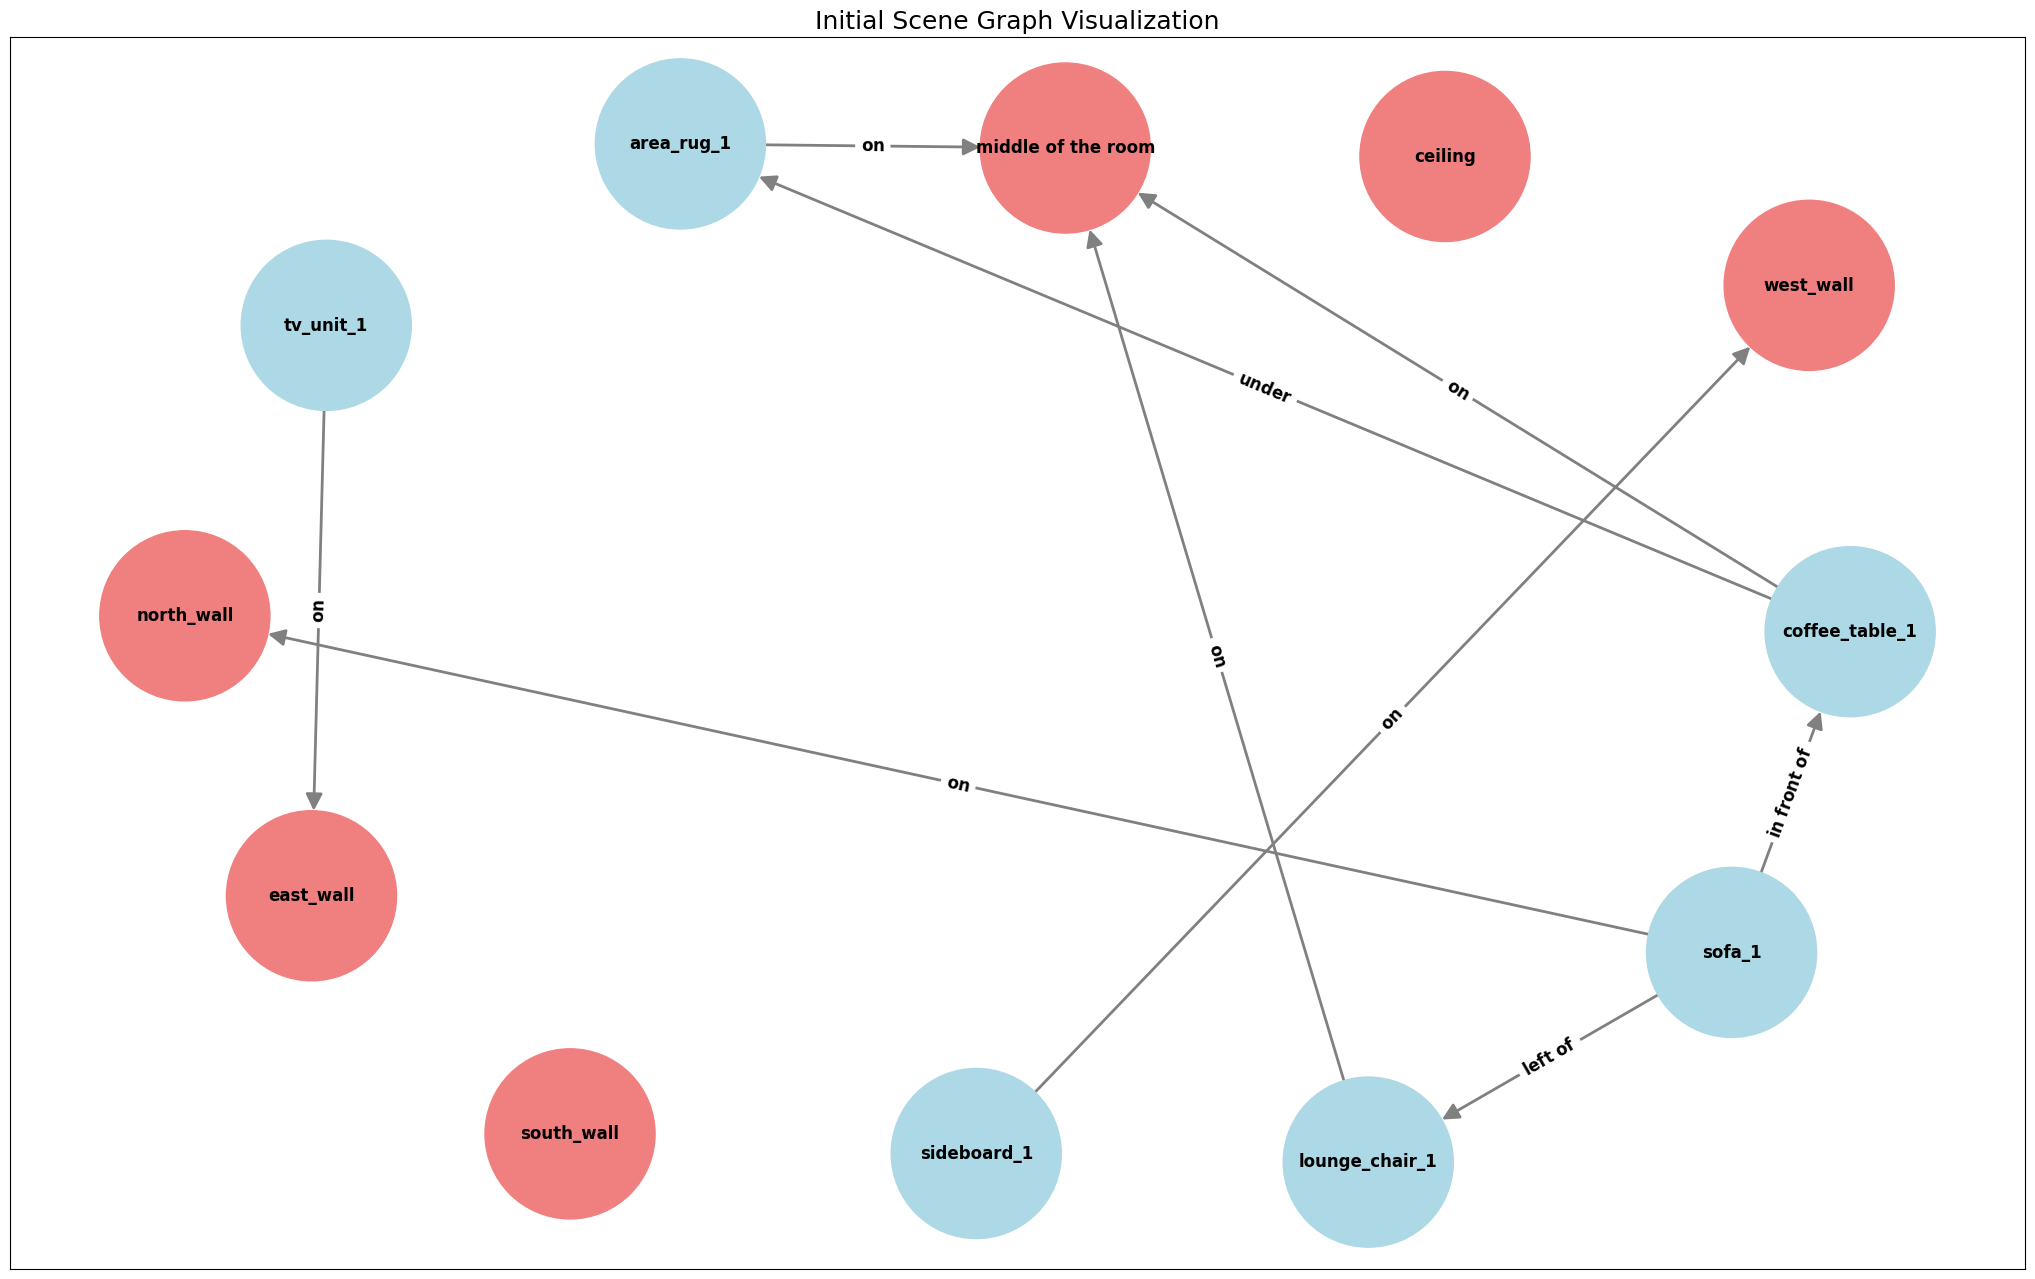

In [40]:
import networkx as nx
import matplotlib.pyplot as plt

ROOM_LAYOUT_ELEMENTS = {"south_wall", "north_wall", "west_wall", "east_wall", "ceiling", "middle of the room"}

def visualize_scene_graph(scene_graph, title):
    """
    Visualizes a scene graph with room layout elements, objects, and relationships.

    Args:
        scene_graph (dict): The scene graph data, containing objects and their relationships.
        title (str): The title of the graph visualization.
    """
    G = nx.DiGraph()

    # Add room layout elements as nodes
    for layout_element in ROOM_LAYOUT_ELEMENTS:
        G.add_node(layout_element, type="layout_element", color="lightcoral")

    # Add objects as nodes
    for obj in scene_graph["objects_in_room"]:
        G.add_node(
            obj["new_object_id"],
            style=obj["style"],
            material=obj["material"],
            size=obj["size_in_meters"],
            color="lightblue",
        )

    # Add edges based on adjacency relationships
    for obj in scene_graph["objects_in_room"]:
        for adjacent_obj in obj["placement"]["objects_in_room"]:
            G.add_edge(
                adjacent_obj["object_id"],
                obj["new_object_id"],
                relationship=adjacent_obj["preposition"],
            )

    # Add edges based on facing direction
    for obj in scene_graph["objects_in_room"]:
        if obj["facing"]:
            G.add_edge(obj["new_object_id"], obj["facing"], relationship="facing")

    # Add edges based on placement on room layout elements
    for obj in scene_graph["objects_in_room"]:
        for layout in obj["placement"]["room_layout_elements"]:
            G.add_edge(
                obj["new_object_id"], layout["layout_element_id"], relationship=layout["preposition"]
            )

    # Generate positions for nodes
    pos = nx.spring_layout(G, k=11.0, iterations=50, seed=3)

    # Configure figure dimensions
    plt.figure(figsize=(26, 16))

    # Extract node colors
    node_colors = [G.nodes[node].get("color", "gray") for node in G.nodes()]

    # Draw the graph
    nx.draw_networkx(
        G,
        pos,
        with_labels=True,
        node_size=15000,  
        node_color=node_colors,
        font_size=12,
        font_weight="bold",
        edge_color="gray",
        arrows=True,
        arrowsize=25,  
        width=2,
    )

    # Add edge labels
    edge_labels = {
        k: "$\\mathbf{{{}}}$".format(v.replace(" ", " \\ ")) for k, v in nx.get_edge_attributes(G, "relationship").items()
    }
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)

    # Set the title and display the plot
    plt.title(title, fontsize=18)
    plt.show()

    
title_initial = "Initial Scene Graph Visualization"
visualize_scene_graph(scene_graph, title_initial)

## Part 2. Correct design

In [41]:
ROOM_LAYOUT_ELEMENTS = ["south_wall", "north_wall", "west_wall", "east_wall", "ceiling", "middle of the room"]
DIRECTIONAL_PREPOSITIONS = ["left of", "right of", "in front of", "behind"]

In [42]:
layout_corrector_schema = {
    "type": "object",
    "properties": {
        "corrected_object": {
            "type": "object",
            "properties": {
                "new_object_id": {"type": "string"},
                "is_on_the_floor": {"type": "boolean"},
                "facing": {"type": "string"},
                "placement": {
                    "type": "object",
                    "properties": {
                        "room_layout_elements": {
                            "type": "array",
                            "items": {
                                "type": "object",
                                "properties": {
                                    "layout_element_id": {
                                        "type": "string",
                                        "enum": ROOM_LAYOUT_ELEMENTS
                                    },
                                    "preposition": {"type": "string", "enum": ["on", "in the corner"]}
                                },
                                "required": ["layout_element_id", "preposition"]
                            }
                        },
                        "objects_in_room": {
                            "type": "array",
                            "items": {
                                "type": "object",
                                "properties": {
                                    "object_id": {"type": "string"},
                                    "preposition": {
                                        "type": "string",
                                        "enum": ["on", "left of", "right of", "in front of", "behind", "under", "above"]
                                    },
                                    "is_adjacent": {"type": "boolean"}
                                },
                                "required": ["object_id", "preposition", "is_adjacent"]
                            }
                        }
                    },
                    "required": ["room_layout_elements", "objects_in_room"]
                }
            },
            "required": ["new_object_id", "is_on_the_floor", "facing", "placement"]
        }
    },
    "required": ["corrected_object"]
}

deletion_schema = {
    "type": "object",
    "properties": {
        "object_to_delete": {"type": "string"}
    },
    "required": ["object_to_delete"]
}

In [43]:
schemas = {
    "interior_designer": interior_designer_schema,
    "interior_architect": interior_architect_schema,
    "engineer": engineer_schema,
    "layout_corrector": layout_corrector_schema,
    "deletion": deletion_schema
}

In [44]:
class GroupChat:
    def __init__(self, agents, messages=None, max_round=15):
        self.agents = agents
        self.messages = messages if messages is not None else []
        self.max_round = max_round
        self.round = 0

    def agent_by_name(self, name):
        for agent in self.agents:
            if agent.name == name:
                return agent
        return None

    def select_speaker(self, last_speaker):
        raise NotImplementedError

    def run(self):
        last_speaker = None
        while self.round < self.max_round:
            self.round += 1
            speaker = self.select_speaker(last_speaker)
            if speaker is None:
                break
            response = speaker.respond(self.messages)
            self.messages.append({'role': 'assistant', 'content': response})
            last_speaker = speaker
        return self.messages

class LayoutCorrectorGroupChat(GroupChat):
    def __init__(self, agents, messages=None, max_round=15):
        super().__init__(agents, messages, max_round)
        self.previous_speaker = None

    def select_speaker(self, last_speaker):
        last_message = self.messages[-1]['content'] if self.messages else None
        last_speaker_name = last_speaker.name if last_speaker else "Admin"

        if last_speaker_name == "Admin":
            return self.agent_by_name("Spatial_corrector_agent")
        elif last_speaker_name == "Spatial_corrector_agent":
            return self.agent_by_name("Json_schema_debugger")
        elif last_speaker_name == "Json_schema_debugger":
            if last_message and "SUCCESS" not in last_message:
                return self.agent_by_name("Spatial_corrector_agent")
            else:
                return self.agent_by_name("Admin")
        else:
            print(f"Warning: Unexpected speaker '{last_speaker_name}' encountered.")
            return None

class ObjectDeletionGroupChat(GroupChat):
    def __init__(self, agents, messages=None, max_round=15):
        super().__init__(agents, messages, max_round)
        self.previous_speaker = None

    def select_speaker(self, last_speaker):
        last_message = self.messages[-1]['content'] if self.messages else None
        last_speaker_name = last_speaker.name if last_speaker else None

        if last_speaker_name == "Admin":
            return self.agent_by_name("Object_deletion_agent")
        elif last_speaker_name == "Object_deletion_agent":
            return self.agent_by_name("Json_schema_debugger")
        elif last_speaker_name == "Json_schema_debugger":
            if last_message and "SUCCESS" not in last_message:
                return self.agent_by_name("Object_deletion_agent")
            else:
                return self.agent_by_name("Admin")
        else:
            print(f"Warning: Unexpected speaker '{last_speaker_name}' encountered.")
            return None

class JSONSchemaAgent:
    def __init__(self, name, system_message, access_token, schema):
        self.name = name
        self.system_message = system_message
        self.access_token = access_token
        self.schema = schema
        self.history = []

    def reset(self):
        self.history = []

    def respond(self, messages):
        user_message = messages[-1]['content'] if messages else ''
        try:
            json_data = json.loads(user_message)
            validate(instance=json_data, schema=self.schema)
            response = "SUCCESS: JSON object is valid."
        except (json.JSONDecodeError, ValidationError) as e:
            response = f"ERROR: {str(e)}"
        return response

class ObjectCorrectionAgent:
    def __init__(self, name, system_message, access_token, schema):
        self.name = name
        self.system_message = system_message
        self.access_token = access_token
        self.schema = schema
        self.history = []

    def reset(self):
        self.history = []

    def generate_correction(self, conflict):
        # Default or fallback correction response
        corrected_object = {
            "corrected_object": {
                "new_object_id": conflict["new_object_id"],
                "is_on_the_floor": True,
                "facing": "south_wall",
                "placement": {
                    "room_layout_elements": [
                        {
                            "layout_element_id": "south_wall",
                            "preposition": "on"
                        }
                    ],
                    "objects_in_room": []
                }
            }
        }
        try:
            validate(instance=corrected_object, schema=self.schema)
            return corrected_object
        except ValidationError as e:
            print(f"Validation Error: {e}")
            return None


In [45]:
def get_corrector_agents(access_token, schemas):
    system_message_admin = "A human admin overseeing layout correction."

    system_message_spatial_corrector = """
    Spatial Corrector Agent: Your task is to resolve spatial conflicts by updating object properties in the "scene_graph" and ensuring their correct facing and placement.

    If an object is already placed "in the corner" and a conflict is detected, select one of the available vacant corners from the provided list to reposition the object.

    **For relative placements with other objects**, use:
    - "on", "left of", "right of", "in front of", "behind", "under".

    **For room layout elements**, use:
    - "on", "in the corner".

    **Example JSON Output:**
    ```json
    {
        "corrected_object": {
            "new_object_id": "table_1",
            "is_on_the_floor": true,
            "facing": "north_wall",
            "placement": {
                "room_layout_elements": [
                    {
                        "layout_element_id": "north_wall",
                        "preposition": "in the corner"
                    }
                ],
                "objects_in_room": [
                    {
                        "object_id": "chair_1",
                        "preposition": "left of",
                        "is_adjacent": true
                    }
                ]
            }
        }
    }
    ```
    """

    system_message_json_schema_debugger = """
    JSON Schema Debugger: Your role is to validate JSON objects against the layout schema. 
    Ensure that each JSON object strictly adheres to the schema definitions.

    **Example Valid JSON Output:**
    ```json
    {
        "corrected_object": {
            "new_object_id": "lamp_1",
            "is_on_the_floor": false,
            "facing": "west_wall",
            "placement": {
                "room_layout_elements": [
                    {
                        "layout_element_id": "west_wall",
                        "preposition": "on"
                    }
                ],
                "objects_in_room": [
                    {
                        "object_id": "table_1",
                        "preposition": "in front of",
                        "is_adjacent": true
                    }
                ]
            }
        }
    }
    ```
    """

    system_message_object_deletion = """
    Object Deletion Agent: When a list of objects in the room is too crowded, identify and suggest a single, less essential object for deletion.
    Ensure your JSON output strictly complies with the deletion schema.
    **Example JSON Output:** 
    ```json
    {
        "object_to_delete": "desk_1"
    }
    ```
    """

    json_schema_debugger = JSONSchemaAgent(
        name="Json_schema_debugger",
        system_message=system_message_json_schema_debugger,
        access_token=access_token,
        schema=schemas["layout_corrector"]
    )
    spatial_corrector_agent = ObjectCorrectionAgent(
        name="Spatial_corrector_agent",
        system_message=system_message_spatial_corrector,
        access_token=access_token,
        schema=schemas["layout_corrector"]
    )
    object_deletion_agent = ObjectCorrectionAgent(
        name="Object_deletion_agent",
        system_message=system_message_object_deletion,
        access_token=access_token,
        schema=schemas["deletion"]
    )
    return json_schema_debugger, spatial_corrector_agent, object_deletion_agent


In [46]:
import networkx as nx

def get_conflicts(G, scene_graph):
    """
    Aggregate all types of spatial and logical conflicts in the scene graph.
    Args:
        G (nx.DiGraph): Directed graph representing the scene graph.
        scene_graph (list): List of objects with their placement properties.

    Returns:
        list: Aggregated list of conflicts.
    """
    conflicts_wall = check_wall_relationship_impossibilities(G, scene_graph)
    conflicts_corner = check_corner_relationship_impossibilities(G, scene_graph)
    conflicts_room_layout = find_room_layout_conflicts(G, scene_graph)
    conflicts_one_parent = check_corner_relationships(G, scene_graph)
    conflicts_impossible_relationships = check_impossible_relationships(G, scene_graph)
    
    return (conflicts_corner + conflicts_room_layout + conflicts_one_parent +
            conflicts_impossible_relationships + conflicts_wall)


def get_size_conflicts(G, scene_graph, user_input, room_priors, verbose=False):
    """
    Identify size-related conflicts in the scene graph.
    Args:
        G (nx.DiGraph): Directed graph representing the scene graph.
        scene_graph (list): List of objects with their placement properties.
        user_input (dict): User preferences.
        room_priors (list): Room-specific layout constraints.
        verbose (bool): Flag for debug logging.

    Returns:
        list: List of size-related conflicts.
    """
    return check_size_conflicts(G, scene_graph, user_input, room_priors, verbose)


def preprocess_scene_graph(scene_graph):
    """
    Preprocess the scene graph by correcting invalid placements and resolving references.

    Args:
        scene_graph (list): List of objects with placement properties.

    Returns:
        list: Preprocessed scene graph.
    """
    # Collect all valid object IDs in the current scene graph
    valid_object_ids = {obj["new_object_id"] for obj in scene_graph}

    for obj in scene_graph:
        # Remove invalid room layout references
        obj["placement"]["room_layout_elements"] = [
            elem for elem in obj["placement"]["room_layout_elements"]
            if elem["layout_element_id"] != "middle of the room" or obj["is_on_the_floor"]
        ]

        # Correct invalid prepositions
        for elem in obj["placement"]["room_layout_elements"]:
            if elem["preposition"] == "in the corner" and elem["layout_element_id"] in ["middle of the room", "ceiling"]:
                elem["preposition"] = "on"

        # Clean up references to non-existent objects in "objects_in_room"
        obj["placement"]["objects_in_room"] = [
            elem for elem in obj["placement"]["objects_in_room"]
            if elem["object_id"] in valid_object_ids
        ]

        # Validate and resolve object references in "objects_in_room"
        for elem in obj["placement"]["objects_in_room"]:
            if elem["object_id"] not in valid_object_ids:
                closest_id = next(
                    iter([x["new_object_id"] for x in scene_graph if elem["object_id"] in x["new_object_id"]]), None
                )
                if closest_id:
                    elem["object_id"] = closest_id
                else:
                    print(f"[Warning] Object {elem['object_id']} not found. Removing invalid reference.")
                    obj["placement"]["objects_in_room"] = [
                        x for x in obj["placement"]["objects_in_room"] if x["object_id"] != elem["object_id"]
                    ]

    return scene_graph





def find_room_layout_conflicts(G, scene_graph):
    """
    Identify conflicts related to room layout.

    Args:
        G (nx.DiGraph): Directed graph representing the scene graph.
        scene_graph (list): List of objects with placement properties.

    Returns:
        list: List of room layout conflicts.
    """
    conflicts = []
    topological_order = list(nx.topological_sort(G))
    node_layout = dict(G.nodes(data=True))

    for node in topological_order:
        if node not in ROOM_LAYOUT_ELEMENTS:
            parents = list(G.predecessors(node))
            # Convert dict layouts to immutable tuples for comparison
            parent_layouts = [tuple(node_layout[p].items()) if isinstance(node_layout[p], dict) else node_layout[p] for p in parents]
            different_parent_layout = len(set(parent_layouts)) > 1

            if different_parent_layout:
                conflict = f"Object {node} has incompatible parent layouts: {parents}."
                conflicts.append(conflict)

    return conflicts


def is_thin_object(obj):
    """
    Determine if an object is thin, based on its height dimension.

    For a rug with height ~0.05, this returns True so it is not removed
    when 'under' is encountered.
    """
    return obj["size_in_meters"]["height"] < 0.2


def build_graph(scene_graph):
    """
    Constructs a directed acyclic graph (DAG) from the scene graph.
    Normally edges go object -> other_obj, except for "under", 
    which we invert to other_obj -> object to keep the meaning consistent.
    
    Edge 'weight' dict:
      {
        "preposition": <string>,
        "adjacency": <bool>
      }
    so conflict checks can do G[u][v]["weight"]["preposition"].
    """
    G = nx.DiGraph()

    for obj in scene_graph:
        obj_id = obj["new_object_id"]

        # Ensure the object node exists
        G.add_node(obj_id)

        # 1) OBJECT -> ROOM LAYOUT (unchanged)
        for constraint in obj["placement"].get("room_layout_elements", []):
            layout_id = constraint["layout_element_id"]
            prep = constraint.get("preposition", "")
            G.add_node(layout_id)
            G.add_edge(
                obj_id,
                layout_id,
                weight={"preposition": prep, "adjacency": False}
            )

        # 2) OBJECT -> OBJECT except if "under", invert it
        for constraint in obj["placement"].get("objects_in_room", []):
            other_obj_id = constraint["object_id"]
            prep = constraint.get("preposition", "")
            adj = constraint.get("is_adjacent", True)
            G.add_node(other_obj_id)

            if prep == "under":
                # If 'obj says it is under other_obj', we do other_obj -> obj
                # so that 'obj' is the child node. 
                # Example: sofa "under" coffee_table => coffee_table -> sofa
                G.add_edge(
                    other_obj_id,
                    obj_id,
                    weight={"preposition": prep, "adjacency": adj}
                )
            else:
                # Normal arrow: obj -> other_obj
                G.add_edge(
                    obj_id,
                    other_obj_id,
                    weight={"preposition": prep, "adjacency": adj}
                )

    return G


def handle_under_prepositions(G, scene_graph):
    """
    1) Finds all edges where the 'preposition' = 'under'.
    2) If the "under" node is NOT thin, we try reversing the edge.
    3) If reversing is also invalid, we remove the node from both the graph and the scene_graph.

    Args:
        G (nx.DiGraph): Current directed graph.
        scene_graph (list): List of objects, each with 'new_object_id'.

    Returns:
        (nx.DiGraph, list): Updated graph and updated scene_graph.
    """
    edges_to_process = []
    # Gather edges that have preposition 'under'
    for u, v, data in list(G.edges(data=True)):
        weight_data = data.get("weight", {})
        if weight_data.get("preposition") == "under":
            edges_to_process.append((u, v))

    for (u, v) in edges_to_process:
        # "u UNDER v" means the arrow is u->v in your reversed-edges logic
        # i.e. "u is the child, v is the parent."
        obj_u = get_object_from_scene_graph(u, scene_graph)
        obj_v = get_object_from_scene_graph(v, scene_graph)
        
        # If either object doesn't actually exist, remove the edge
        # and continue
        if (not obj_u) or (not obj_v):
            G.remove_edge(u, v)
            continue
        
        # If 'u' is THIN => it's valid, do nothing
        if is_thin_object(obj_u):
            # Great, keep the 'u -> v' under relationship as is
            continue
        else:
            # 1) Remove the original edge "u->v"
            if G.has_edge(u, v):
                G.remove_edge(u, v)

            # 2) Try reversing: "v->u"
            #    Means "v" is under "u" now
            G.add_edge(v, u, weight={"preposition": "under", "adjacency": True})
            
            # 3) If the reversed object 'v' is also not thin => remove 'u' or 'v'?
            #    Typically you'd remove the "under" object itself if it still doesn't make sense.
            #    Let's check if 'v' is thin. If it's also not thin, remove 'u' node entirely (or 'v'—your choice).
            if not is_thin_object(obj_v):
                # For this example, let's remove the original "under" object 'u'
                # because neither direction made sense
                if G.has_node(u):
                    G.remove_node(u)
                scene_graph = [obj for obj in scene_graph if obj["new_object_id"] != u]

                # Also remove the reversed edge we just created (v->u) if it exists
                if G.has_edge(v, u):
                    G.remove_edge(v, u)

    return G, scene_graph


In [47]:
def check_corner_relationships(G, scene_graph):
    """
    Validate corner relationships and resolve conflicts in the graph.

    Args:
        G (nx.DiGraph): Directed graph representing the scene graph.
        scene_graph (list): List of objects with placement properties.

    Returns:
        list: List of corner-related conflicts.
    """
    def find_corner_vacancies():
        corners = [
            ("south_wall", "west_wall"),
            ("south_wall", "east_wall"),
            ("north_wall", "west_wall"),
            ("north_wall", "east_wall"),
        ]
        occupied_corners = set()
        for node in G.nodes():
            parents = list(G.predecessors(node))
            for wall_1, wall_2 in corners:
                if wall_1 in parents and wall_2 in parents:
                    occupied_corners.add((wall_1, wall_2))
        return list(set(corners) - occupied_corners)

    conflicts = []
    corner_occupancy = {corner: [] for corner in [
        ("south_wall", "west_wall"),
        ("south_wall", "east_wall"),
        ("north_wall", "west_wall"),
        ("north_wall", "east_wall"),
    ]}

    for node in G.nodes():
        parents = list(G.predecessors(node))
        if any(G[p][node]["weight"]["preposition"] == "in the corner" for p in parents):
            walls = [p for p in parents if p in ROOM_LAYOUT_ELEMENTS]
            if len(walls) == 1:
                vacant_corners = find_corner_vacancies()
                conflicts.append(
                    f"Object {node} has only one wall for 'corner' relationship. Add another wall from these vacant corners: {vacant_corners}."
                )

    for corner, objects in corner_occupancy.items():
        if len(objects) > 1:
            vacant_corners = find_corner_vacancies()
            conflicts.append(
                f"Corner {corner[0]}-{corner[1]} is overcrowded with objects: {objects}. Move one to a vacant corner: {vacant_corners}."
            )

    return conflicts


def check_wall_relationship_impossibilities(G, scene_graph):
    """
    Identify conflicts where wall relationships are impossible.

    Args:
        G (nx.DiGraph): Directed graph representing the scene graph.
        scene_graph (list): List of objects with placement properties.

    Returns:
        list: List of wall relationship conflicts.
    """
    wall_impossible_preps = {
        "south_wall": "behind",
        "north_wall": "in front",
        "west_wall": "left of",
        "east_wall": "right of",
    }
    conflicts = []

    for node in G.nodes():
        parents = list(G.predecessors(node))
        for parent in parents:
            if parent in wall_impossible_preps:
                impossible_prep = wall_impossible_preps[parent]
                if G[parent][node]["weight"]["preposition"] == impossible_prep:
                    conflicts.append(
                        f"Object {node} cannot be {impossible_prep} the {parent}. Update the relationship or move the object."
                    )
    return conflicts


def check_impossible_relationships(G, scene_graph):
    """
    Identify conflicts where relationships between objects are impossible.

    Args:
        G (nx.DiGraph): Directed graph representing the scene graph.
        scene_graph (list): List of objects with placement properties.

    Returns:
        list: List of impossible relationship conflicts.
    """
    conflicts = []
    for node in G.nodes():
        parents = list(G.predecessors(node))
        for parent in parents:
            preposition = G[parent][node]["weight"]["preposition"]
            adjacency = G[parent][node]["weight"]["adjacency"]
            if adjacency and preposition not in ["left of", "right of", "in front of", "behind", "on"]:
                conflicts.append(
                    f"Object {node} has an impossible relationship '{preposition}' with {parent}."
                )
    return conflicts


def get_cluster_size(node, G, scene_graph):
    """
    Calculate the size of the cluster of objects connected to the given node.

    Args:
        node (str): Node ID.
        G (nx.DiGraph): Directed graph representing the scene graph.
        scene_graph (list): List of objects with placement properties.

    Returns:
        tuple: Size constraints and list of child objects in the cluster.
    """
    node_obj = get_object_from_scene_graph(node, scene_graph)
    cluster_size = {"length": 0.0, "width": 0.0}
    children = []

    for _, child, edge_data in G.out_edges(node, data=True):
        preposition = edge_data["weight"]["preposition"]
        if preposition in ["left of", "right of"]:
            cluster_size["length"] += get_object_from_scene_graph(child, scene_graph)["size_in_meters"]["length"]
        elif preposition in ["in front of", "behind"]:
            cluster_size["width"] += get_object_from_scene_graph(child, scene_graph)["size_in_meters"]["width"]
        children.append(child)

    return cluster_size, children


# def check_size_conflicts(G, scene_graph, user_input, room_priors, verbose=False):
#     """
#     Identify conflicts related to object sizes and placement.

#     Args:
#         G (nx.DiGraph): Directed graph representing the scene graph.
#         scene_graph (list): List of objects with placement properties.
#         user_input (dict): User preferences.
#         room_priors (list): Room-specific layout constraints.
#         verbose (bool): Flag for debug logging.

#     Returns:
#         list: List of size-related conflicts as dictionaries.
#     """
#     conflicts = []
#     for node in G.nodes():
#         if node not in ROOM_LAYOUT_ELEMENTS:
#             cluster_size, _ = get_cluster_size(node, G, scene_graph)
#             node_obj = get_object_from_scene_graph(node, scene_graph)
#             length = node_obj["size_in_meters"]["length"]
#             width = node_obj["size_in_meters"]["width"]

#             if length < cluster_size["length"]:
#                 conflicts.append({
#                     "object_to_remove": node,
#                     "conflict_description": f"Object {node} is too small in length to fit its cluster. Consider resizing or removing objects."
#                 })
#             if width < cluster_size["width"]:
#                 conflicts.append({
#                     "object_to_remove": node,
#                     "conflict_description": f"Object {node} is too small in width to fit its cluster. Consider resizing or removing objects."
#                 })
#     return conflicts



def get_object_from_scene_graph(obj_id, scene_graph):
    """
    Retrieve an object from the scene graph by its ID.

    Args:
        obj_id (str): Object ID.
        scene_graph (list): List of objects with placement properties.

    Returns:
        dict: Object data.
    """
    return next((obj for obj in scene_graph if obj["new_object_id"] == obj_id), None)



def validate_scene_graph(scene_graph):
    """
    Validate the scene graph for missing or incorrect properties.

    Args:
        scene_graph (list): List of objects with placement properties.

    Raises:
        ValueError: If validation fails.
    """
    required_keys = {"new_object_id", "size_in_meters", "placement"}
    for obj in scene_graph:
        if not required_keys.issubset(obj.keys()):
            raise ValueError(f"Object {obj['new_object_id']} is missing required keys.")
        if not isinstance(obj["placement"], dict):
            raise ValueError(f"Invalid placement data for object {obj['new_object_id']}.")


In [48]:
def visualize_graph_with_prepositions(G, output_path, prompt_text=None):
    """
    Custom graph visualization to enhance clarity with preposition titles on edges.

    Args:
        G (nx.DiGraph): Directed graph representing spatial relationships.
        output_path (str): Path to save the visualization image.
        prompt_text (str): Optional user prompt to display in the visualization.

    Returns:
        None
    """
    import matplotlib.pyplot as plt

    try:
        # Ensure node names are strings for compatibility
        G = nx.relabel_nodes(G, lambda x: str(x))

        # Set up the figure
        plt.figure(figsize=(16, 12))

        # Compute positions with a shell layout for a structured view
        pos = nx.shell_layout(G)

        # Draw nodes with improved styling
        nx.draw_networkx_nodes(G, pos, node_size=3000, node_color="skyblue", alpha=0.9)
        nx.draw_networkx_labels(G, pos, font_size=10, font_weight="bold", verticalalignment="center")

        # Draw edges with arrows
        nx.draw_networkx_edges(
            G,
            pos,
            arrowstyle="-|>",
            arrowsize=20,
            edge_color="gray",
            connectionstyle="arc3,rad=0.2",  # Creates slight curves in edges for clarity
        )

        # Add edge labels with preposition info
        edge_labels = {
            (u, v): f"{data.get('weight', {}).get('preposition', '')}" for u, v, data in G.edges(data=True)
        }
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

        # Add user prompt text if provided
        if prompt_text:
            plt.text(
                0.5,
                1.05,
                prompt_text,
                horizontalalignment="center",
                fontsize=12,
                bbox=dict(facecolor="lightblue", edgecolor="black", boxstyle="round,pad=0.5"),
                transform=plt.gca().transAxes,
            )

        # Save the graph visualization
        plt.title("Scene Graph Visualization", fontsize=14, fontweight="bold")
        plt.tight_layout()
        plt.savefig(output_path)
        plt.close()
        print(f"Graph visualization saved to {output_path}")

    except Exception as e:
        print(f"[Error] Failed to save graph visualization: {e}")


In [49]:
def resolve_spatial_conflicts(conflicts, scene_graph):
    """
    Processes spatial conflicts and structures them for resolution.

    Args:
        conflicts (list): List of conflicts.
        scene_graph (dict): Current scene graph.

    Returns:
        list: Structured conflicts for resolution.
    """
    structured_conflicts = []
    for conflict in conflicts:
        if isinstance(conflict, str):
            match = re.search(r"Object to reposition: \{'new_object_id': '(\w+)'", conflict)
            object_id = match.group(1) if match else None
            if object_id:
                structured_conflicts.append({
                    "conflict_description": conflict,
                    "new_object_id": object_id,
                    "vacant_corners": ['north-west corner', 'north-east corner', 'south-east corner', 'south-west corner']
                })
        elif isinstance(conflict, dict):
            structured_conflicts.append(conflict)
    return structured_conflicts


def resolve_spatial_conflict(conflict, scene_graph, G):
    """
    Resolves a single spatial conflict and updates the graph.

    Args:
        conflict (dict): Conflict to resolve.
        scene_graph (dict): Current scene graph.
        G (nx.DiGraph): Current graph.

    Returns:
        None
    """
    # Simulated resolution logic; implement based on actual requirements
    print(f"Resolving spatial conflict: {conflict['conflict_description']}")
    corrected_object_id = conflict["new_object_id"]

    # Example: Reposition the object to a vacant corner
    vacant_corners = conflict.get("vacant_corners", [])
    if vacant_corners:
        # Update object placement in the scene graph
        corrected_object = next(
            (obj for obj in scene_graph["objects_in_room"] if obj["new_object_id"] == corrected_object_id), None
        )
        if corrected_object:
            corrected_object["placement"]["room_layout_elements"] = [
                {"layout_element_id": vacant_corners[0], "preposition": "on"}
            ]

        # Update the graph
        G.add_edge(vacant_corners[0], corrected_object_id, weight={"preposition": "on", "adjacency": True})


# def resolve_size_conflict(conflict, scene_graph, G):
#     """
#     Resolves a single size conflict by removing an object from the scene.

#     Args:
#         conflict (dict or str): Conflict to resolve. If a dictionary, it should contain `object_to_remove`.
#         scene_graph (dict): Current scene graph.
#         G (nx.DiGraph): Current graph.

#     Returns:
#         None
#     """
#     if isinstance(conflict, str):
#         print(f"[Warning] Received conflict as a string: {conflict}. Skipping resolution.")
#         return

#     object_to_remove = conflict.get("object_to_remove")
#     if not object_to_remove:
#         print("[Error] No object specified for removal.")
#         return

#     # Remove the object from the scene graph
#     scene_graph["objects_in_room"] = [
#         obj for obj in scene_graph["objects_in_room"] if obj["new_object_id"] != object_to_remove
#     ]
#     print(f"Removed object {object_to_remove} from scene graph.")

#     # Remove the object from the graph
#     if object_to_remove in G.nodes:
#         G.remove_node(object_to_remove)
#         print(f"Removed object {object_to_remove} from graph.")


def check_size_conflicts(G, scene_graph, user_input, room_priors, verbose=False):
    """
    Identify conflicts related to object sizes and placement.
    Instead of just 'object_to_remove', we store how big it needs to be 
    to fit its cluster (so 'needed_length' and 'needed_width').
    """
    conflicts = []
    for node in G.nodes():
        if node not in ROOM_LAYOUT_ELEMENTS:
            cluster_size, _ = get_cluster_size(node, G, scene_graph)
            node_obj = get_object_from_scene_graph(node, scene_graph)
            length = node_obj["size_in_meters"]["length"]
            width = node_obj["size_in_meters"]["width"]

            # If length is insufficient
            if length < cluster_size["length"]:
                needed_length = cluster_size["length"]
                conflicts.append({
                    "object_id": node,
                    "needed_length": needed_length,
                    "needed_width": width,  # keep current width as is
                    "conflict_description": (
                        f"Object {node} is too small in length to fit its cluster "
                        f"(needs >= {needed_length:.2f}m). Consider resizing or removing."
                    )
                })
            
            # If width is insufficient
            if width < cluster_size["width"]:
                needed_width = cluster_size["width"]
                conflicts.append({
                    "object_id": node,
                    "needed_length": length,  # keep current length as is
                    "needed_width": needed_width,
                    "conflict_description": (
                        f"Object {node} is too small in width to fit its cluster "
                        f"(needs >= {needed_width:.2f}m). Consider resizing or removing."
                    )
                })
    return conflicts


def resolve_size_conflict(conflict, scene_graph, G):
    """
    Tries to fix size conflicts by resizing the object up to the needed dimension.
    If resizing still doesn't fix the conflict, remove as a fallback.
    
    The conflict dict now has:
      - "object_id"
      - "needed_length"
      - "needed_width"
      - "conflict_description"
    """
    # If the conflict is just a string, we skip
    if isinstance(conflict, str):
        print(f"[Warning] Received conflict as a string: {conflict}. Skipping resolution.")
        return

    # Extract info from the conflict
    object_id = conflict.get("object_id")
    needed_length = conflict.get("needed_length", 0.0)
    needed_width = conflict.get("needed_width", 0.0)

    if not object_id:
        print("[Error] No 'object_id' specified for resizing/removal.")
        return

    # Find the object in scene_graph["objects_in_room"], not the entire scene_graph
    node_obj = get_object_from_scene_graph(object_id, scene_graph["objects_in_room"])
    if not node_obj:
        print(f"[Warning] Object {object_id} not found in scene graph. Skipping resolution.")
        return

    old_length = node_obj["size_in_meters"]["length"]
    old_width  = node_obj["size_in_meters"]["width"]

    print(f"Attempting to fix size conflict for '{object_id}': {conflict['conflict_description']}")
    print(f"  Current (L={old_length}, W={old_width}),  Needed (L>={needed_length}, W>={needed_width})")

    # 1) Resize up to the needed dimension plus a small buffer
    new_length = max(old_length, needed_length) + 0.05
    new_width  = max(old_width, needed_width) + 0.05

    # Apply resizing
    node_obj["size_in_meters"]["length"] = round(new_length, 2)
    node_obj["size_in_meters"]["width"]  = round(new_width, 2)

    print(f"  => Resized to (L={node_obj['size_in_meters']['length']}, W={node_obj['size_in_meters']['width']})")

    # 2) Double-check if that actually solves the conflict
    #    We'll re-check the cluster size for this object
    cluster_size, _ = get_cluster_size(object_id, G, scene_graph["objects_in_room"])
    if (node_obj["size_in_meters"]["length"] < cluster_size["length"] or
        node_obj["size_in_meters"]["width"] < cluster_size["width"]):
        # If it's still too small, remove it
        print(f"  => Still too small after resizing. Removing '{object_id}'.")

        # Remove from the scene_graph
        scene_graph["objects_in_room"] = [
            o for o in scene_graph["objects_in_room"] if o["new_object_id"] != object_id
        ]
        # Remove from the graph
        if object_id in G:
            G.remove_node(object_id)
        print(f"Removed '{object_id}' from scene and graph.")
    else:
        print(f"  => Successfully resized '{object_id}'. No removal needed.")



In [50]:
output_dir="visualizations"

In [51]:
def correct_design(scene_graph, user_input, room_priors, access_token, verbose=False, auto_prune=True, output_dir="visualizations"):
    """
    Resolves spatial and size-related conflicts in the scene graph, with visualization at each step.

    Args:
        scene_graph (dict): Scene graph containing objects and their placements.
        user_input (dict): User preferences for object importance or room functionality.
        room_priors (list): Room-specific layout constraints.
        access_token (str): API access token for agents.
        verbose (bool): If True, enables debug logging.
        auto_prune (bool): If True, automatically resolves size conflicts by pruning objects.
        output_dir (str): Directory to save visualizations.

    Returns:
        dict: Updated scene graph after resolving conflicts.
    """
    os.makedirs(output_dir, exist_ok=True)

    # Validate and preprocess the scene graph
    if "objects_in_room" not in scene_graph:
        raise ValueError("Invalid scene graph: Missing 'objects_in_room' key.")
    validate_scene_graph(scene_graph["objects_in_room"])
    scene_graph["objects_in_room"] = preprocess_scene_graph(scene_graph["objects_in_room"])

    # Build the initial graph
    G = build_graph(scene_graph["objects_in_room"])
    visualize_G(G, output_path=f"{output_dir}/initial_graph.png", prompt_text="Initial Scene Graph")

    # Handle spatial relationships and preprocess graph
    G, scene_graph["objects_in_room"] = handle_under_prepositions(G, scene_graph["objects_in_room"])
    visualize_G(G, output_path=f"{output_dir}/preprocessed_graph.png", prompt_text="After Preprocessing")

    # Detect and resolve spatial conflicts
    detect_and_remove_cycle(G)
    conflicts = get_conflicts(G, scene_graph["objects_in_room"])
    if verbose:
        print("-------------------SPATIAL CONFLICTS-------------------")
        for conflict in conflicts:
            print(conflict)

    structured_conflicts = resolve_spatial_conflicts(conflicts, scene_graph)
    if structured_conflicts:
        for conflict in structured_conflicts:
            resolve_spatial_conflict(conflict, scene_graph, G)

    visualize_G(G, output_path=f"{output_dir}/spatial_conflicts_resolved_graph.png", prompt_text="Spatial Conflicts Resolved")

    # Handle size conflicts
    if auto_prune:
        size_conflicts = check_size_conflicts(G, scene_graph["objects_in_room"], user_input, room_priors, verbose)
        if verbose:
            print("-------------------SIZE CONFLICTS-------------------")
            for conflict in size_conflicts:
                print(conflict)

        while size_conflicts:
            resolve_size_conflict(size_conflicts[0], scene_graph, G)
            size_conflicts = check_size_conflicts(G, scene_graph["objects_in_room"], user_input, room_priors, verbose)

    visualize_G(G, output_path=f"{output_dir}/size_conflicts_resolved_graph.png", prompt_text="Size Conflicts Resolved")

    return {"objects_in_room": scene_graph["objects_in_room"]}


In [52]:
scene_graph = {'objects_in_room': [{'new_object_id': 'sofa_1',
   'style': 'Modern',
   'material': 'Leather',
   'size_in_meters': {'length': 2.0, 'width': 1.0, 'height': 0.8},
   'is_on_the_floor': True,
   'facing': 'north_wall',
   'placement': {'room_layout_elements': [{'layout_element_id': 'north_wall',
      'preposition': 'on'}],
    'objects_in_room': []}},
  {'new_object_id': 'coffee_table_1',
   'style': 'Modern',
   'material': 'Glass and Metal',
   'size_in_meters': {'length': 1.2, 'width': 0.8, 'height': 0.4},
   'is_on_the_floor': True,
   'facing': 'middle of the room',
   'placement': {'room_layout_elements': [{'layout_element_id': 'middle of the room',
      'preposition': 'on'}],
    'objects_in_room': [{'object_id': 'sofa_1',
      'preposition': 'in front of',
      'is_adjacent': True}]}},
  {'new_object_id': 'tv_unit_1',
   'style': 'Modern',
   'material': 'MDF',
   'size_in_meters': {'length': 1.8, 'width': 0.6, 'height': 0.4},
   'is_on_the_floor': True,
   'facing': 'east_wall',
   'placement': {'room_layout_elements': [{'layout_element_id': 'east_wall',
      'preposition': 'on'}],
    'objects_in_room': []}},
  {'new_object_id': 'sideboard_1',
   'style': 'Modern',
   'material': 'Wood',
   'size_in_meters': {'length': 1.5, 'width': 0.5, 'height': 0.8},
   'is_on_the_floor': True,
   'facing': 'west_wall',
   'placement': {'room_layout_elements': [{'layout_element_id': 'west_wall',
      'preposition': 'on'}],
    'objects_in_room': []}},
  {'new_object_id': 'area_rug_1',
   'style': 'Modern',
   'material': 'Synthetic Fiber',
   'size_in_meters': {'length': 2.0, 'width': 2.0, 'height': 0.02},
   'is_on_the_floor': True,
   'facing': 'middle of the room',
   'placement': {'room_layout_elements': [{'layout_element_id': 'middle of the room',
      'preposition': 'on'}],
    'objects_in_room': [{'object_id': 'coffee_table_1',
      'preposition': 'under',
      'is_adjacent': True}]}},
  {'new_object_id': 'lounge_chair_1',
   'style': 'Modern',
   'material': 'Fabric',
   'size_in_meters': {'length': 1.0, 'width': 1.0, 'height': 0.8},
   'is_on_the_floor': True,
   'facing': 'middle of the room',
   'placement': {'room_layout_elements': [{'layout_element_id': 'middle of the room',
      'preposition': 'on'}],
    'objects_in_room': [{'object_id': 'sofa_1',
      'preposition': 'left of',
      'is_adjacent': True}]}}]}

In [53]:
# import networkx as nx
# import matplotlib.pyplot as plt

# ROOM_LAYOUT_ELEMENTS = {"south_wall", "north_wall", "west_wall", "east_wall", "ceiling", "middle of the room"}


# def visualize_scene_graph(scene_graph, title):
#     """
#     Visualizes a scene graph with room layout elements, objects, and relationships.

#     Args:
#         scene_graph (dict): The scene graph data, containing objects and their relationships.
#         title (str): The title of the graph visualization.
#     """
#     G = nx.DiGraph()

#     # Add room layout elements as nodes
#     for layout_element in ROOM_LAYOUT_ELEMENTS:
#         G.add_node(layout_element, type="layout_element", color="lightcoral")

#     # Add objects as nodes
#     for obj in scene_graph["objects_in_room"]:
#         G.add_node(
#             obj["new_object_id"],
#             style=obj["style"],
#             material=obj["material"],
#             size=obj["size_in_meters"],
#             color="lightblue",
#         )

#     # Add edges based on adjacency relationships
#     for obj in scene_graph["objects_in_room"]:
#         for adjacent_obj in obj["placement"]["objects_in_room"]:
#             G.add_edge(
#                 adjacent_obj["object_id"],
#                 obj["new_object_id"],
#                 relationship=adjacent_obj["preposition"],
#             )

#     # Add edges based on facing direction
#     for obj in scene_graph["objects_in_room"]:
#         if obj["facing"]:
#             G.add_edge(obj["new_object_id"], obj["facing"], relationship="facing")

#     # Add edges based on placement on room layout elements
#     for obj in scene_graph["objects_in_room"]:
#         for layout in obj["placement"]["room_layout_elements"]:
#             G.add_edge(
#                 obj["new_object_id"], layout["layout_element_id"], relationship=layout["preposition"]
#             )

#     # Generate positions for nodes
#     pos = nx.spring_layout(G, k=11.0, iterations=50, seed=3)

#     # Configure figure dimensions
#     plt.figure(figsize=(26, 16))

#     # Extract node colors
#     node_colors = [G.nodes[node].get("color", "gray") for node in G.nodes()]

#     # Draw the graph
#     nx.draw_networkx(
#         G,
#         pos,
#         with_labels=True,
#         node_size=16000,  # Adjusted node size
#         node_color=node_colors,
#         font_size=12,
#         font_weight="bold",
#         edge_color="gray",
#         arrows=True,
#         arrowsize=25,  # Adjusted arrow size
#         width=2,
#     )

#     # Add edge labels with bold text and proper spacing
#     edge_labels = {
#         k: "$\\mathbf{{{}}}$".format(v.replace(" ", " \\ ")) for k, v in nx.get_edge_attributes(G, "relationship").items()
#     }
#     nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)

#     # Set the title and display the plot
#     plt.title(title, fontsize=18)
#     plt.show()

In [54]:
import networkx as nx
import matplotlib.pyplot as plt

ROOM_LAYOUT_ELEMENTS = {
    "south_wall",
    "north_wall",
    "west_wall",
    "east_wall",
    "ceiling",
    "middle of the room"
}

def visualize_G(G, output_path="graph.png", prompt_text="Graph Visualization"):
    """
    Visualizes a NetworkX DiGraph and saves it to 'output_path'
    with a white background (no interactive display).
    
    Args:
        G (nx.DiGraph): The directed graph to visualize.
        output_path (str): File path for the saved image. Defaults to 'graph.png'.
        prompt_text (str): Title text for the graph.
    """
    # Create a new figure with white background
    plt.figure(figsize=(36, 24), facecolor="white")

    # Use weight=None so we ignore your dictionary-based 'weight'
    # and treat all edges equally for layout
    pos = nx.spring_layout(G, k=15.0, iterations=50, seed=3, weight=None)

    # Assign node colors
    node_colors = []
    for node in G.nodes():
        if node in ROOM_LAYOUT_ELEMENTS:
            node_colors.append("lightcoral")
        else:
            node_colors.append("lightblue")

    # Draw nodes & edges
    nx.draw_networkx(
        G,
        pos,
        with_labels=True,
        node_size=15000,
        node_color=node_colors,
        font_size=22,
        font_weight="bold",
        edge_color="gray",
        arrows=True,
        arrowsize=25,
        width=2,
    )

    # Build edge labels from G[u][v]["weight"] if it’s a dict
    edge_labels = {}
    for (u, v) in G.edges():
        weight_data = G[u][v].get("weight", {})
        if isinstance(weight_data, dict):
            prep = weight_data.get("preposition", "")
            if not prep and weight_data.get("adjacency"):
                prep = "adjacent"
            if prep:
                latex_str = prep.replace(" ", " \\ ")
                edge_labels[(u, v)] = f"$\\mathbf{{{latex_str}}}$"

    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=20)

    # Force axes region to white as well
    ax = plt.gca()
    ax.set_facecolor("white")

    plt.title(prompt_text, fontsize=42)
    plt.axis("off")
    plt.tight_layout()

    # Save with white facecolor and 'tight' bounding box
    plt.savefig(output_path, facecolor="white", bbox_inches="tight")
    plt.show()
    plt.close()
    print(f"Graph visualization saved to {output_path}")


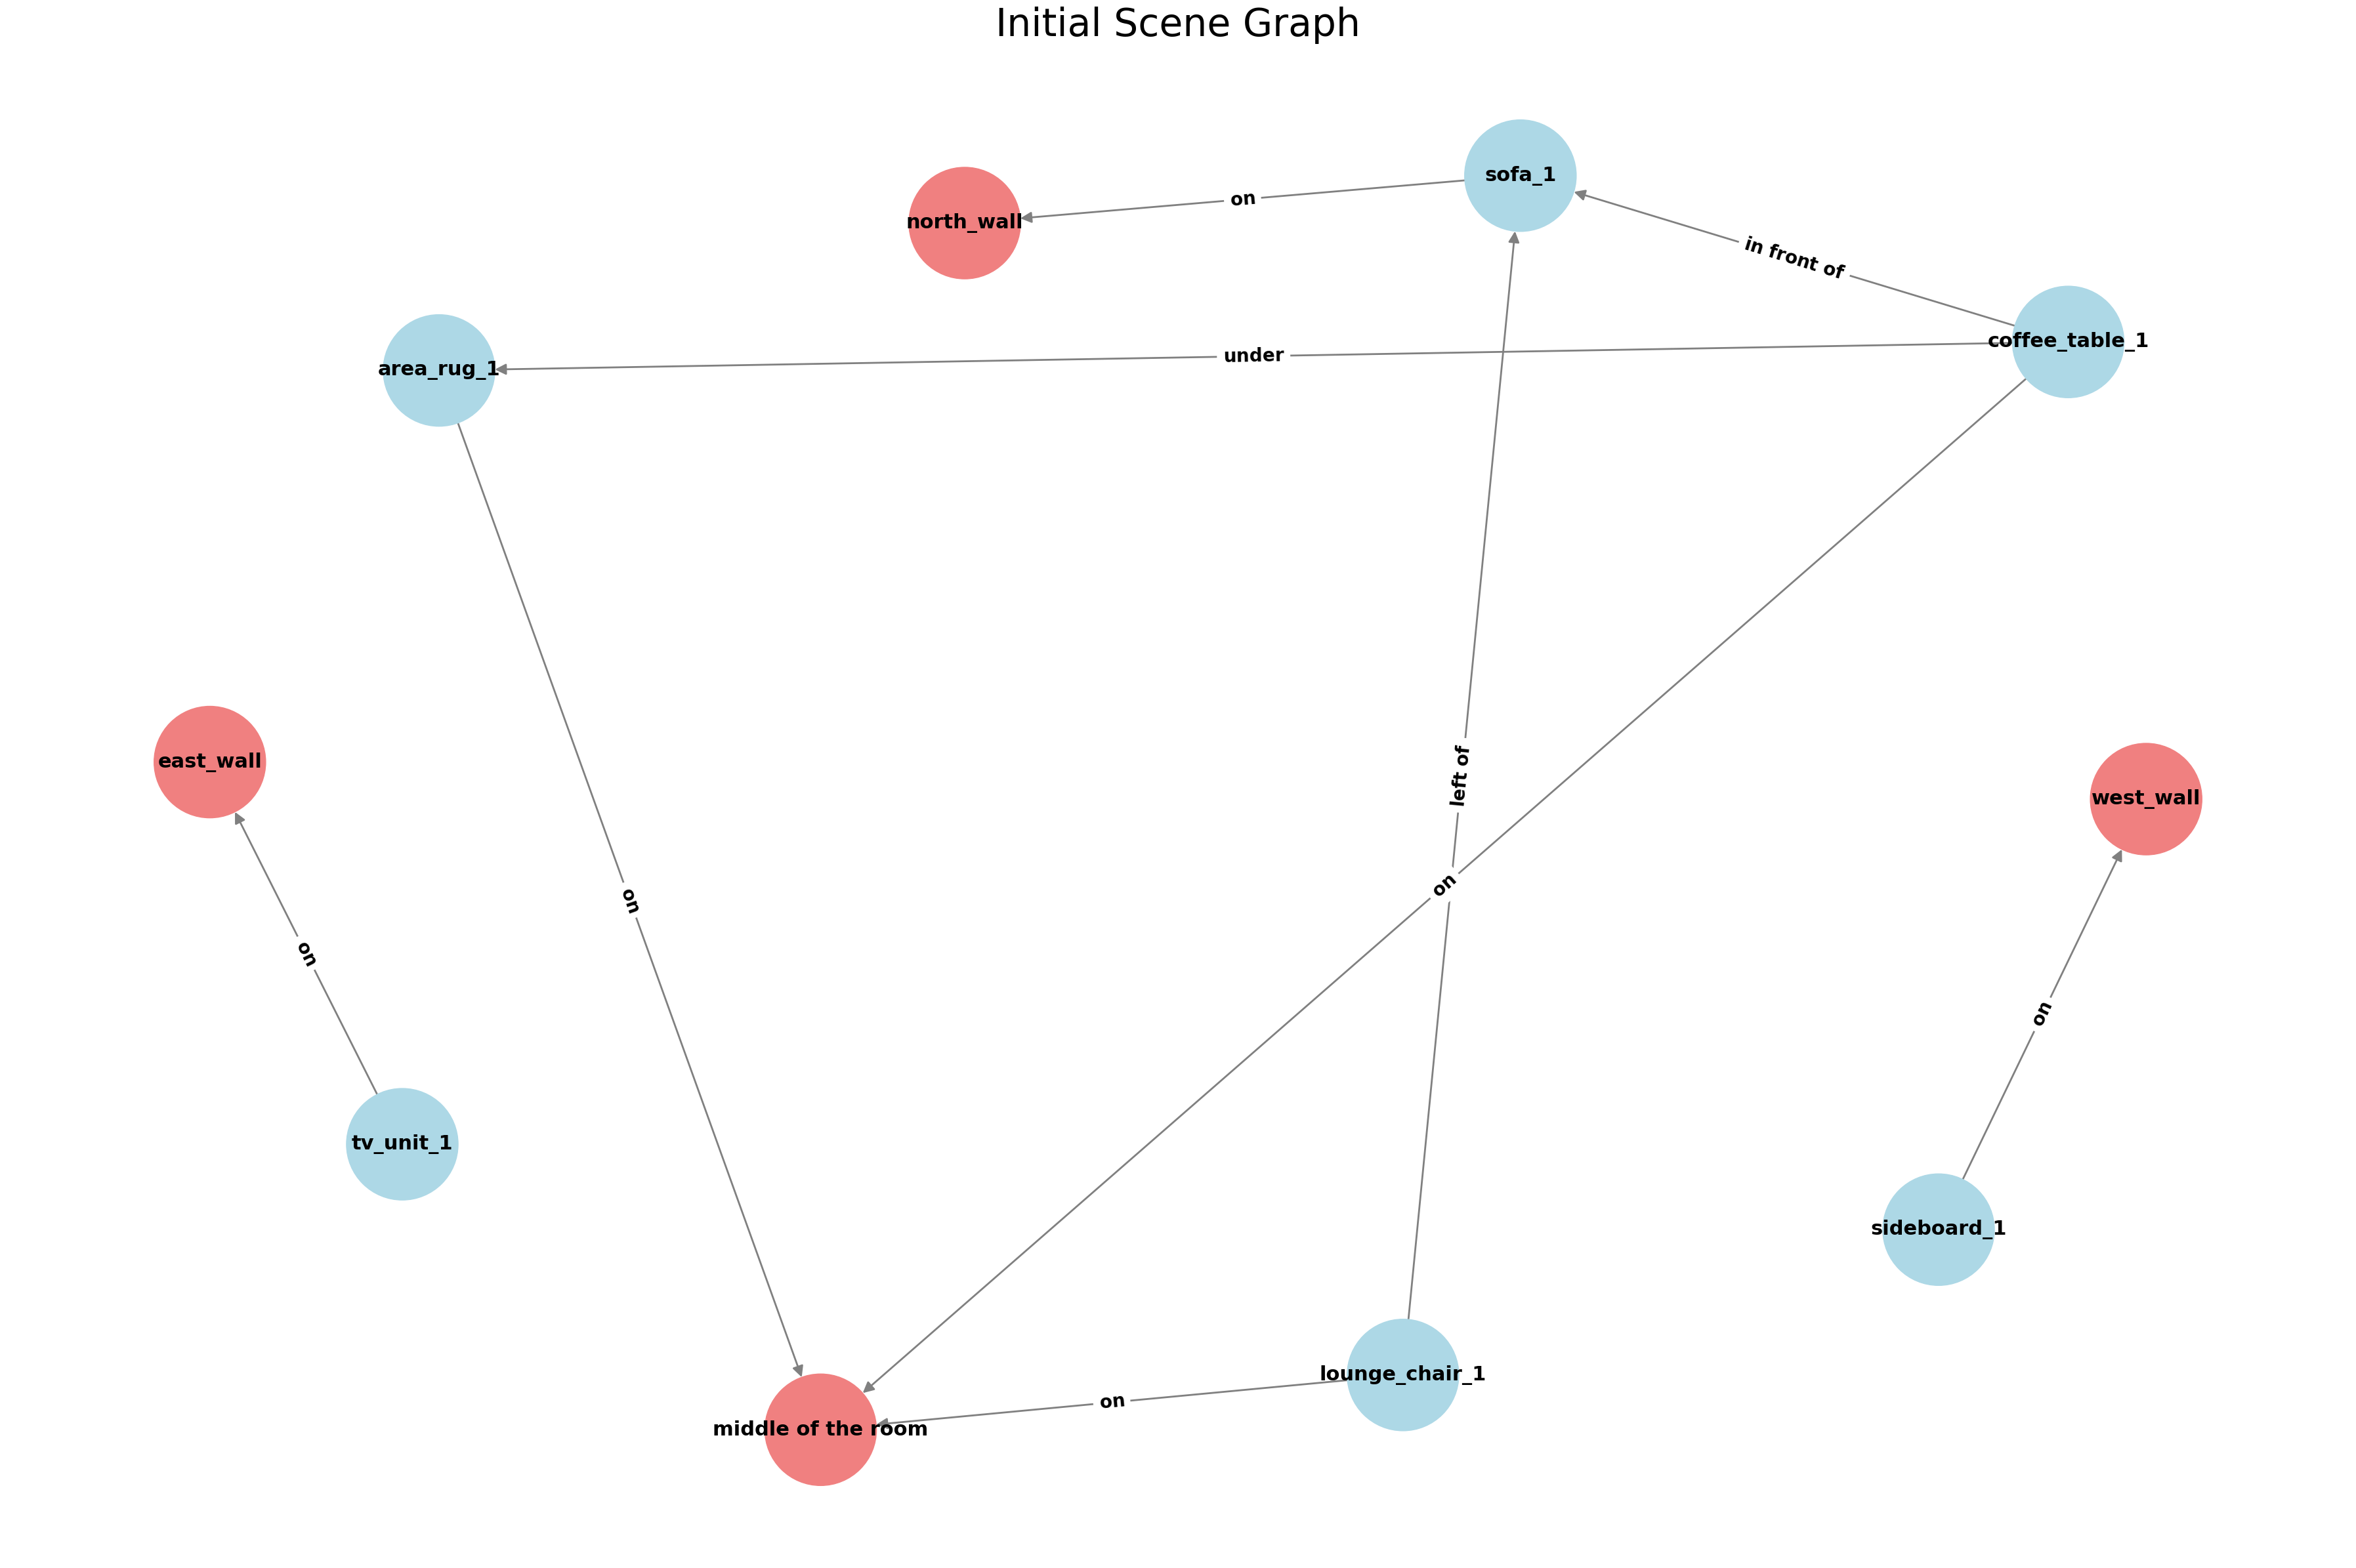

Graph visualization saved to initial_graph.png


In [55]:
title_initial = "Initial Scene Graph"
G = build_graph(scene_graph["objects_in_room"])
visualize_G(G, output_path="initial_graph.png", prompt_text=title_initial)

In [53]:
scene_graph

{'objects_in_room': [{'new_object_id': 'sofa_1',
   'style': 'Modern',
   'material': 'Leather',
   'size_in_meters': {'length': 2.0, 'width': 1.0, 'height': 0.8},
   'is_on_the_floor': True,
   'facing': 'north_wall',
   'placement': {'room_layout_elements': [{'layout_element_id': 'north_wall',
      'preposition': 'on'}],
    'objects_in_room': []}},
  {'new_object_id': 'coffee_table_1',
   'style': 'Modern',
   'material': 'Glass and Metal',
   'size_in_meters': {'length': 1.2, 'width': 0.8, 'height': 0.4},
   'is_on_the_floor': True,
   'facing': 'middle of the room',
   'placement': {'room_layout_elements': [{'layout_element_id': 'middle of the room',
      'preposition': 'on'}],
    'objects_in_room': [{'object_id': 'sofa_1',
      'preposition': 'in front of',
      'is_adjacent': True}]}},
  {'new_object_id': 'tv_unit_1',
   'style': 'Modern',
   'material': 'MDF',
   'size_in_meters': {'length': 1.8, 'width': 0.6, 'height': 0.4},
   'is_on_the_floor': True,
   'facing': 'east_

In [54]:
title_2 = "Corrected Scene Graph"

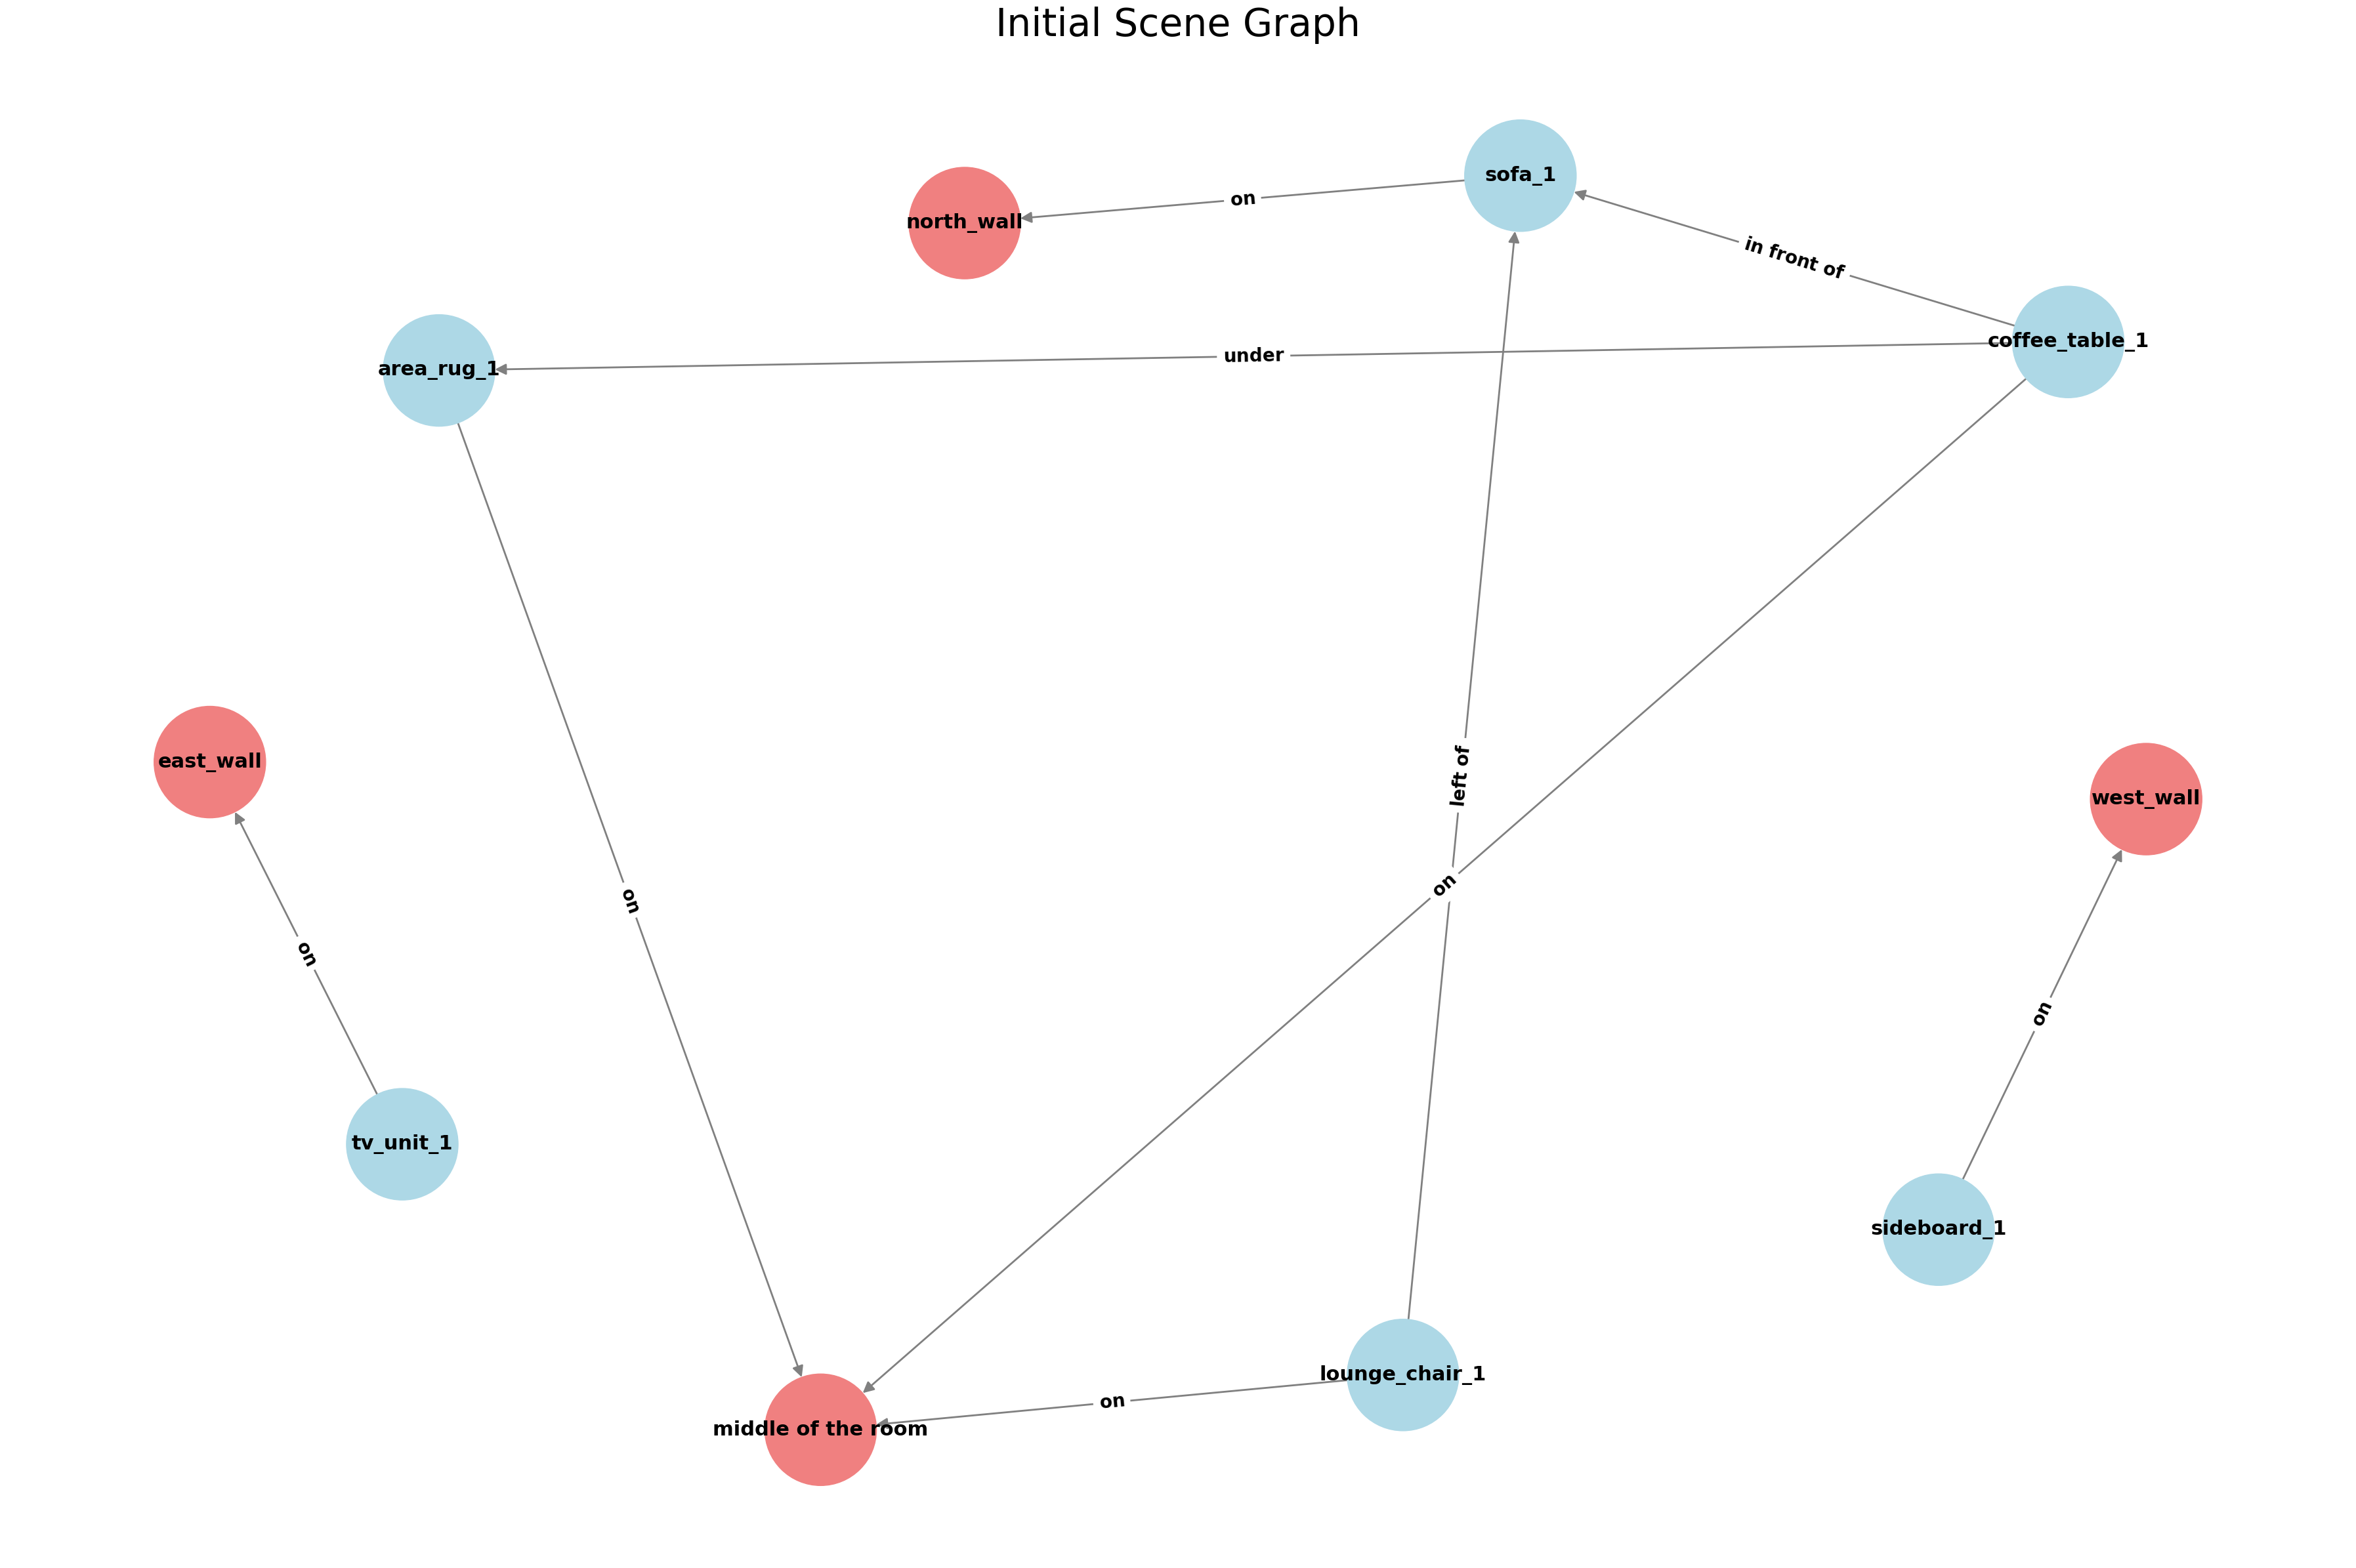

Graph visualization saved to output_graphs/initial_graph.png


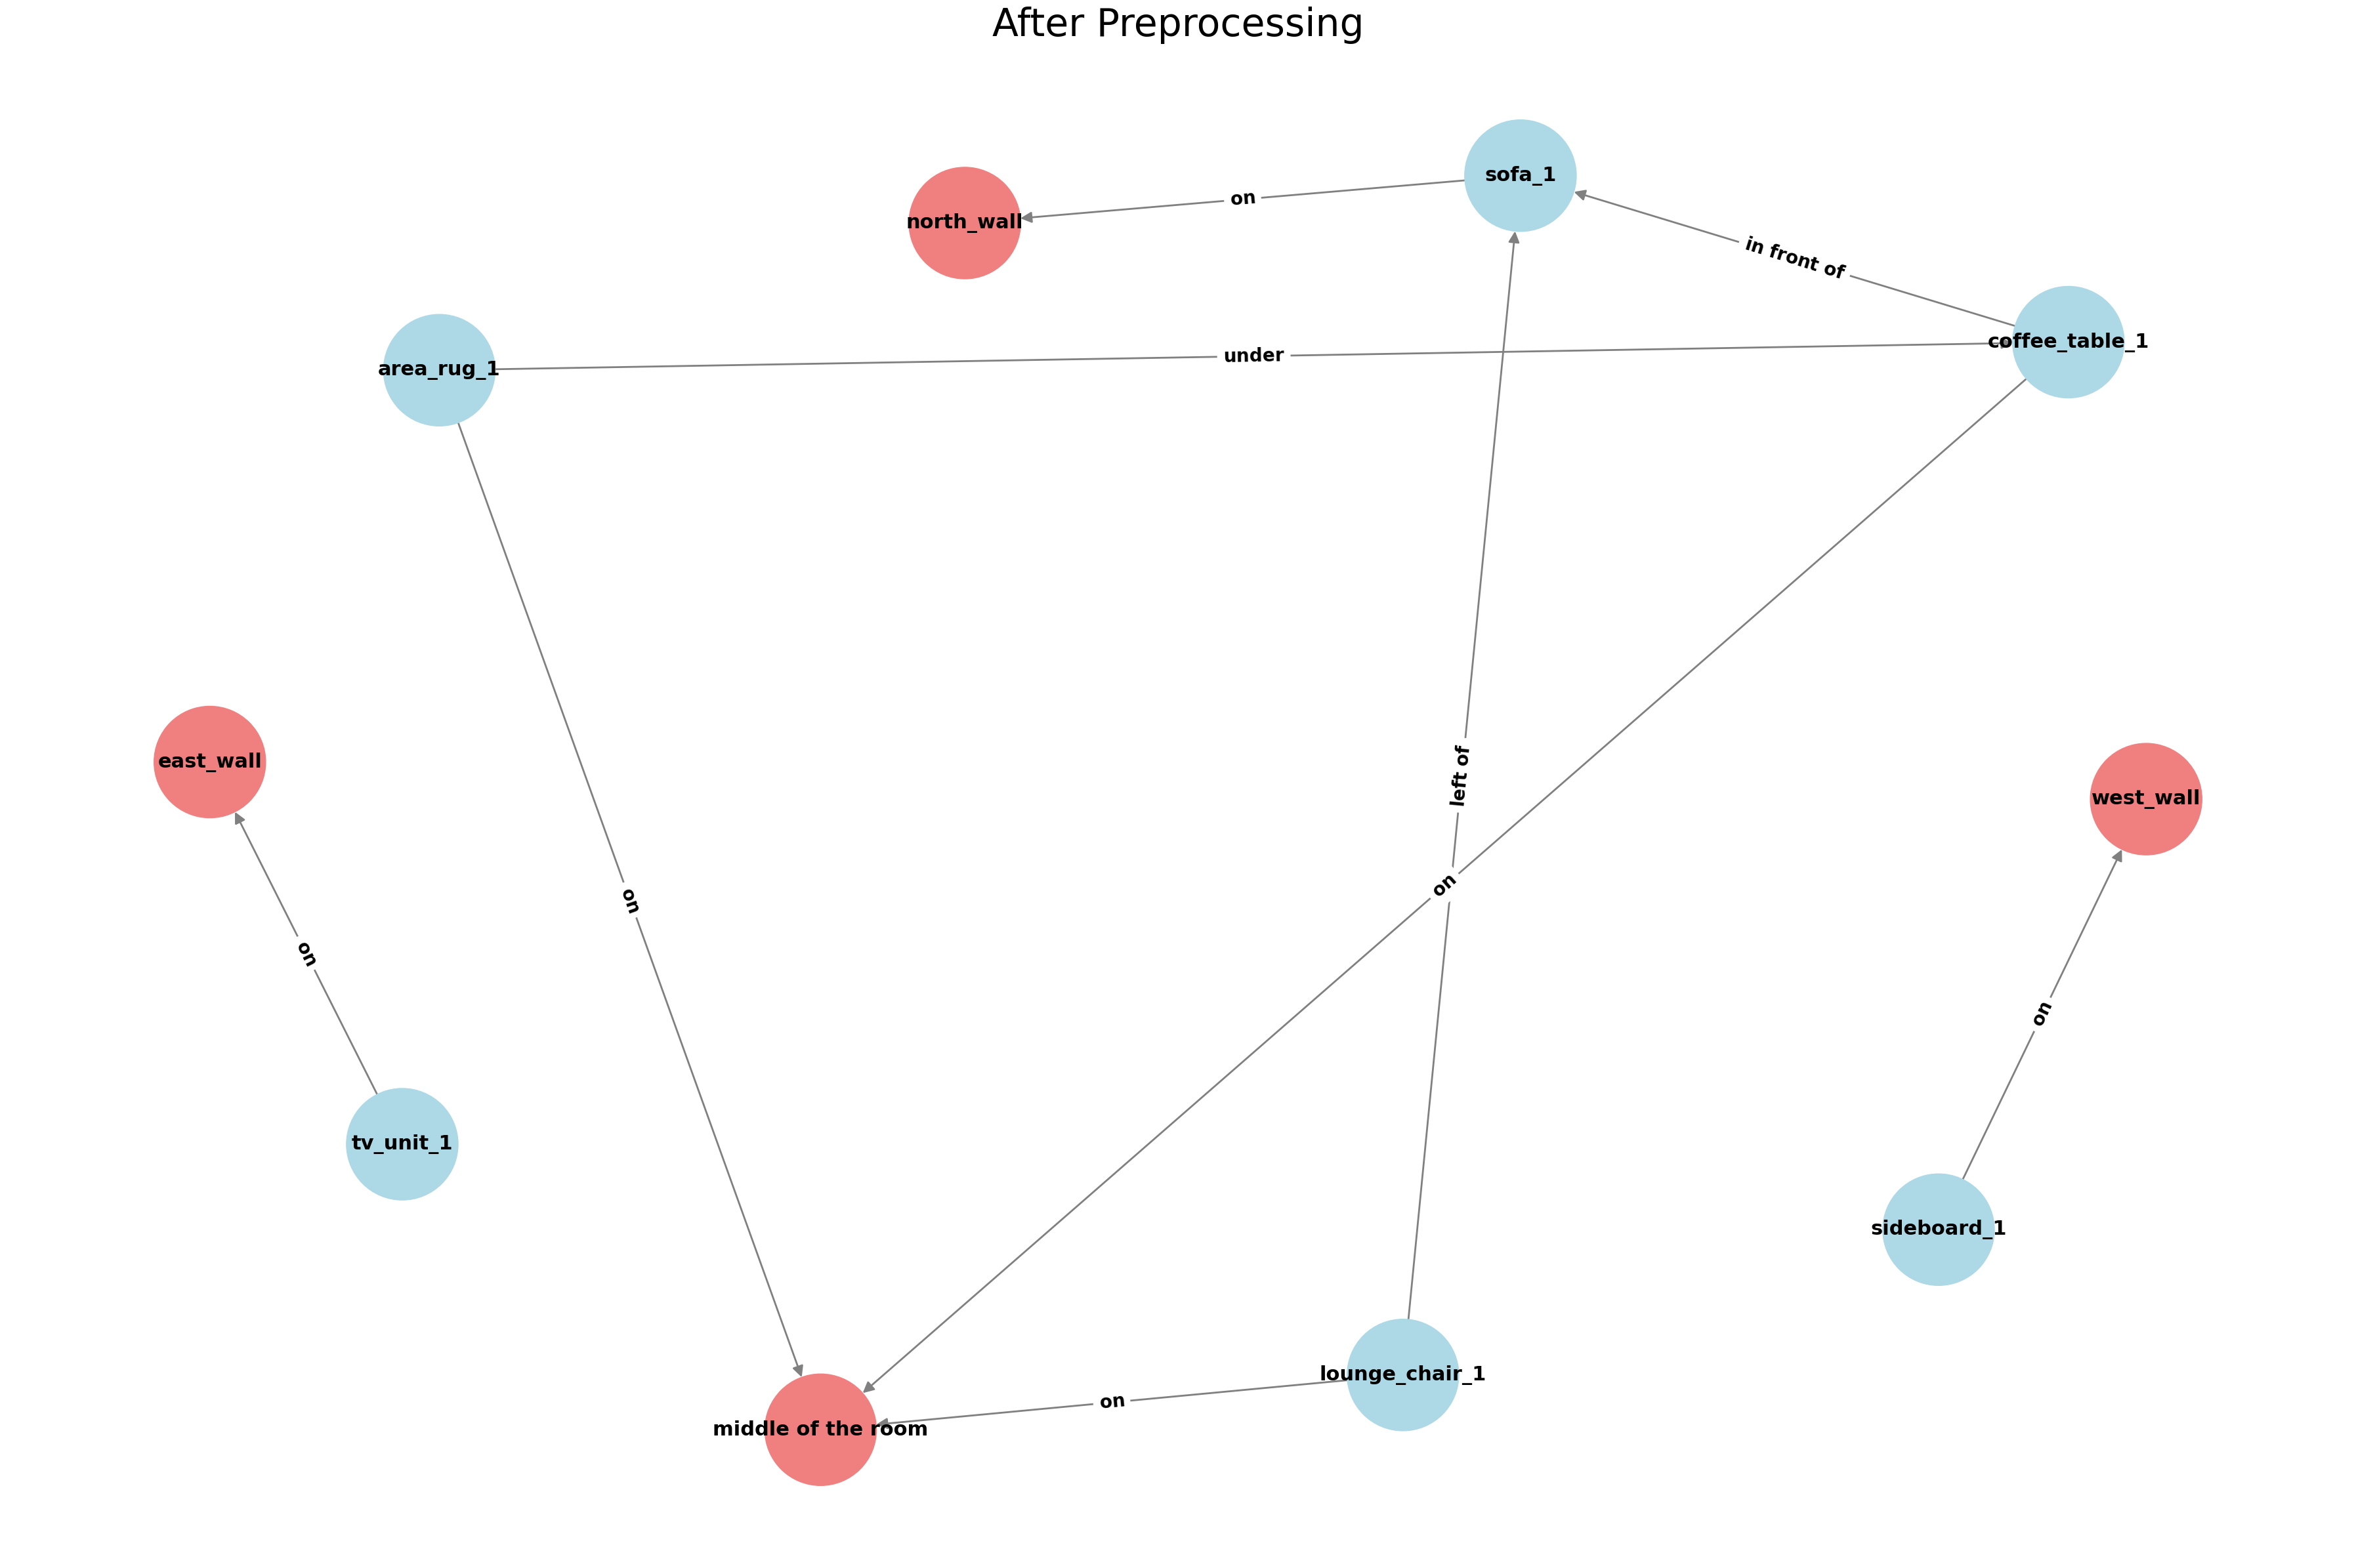

Graph visualization saved to output_graphs/preprocessed_graph.png
-------------------SPATIAL CONFLICTS-------------------
Object coffee_table_1 has an impossible relationship 'under' with area_rug_1.


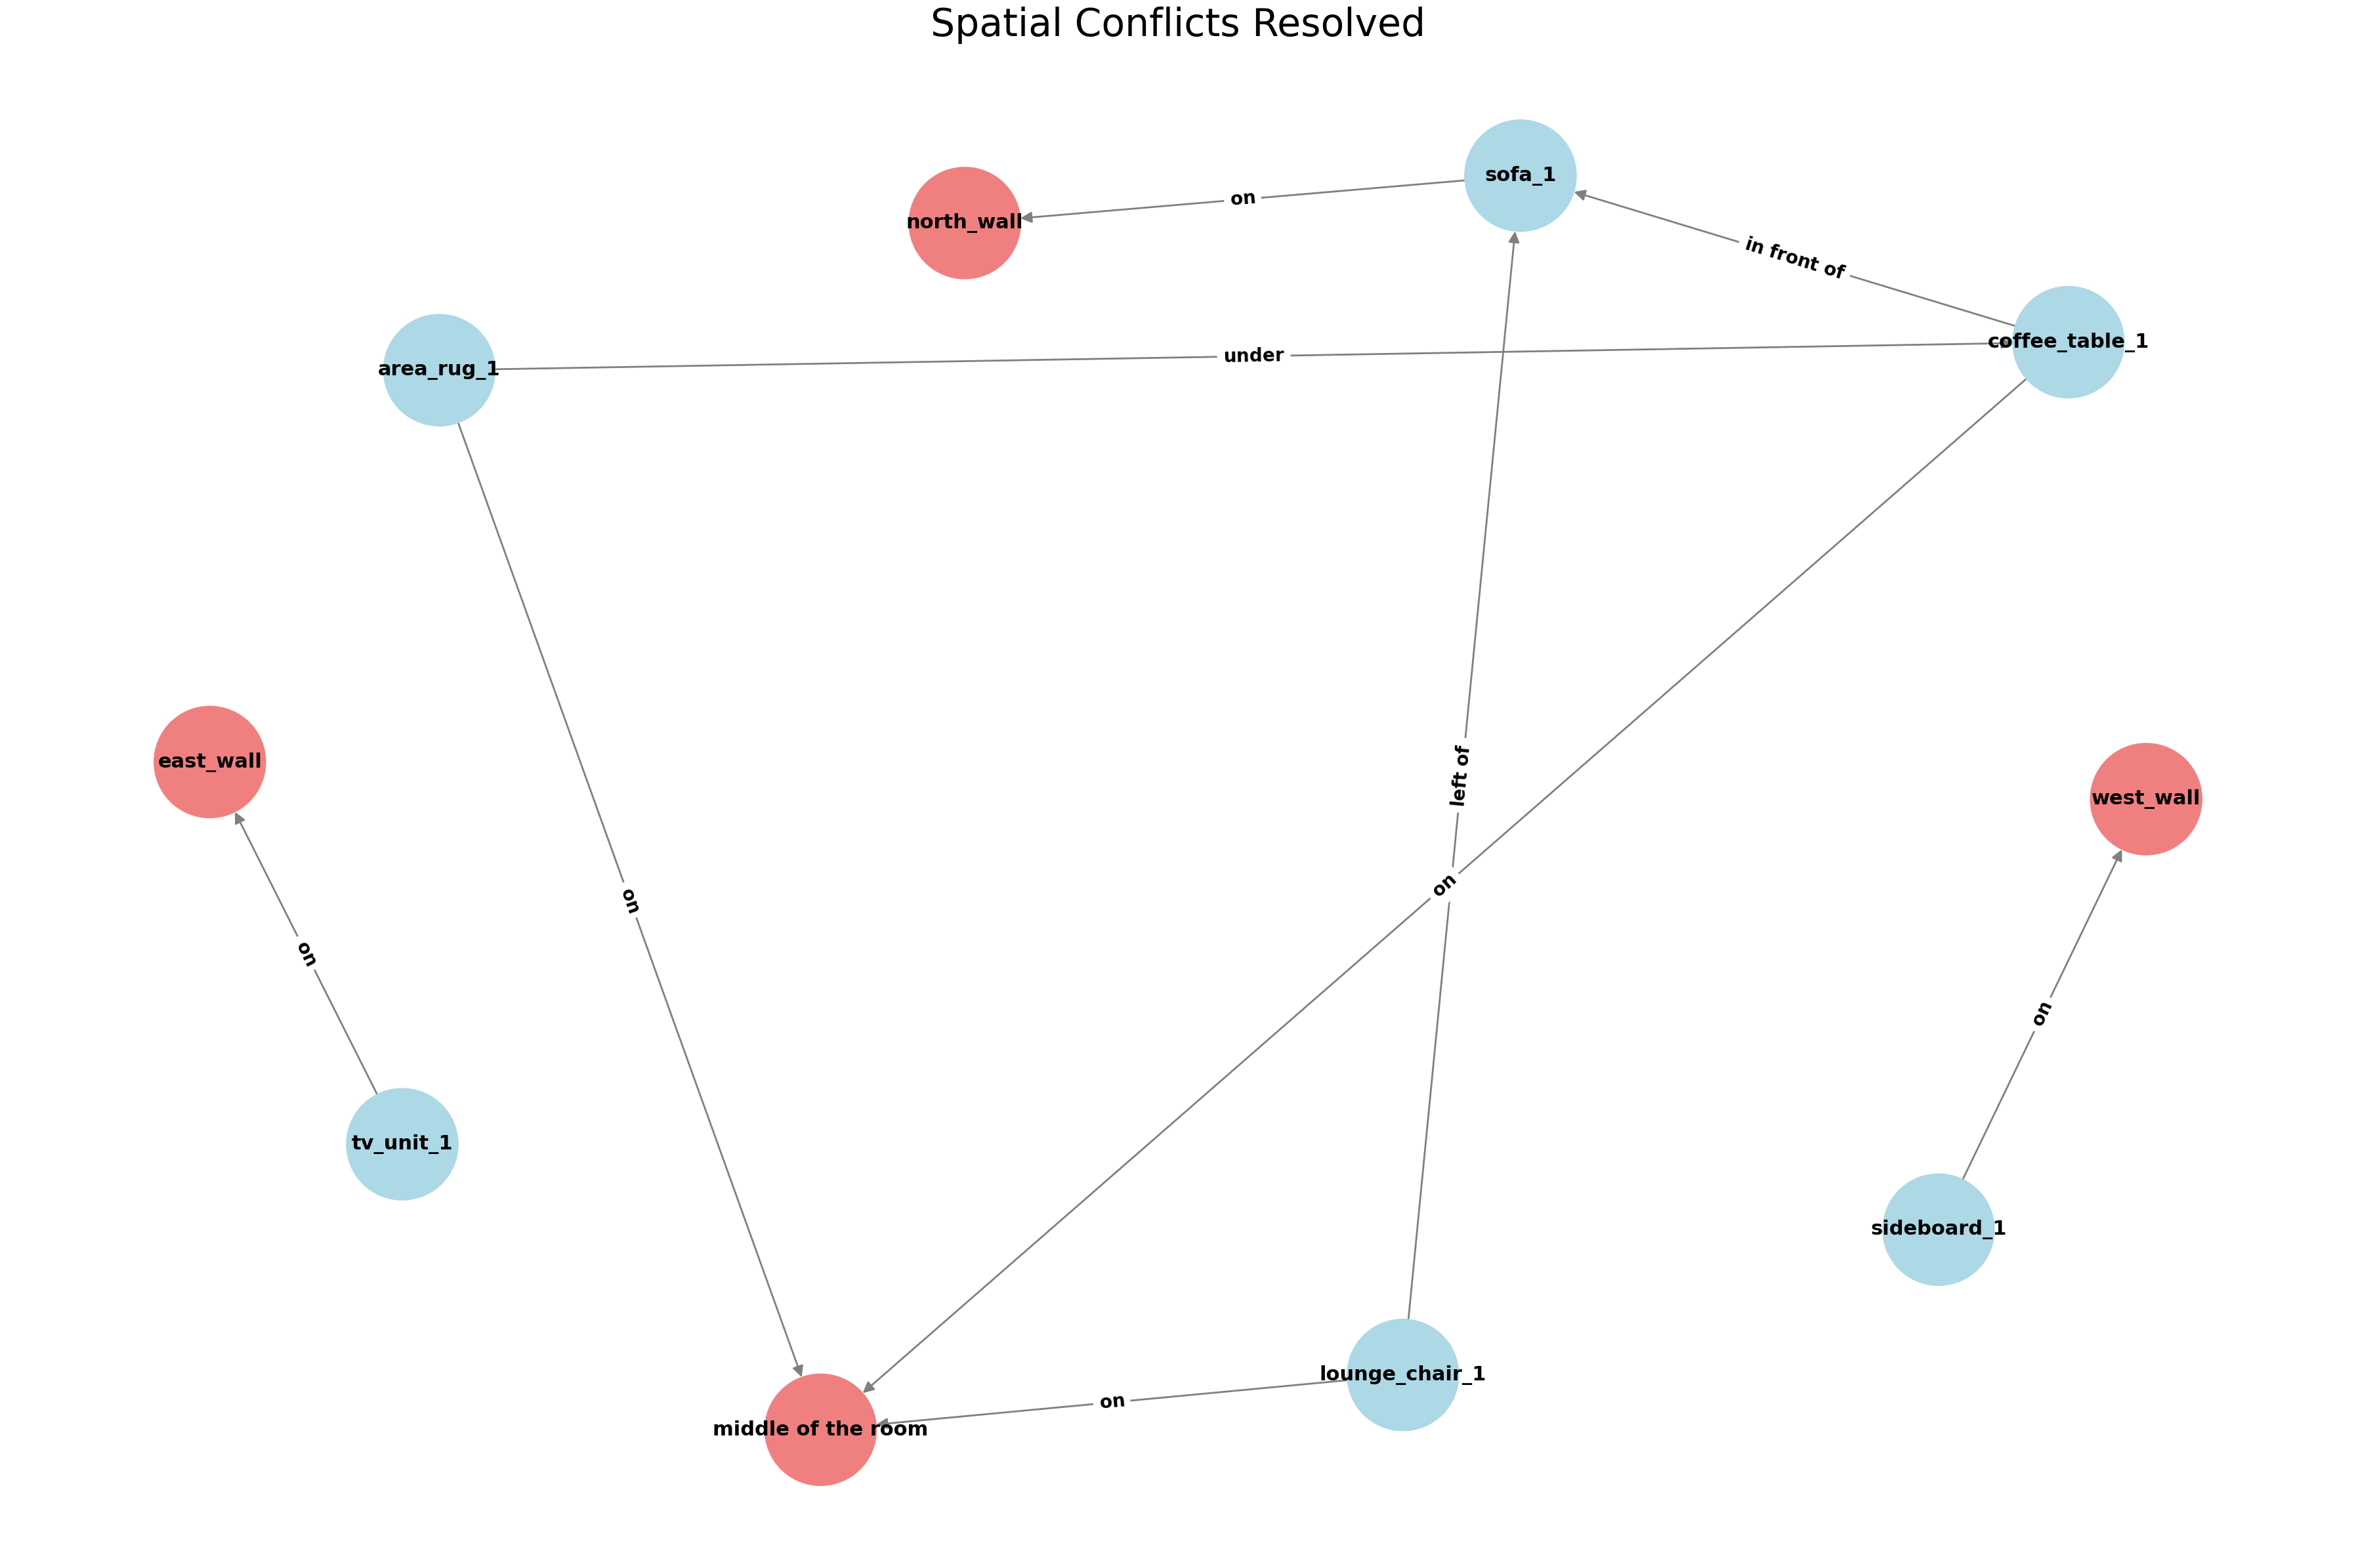

Graph visualization saved to output_graphs/spatial_conflicts_resolved_graph.png
-------------------SIZE CONFLICTS-------------------
{'object_id': 'coffee_table_1', 'needed_length': 1.2, 'needed_width': 1.0, 'conflict_description': 'Object coffee_table_1 is too small in width to fit its cluster (needs >= 1.00m). Consider resizing or removing.'}
{'object_id': 'lounge_chair_1', 'needed_length': 2.0, 'needed_width': 1.0, 'conflict_description': 'Object lounge_chair_1 is too small in length to fit its cluster (needs >= 2.00m). Consider resizing or removing.'}
Attempting to fix size conflict for 'coffee_table_1': Object coffee_table_1 is too small in width to fit its cluster (needs >= 1.00m). Consider resizing or removing.
  Current (L=1.2, W=0.8),  Needed (L>=1.2, W>=1.0)
  => Resized to (L=1.25, W=1.05)
  => Successfully resized 'coffee_table_1'. No removal needed.
Attempting to fix size conflict for 'lounge_chair_1': Object lounge_chair_1 is too small in length to fit its cluster (needs 

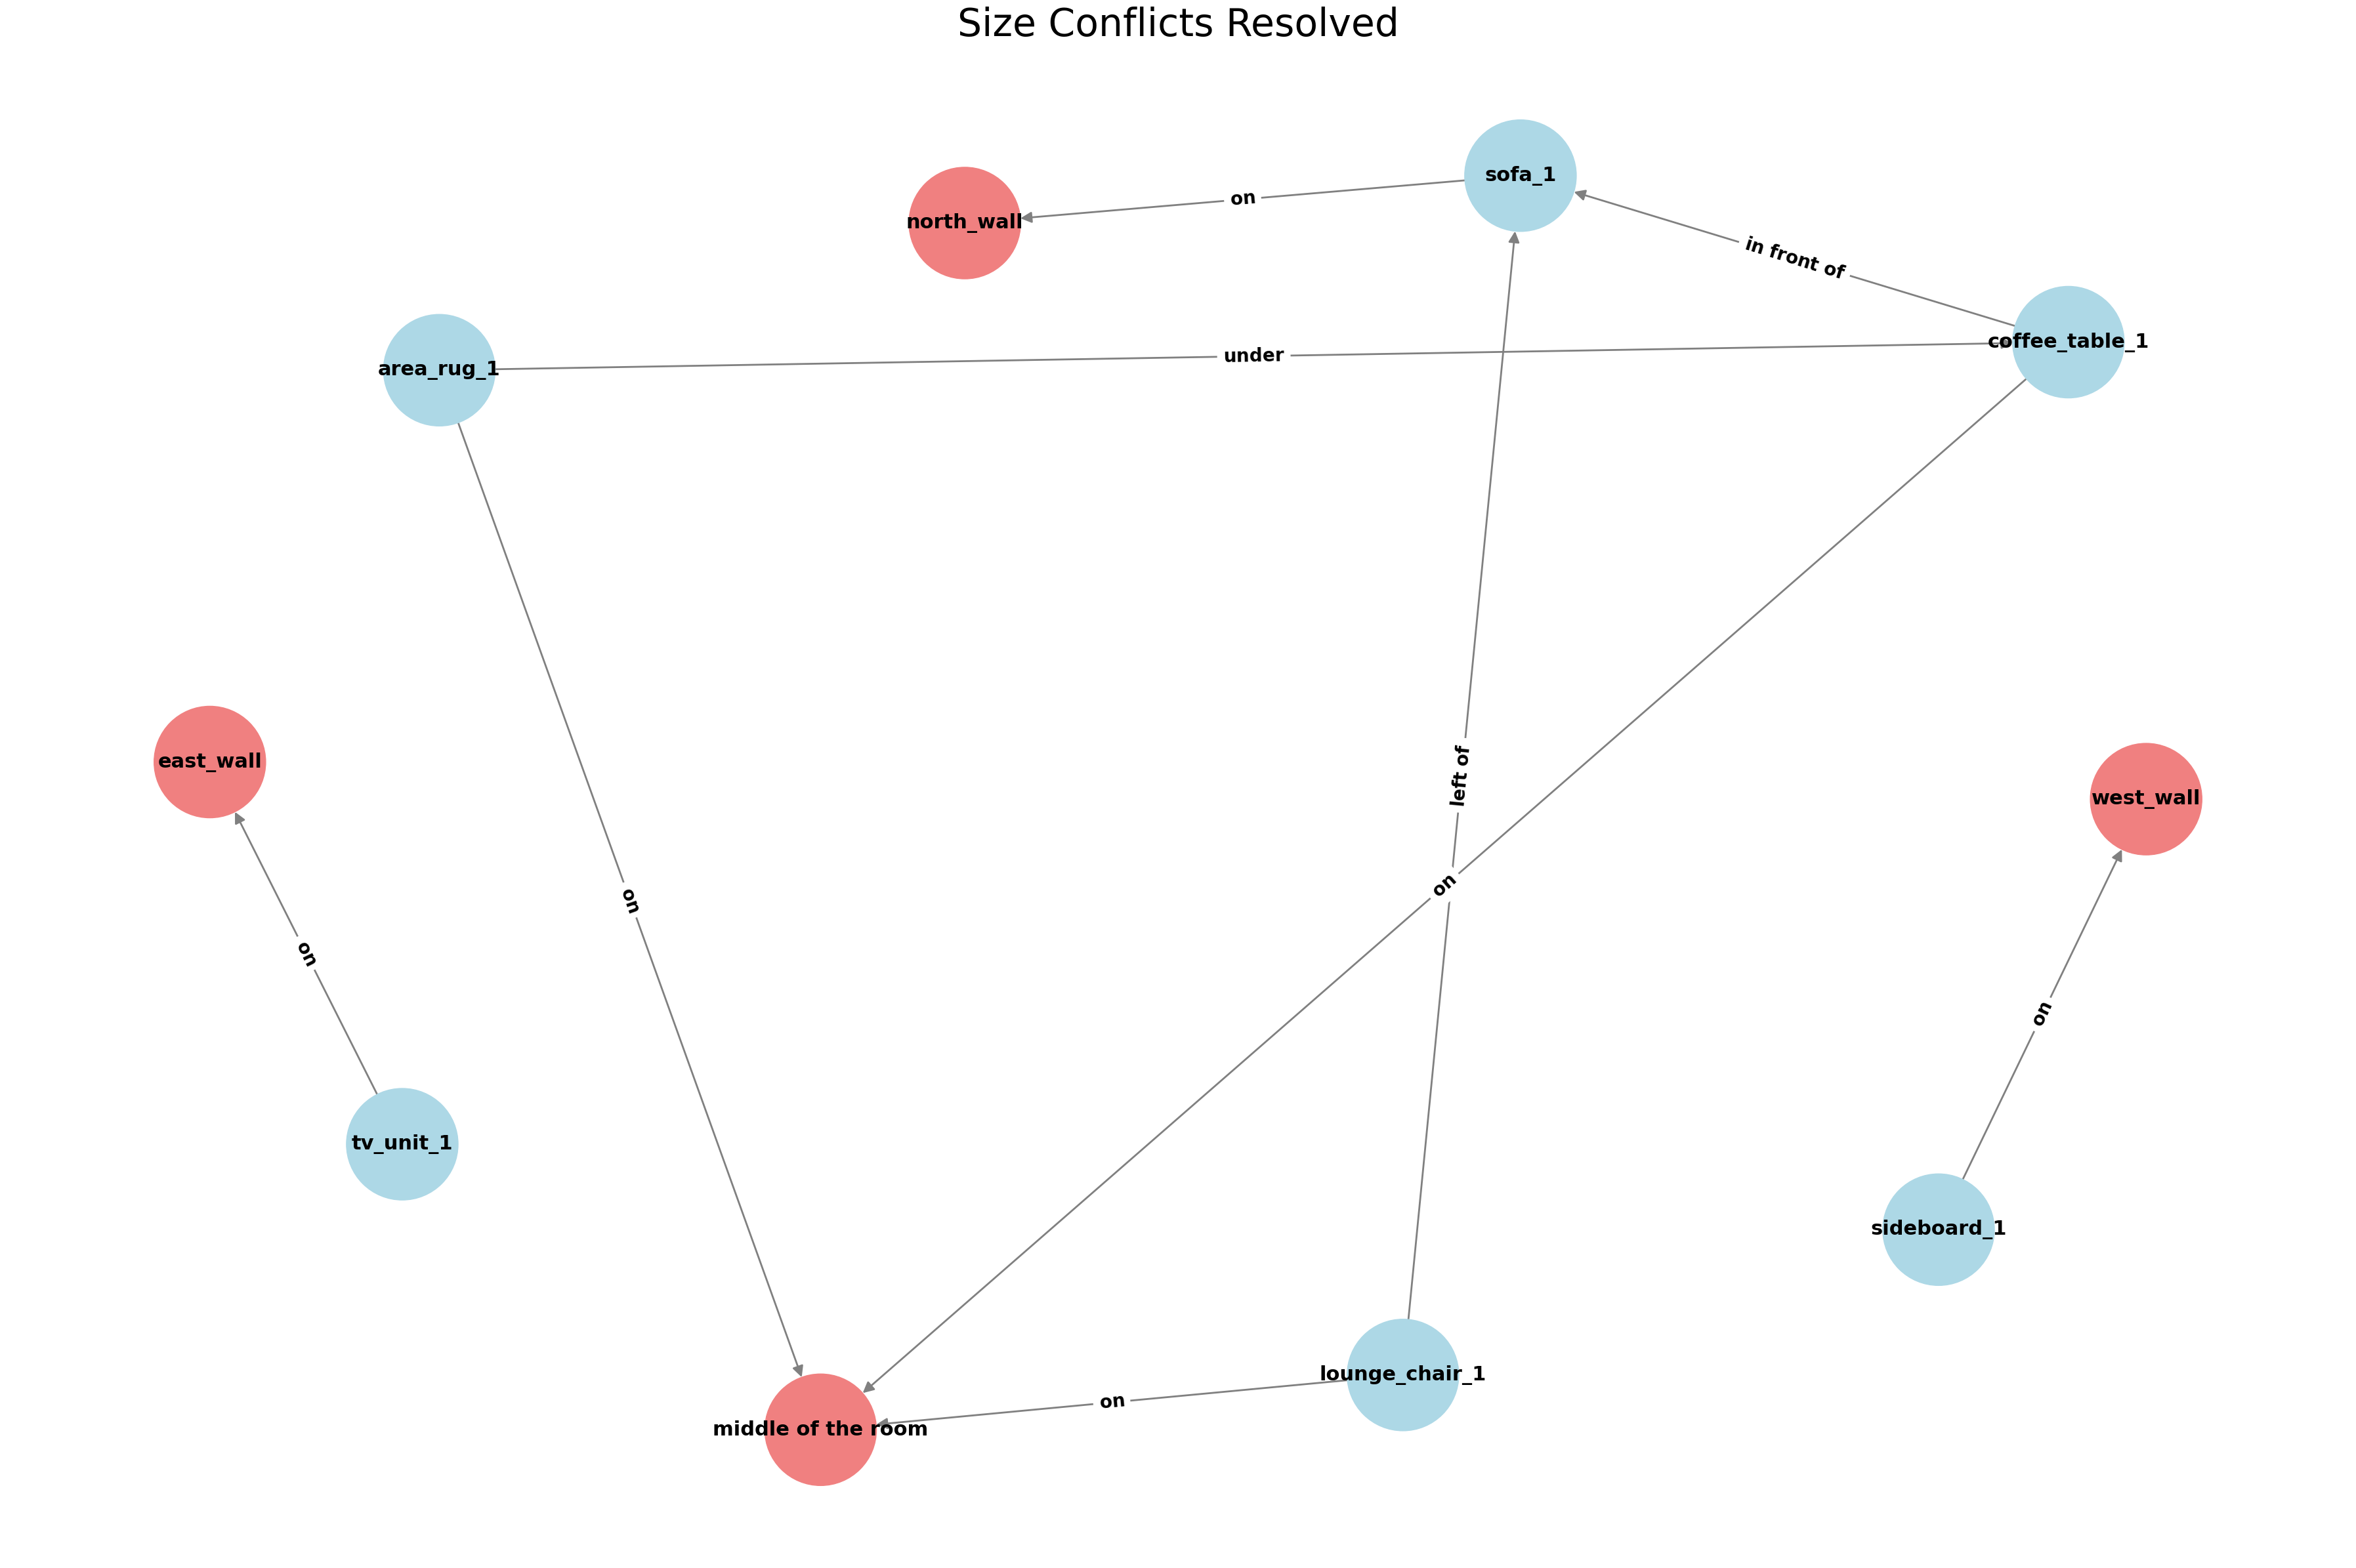

Graph visualization saved to output_graphs/size_conflicts_resolved_graph.png
Corrected Scene Graph:
{
    "objects_in_room": [
        {
            "new_object_id": "sofa_1",
            "style": "Modern",
            "material": "Leather",
            "size_in_meters": {
                "length": 2.0,
                "width": 1.0,
                "height": 0.8
            },
            "is_on_the_floor": true,
            "facing": "north_wall",
            "placement": {
                "room_layout_elements": [
                    {
                        "layout_element_id": "north_wall",
                        "preposition": "on"
                    }
                ],
                "objects_in_room": []
            }
        },
        {
            "new_object_id": "coffee_table_1",
            "style": "Modern",
            "material": "Glass and Metal",
            "size_in_meters": {
                "length": 1.25,
                "width": 1.05,
                "height

In [55]:
room_priors = get_room_priors(room_dimensions)  

corrected_scene_graph = correct_design(
    scene_graph,
    user_input,
    room_priors,
    access_token,
    verbose=True,
    auto_prune=True,
    output_dir="output_graphs"
)

print("Corrected Scene Graph:")
print(json.dumps(corrected_scene_graph, indent=4))


In [169]:
# # Example Scene Graph
# scene_graph = [
#     {
#         "new_object_id": "sofa_1",
#         "placement": {
#             "room_layout_elements": [{"layout_element_id": "north_wall", "preposition": "on"}],
#             "objects_in_room": [],
#         },
#     },
#     {
#         "new_object_id": "armchair_1",
#         "placement": {
#             "room_layout_elements": [{"layout_element_id": "south_wall", "preposition": "on"}],
#             "objects_in_room": [],
#         },
#     },
# ]

# # Build the graph
# G = build_graph(scene_graph)
# print("Nodes:", G.nodes(data=True))
# print("Edges:", G.edges(data=True))

# # Visualize the graph
# visualize_graph(G, output_path="graph_visualization.png")


In [282]:
# Corrected Scene Graph
corrected_scene_graph = {
    'objects_in_room': [
        {
            'new_object_id': 'sofa_1',
            'style': 'Modern',
            'material': 'Leather',
            'size_in_meters': {'length': 2.0, 'width': 1.0, 'height': 0.8},
            'is_on_the_floor': True,
            'facing': 'north_wall',
            'placement': {
                'room_layout_elements': [
                    {'layout_element_id': 'north_wall', 'preposition': 'on'}
                ],
                'objects_in_room': []
            }
        },
        {
            'new_object_id': 'coffee_table_1',
            'style': 'Modern',
            'material': 'Glass and Metal',
            'size_in_meters': {'length': 1.25, 'width': 1.05, 'height': 0.4},
            'is_on_the_floor': True,
            'facing': 'middle of the room',
            'placement': {
                'room_layout_elements': [
                    {'layout_element_id': 'middle of the room', 'preposition': 'on'}
                ],
                'objects_in_room': [
                    {
                        'object_id': 'sofa_1',  # Reference to other object
                        'preposition': 'in front of',
                        'is_adjacent': True
                    }
                ]
            }
        },
        {
            'new_object_id': 'tv_unit_1',
            'style': 'Modern',
            'material': 'MDF',
            'size_in_meters': {'length': 1.8, 'width': 0.6, 'height': 0.4},
            'is_on_the_floor': True,
            'facing': 'east_wall',
            'placement': {
                'room_layout_elements': [
                    {'layout_element_id': 'east_wall', 'preposition': 'on'}
                ],
                'objects_in_room': []
            }
        },
        {
            'new_object_id': 'sideboard_1',
            'style': 'Modern',
            'material': 'Wood',
            'size_in_meters': {'length': 1.5, 'width': 0.5, 'height': 0.8},
            'is_on_the_floor': True,
            'facing': 'west_wall',
            'placement': {
                'room_layout_elements': [
                    {'layout_element_id': 'west_wall', 'preposition': 'on'}
                ],
                'objects_in_room': []
            }
        },
        {
            'new_object_id': 'area_rug_1',
            'style': 'Modern',
            'material': 'Synthetic Fiber',
            'size_in_meters': {'length': 2.0, 'width': 2.0, 'height': 0.02},
            'is_on_the_floor': True,
            'facing': 'middle of the room',
            'placement': {
                'room_layout_elements': [
                    {'layout_element_id': 'middle of the room', 'preposition': 'on'}
                ],
                'objects_in_room': [
                    {
                        'object_id': 'coffee_table_1',  # Reference to other object
                        'preposition': 'under',
                        'is_adjacent': True
                    }
                ]
            }
        },
        {
            'new_object_id': 'lounge_chair_1',
            'style': 'Modern',
            'material': 'Fabric',
            'size_in_meters': {'length': 2.05, 'width': 1.05, 'height': 0.8},
            'is_on_the_floor': True,
            'facing': 'middle of the room',
            'placement': {
                'room_layout_elements': [
                    {'layout_element_id': 'middle of the room', 'preposition': 'on'}
                ],
                'objects_in_room': [
                    {
                        'object_id': 'sofa_1',  # Reference to other object
                        'preposition': 'left of',
                        'is_adjacent': True
                    }
                ]
            }
        }
    ]
}


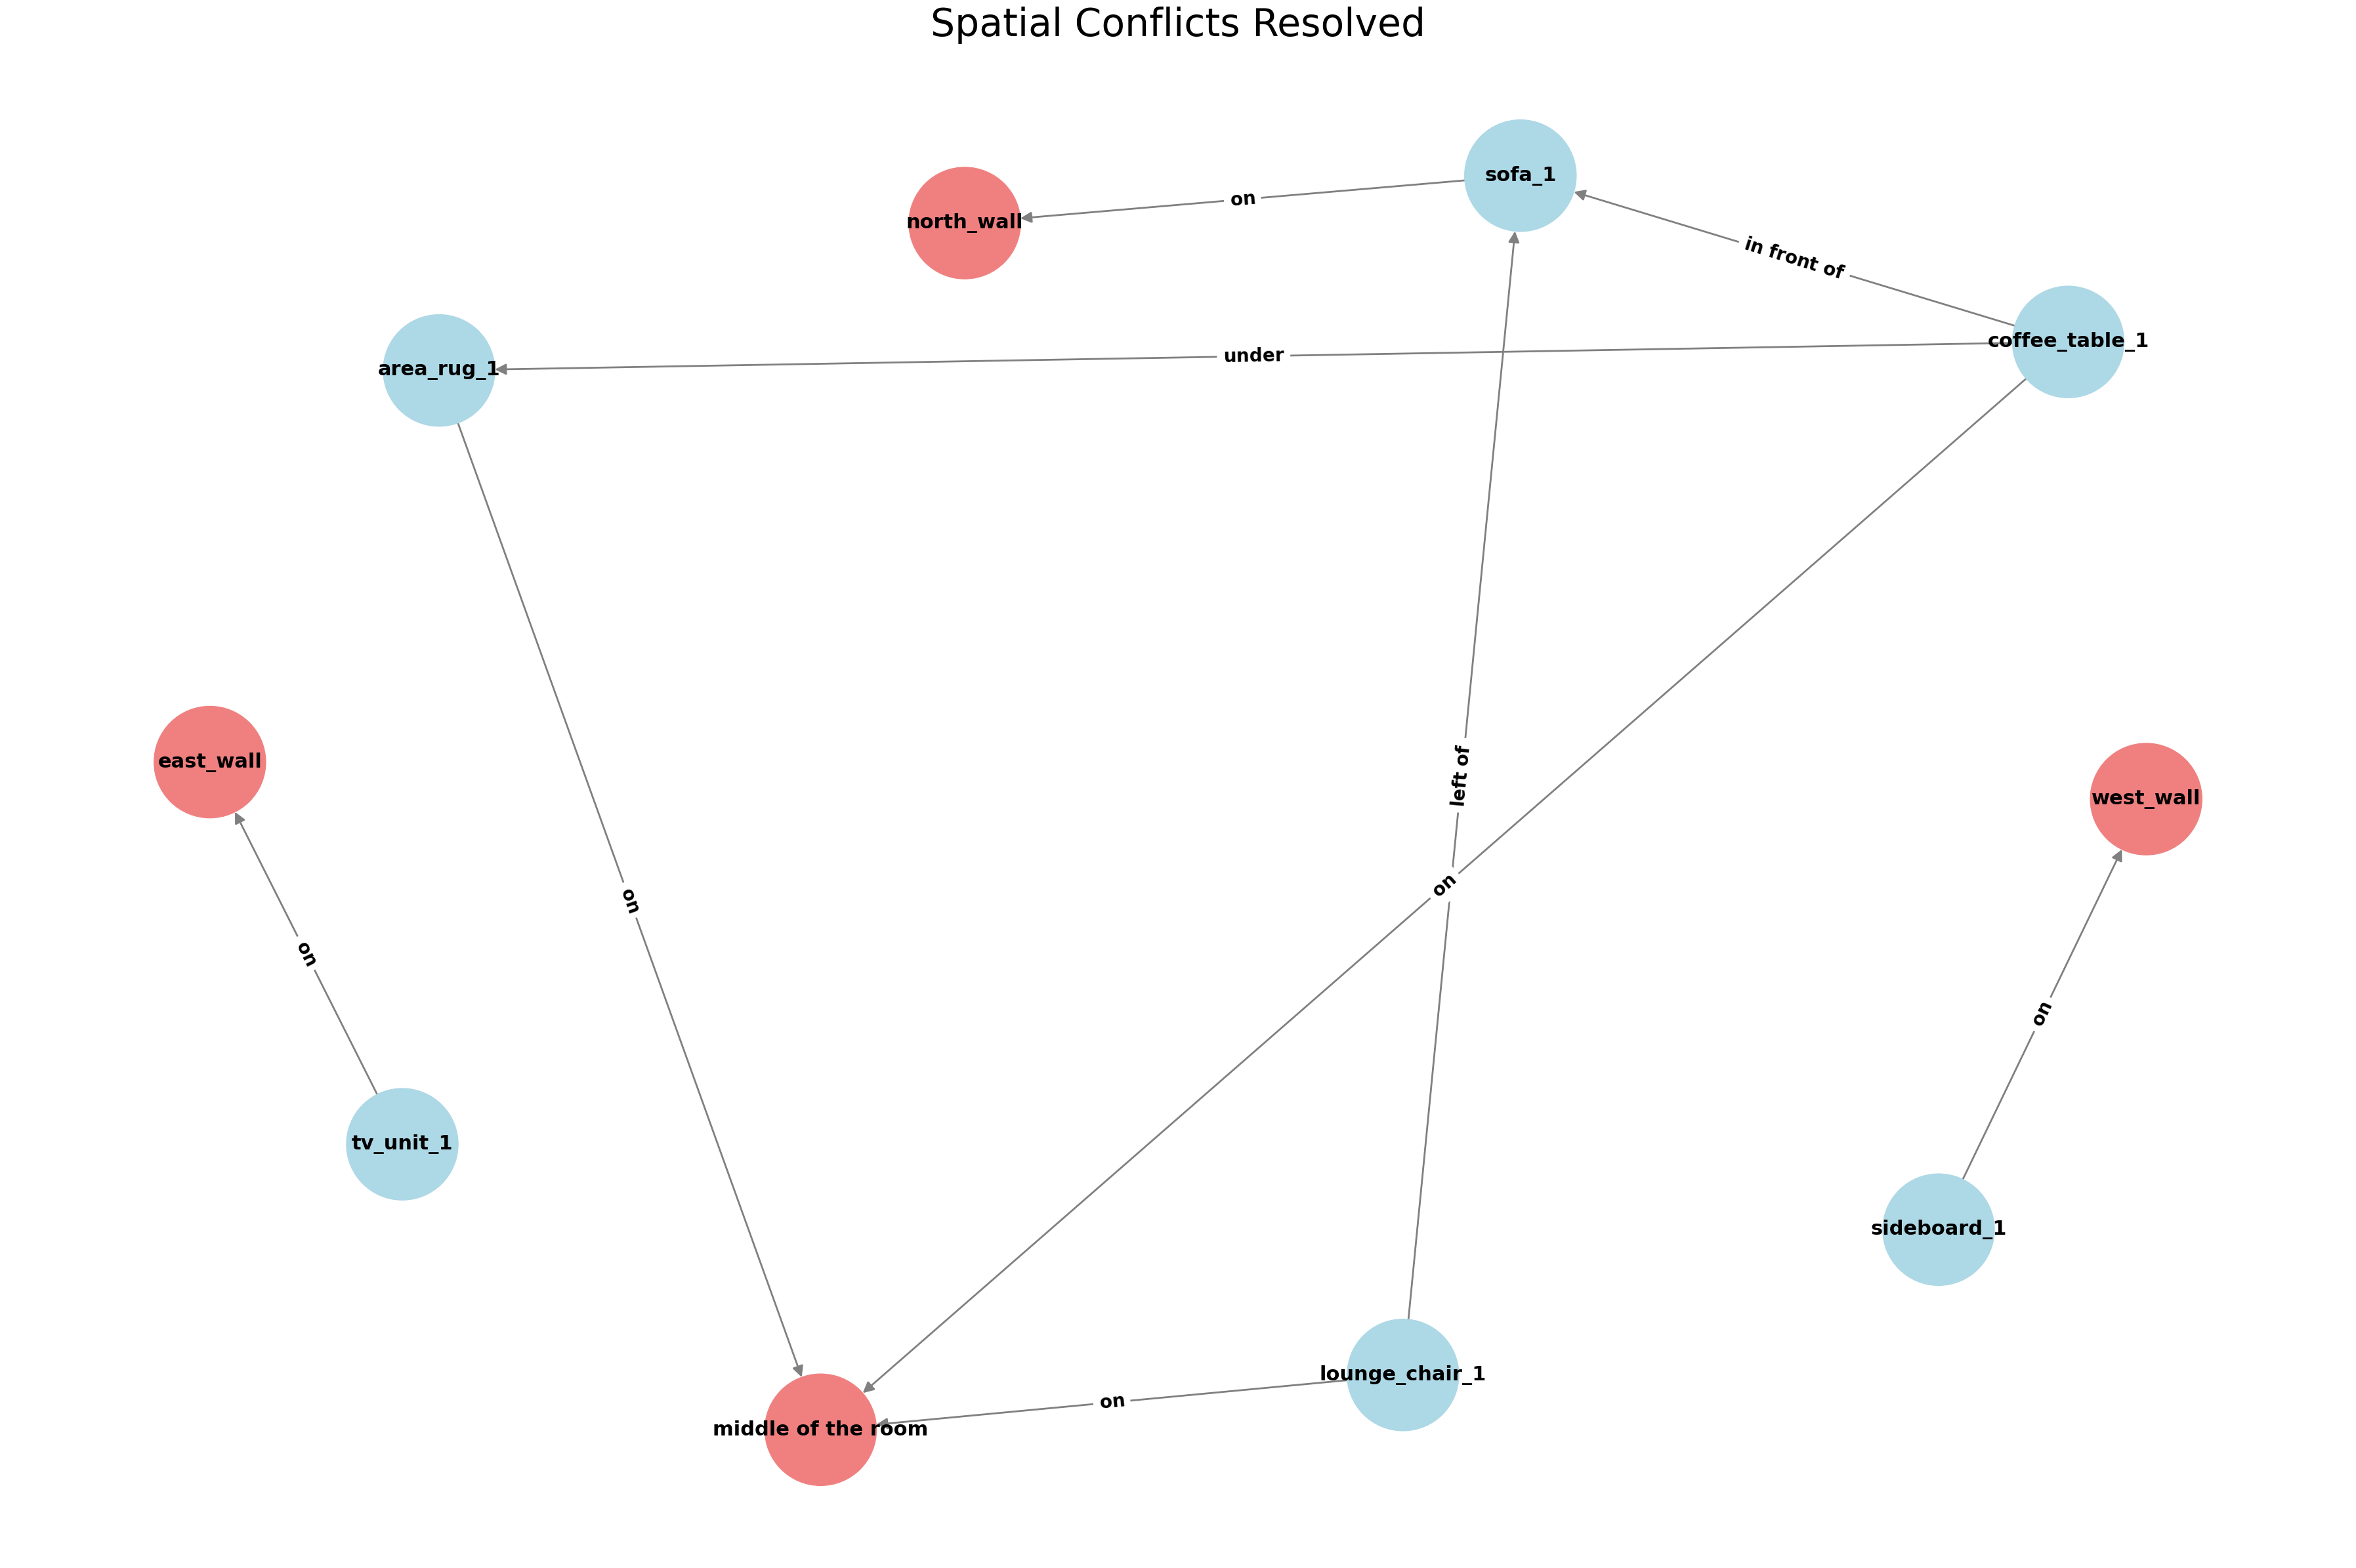

Graph visualization saved to visualizations/spatial_conflicts_resolved_graph.png


In [283]:
visualize_G(G, output_path=f"{output_dir}/spatial_conflicts_resolved_graph.png", prompt_text="Spatial Conflicts Resolved")

In [284]:
def get_room_priors(room_dimensions):
    """
    Generates room layout priors based on the given dimensions.

    Args:
        room_dimensions (tuple): Dimensions of the room (length, width, height).

    Returns:
        list: List of dictionaries representing the priors for walls, ceiling, and floor.
    """
    x_mid = room_dimensions[0] / 2
    y_mid = room_dimensions[1] / 2
    z_mid = room_dimensions[2] / 2

    room_priors = [
        {"new_object_id": "south_wall", "itemType": "wall", "position": {"x": x_mid, "y": 0, "z": z_mid},
         "size_in_meters": {"length": room_dimensions[0], "width": 0.0, "height": room_dimensions[2]}, "rotation": {"z_angle": 0.0}},
        {"new_object_id": "north_wall", "itemType": "wall", "position": {"x": x_mid, "y": room_dimensions[1], "z": z_mid},
         "size_in_meters": {"length": room_dimensions[0], "width": 0.0, "height": room_dimensions[2]}, "rotation": {"z_angle": 180.0}},
        {"new_object_id": "east_wall", "itemType": "wall", "position": {"x": room_dimensions[0], "y": y_mid, "z": z_mid},
         "size_in_meters": {"length": room_dimensions[1], "width": 0.0, "height": room_dimensions[2]}, "rotation": {"z_angle": 270.0}},
        {"new_object_id": "west_wall", "itemType": "wall", "position": {"x": 0, "y": y_mid, "z": z_mid},
         "size_in_meters": {"length": room_dimensions[1], "width": 0.0, "height": room_dimensions[2]}, "rotation": {"z_angle": 90.0}},
        {"new_object_id": "middle of the room", "itemType": "floor", "position": {"x": x_mid, "y": y_mid, "z": 0},
         "size_in_meters": {"length": room_dimensions[0], "width": room_dimensions[1], "height": 0.0}, "rotation": {"z_angle": 0.0}},
        {"new_object_id": "ceiling", "itemType": "ceiling", "position": {"x": x_mid, "y": y_mid, "z": room_dimensions[2]},
         "size_in_meters": {"length": room_dimensions[0], "width": room_dimensions[1], "height": 0.0}, "rotation": {"z_angle": 0.0}}
    ]

    return room_priors

In [285]:
room_dimensions = (22.0, 24.0, 2.7)
room_priors = get_room_priors(room_dimensions)

In [289]:
class Agent:
    def __init__(self, name, system_message, access_token, schema, room_dimensions, verbose=False):
        """
        Initializes the Agent.

        Args:
            name (str): Name of the agent.
            system_message (str): System-level instructions for the agent.
            access_token (str): API access token.
            schema (dict): JSON schema for validation.
            room_dimensions (dict): Dimensions of the room (e.g., {'width': 5.0, 'length': 7.0, 'height': 3.0}).
            verbose (bool): If True, prints intermediate results.
        """
        self.name = name
        self.system_message = system_message
        self.access_token = access_token
        self.schema = schema
        self.room_dimensions = room_dimensions
        self.verbose = verbose

    def generate_response(self, user_input, max_tokens=2048):

        # Incorporate room dimensions and prepositions into the prompt
        full_prompt = f"{self.system_message}\nRoom Dimensions (meters): {json.dumps(self.room_dimensions)}\n\nUser Input:\n{user_input}\n\n{self.name} Response:\n"
        response = gigachat_request(
            user_input=full_prompt,
            access_token=self.access_token,
            schema=self.schema,
            temperature=0.6,
            max_tokens=max_tokens
        )
        return response

class JSONSchemaAgent(Agent):
    def __init__(self, name, system_message, access_token, schema, room_dimensions, verbose=False):
        """
        Initializes the JSONSchemaAgent.

        Args:
            name (str): Name of the agent.
            system_message (str): System-level instructions for the agent.
            access_token (str): API access token.
            schema (dict): JSON schema for validation.
            room_dimensions (dict): Dimensions of the room.
            verbose (bool): If True, prints intermediate results.
        """
        super().__init__(name, system_message, access_token, schema, room_dimensions, verbose)

    def validate_json(self, json_obj):
        """
        Validates a JSON object against the schema.

        Args:
            json_obj (dict): The JSON object to validate.

        Returns:
            str: "SUCCESS" if valid, otherwise the validation error message.
        """
        try:
            validate(instance=json_obj, schema=self.schema)
            return "SUCCESS"
        except ValidationError as e:
            return f"Validation Error: {e.message}"

        
positions_schema = {
    "type": "object",
    "properties": {
        "rotation": {
            "type": "object",
            "properties": {
                "z_angle": {
                    "type": "number",
                    "description": "Rotation around the Z-axis in degrees."
                }
            },
            "required": ["z_angle"]
        },
        "cluster": {
            "type": "object",
            "properties": {
                "constraint_area": {
                    "type": "object",
                    "properties": {
                        "x_neg": {"type": "number"},
                        "x_pos": {"type": "number"},
                        "y_neg": {"type": "number"},
                        "y_pos": {"type": "number"}
                    },
                    "required": ["x_neg", "x_pos", "y_neg", "y_pos"]
                }
            },
            "required": ["constraint_area"]
        },
        "position": {
            "type": "object",
            "properties": {
                "x": {"type": "number"},
                "y": {"type": "number"},
                "z": {"type": "number"}
            },
            "required": ["x", "y", "z"]
        }
    },
    "required": ["rotation", "cluster", "position"]
}


def construct_prompt(obj, room_dimensions):
    """
    Constructs a prompt for the LLM based on the object details and room dimensions.

    Args:
        obj (dict): The object details.
        room_dimensions (dict): Dimensions of the room (width, length, height).

    Returns:
        str: The constructed prompt.
    """
    prompt = f"""You are an assistant that helps enhance a scene graph for a room layout. Given the following object details and room dimensions, generate the fields for rotation, cluster constraint area, and position.

Room Dimensions (meters):
Width: {room_dimensions[0]}
Length: {room_dimensions[1]}
Height: {room_dimensions[2]}

Object Details:
{json.dumps(obj, indent=4)}

Requirements:
1. **Rotation**: Specify "z_angle" in degrees (0-360).
2. **Cluster**: Define "constraint_area" with "x_neg", "x_pos", "y_neg", "y_pos" ensuring the object stays within its cluster.
3. **Position**:
   - "x" and "y" coordinates must be positive and within the room's width and length.
   - Ensure that the object does not overlap with other objects.
   - Place the object within the defined "constraint_area" of its cluster.

Constraints:
- All position coordinates ("x", "y", "z") must be non-negative.
- Objects must fit entirely within the room boundaries.
- Avoid overlapping objects by adjusting positions as necessary.

Provide the response in valid JSON format without any additional text.
"""
    return prompt


def generate_new_fields(obj, agent):

    prompt = construct_prompt(obj)
    response = agent.generate_response(user_input=prompt)
    if response:
        return response
    else:
        if agent.verbose:
            print(f"Failed to generate new fields for object '{obj.get('new_object_id')}'.")
        return None

def enhance_scene_graph(scene_graph, agent):
    """
    Enhances the scene graph by adding new fields to each object.

    Args:
        scene_graph (dict): The original scene graph.
        agent (Agent): The agent used to generate new fields.

    Returns:
        dict: The enhanced scene graph.
    """
    objects = scene_graph.get('objects_in_room', [])
    refined_objects = []
    total_objects = len(objects)
    processed = 0

    for obj in objects:
      
        if all(field in obj for field in ['rotation', 'cluster', 'position']):
            refined_objects.append(obj)
            processed += 1
            continue

        new_fields = generate_new_fields(obj, agent)
        if new_fields:
            obj.update(new_fields)
        refined_objects.append(obj)
        processed += 1

    scene_graph['objects_in_room'] = refined_objects
    return scene_graph


In [290]:
system_message = "You are a layout assistant that helps in positioning objects within a room."
agent = JSONSchemaAgent(
        name="LayoutAssistant",
        system_message=system_message,
        access_token=access_token,
        schema=layout_refiner_schema,
        room_dimensions=room_dimensions,
        verbose=True,  
    )
layout_graph = enhance_scene_graph(scene_graph, agent)
print(json.dumps(layout_graph, indent=4))

{
    "objects_in_room": [
        {
            "new_object_id": "sofa_1",
            "style": "Modern",
            "material": "Leather",
            "size_in_meters": {
                "length": 2.0,
                "width": 1.0,
                "height": 0.8
            },
            "is_on_the_floor": true,
            "facing": "north_wall",
            "placement": {
                "room_layout_elements": [
                    {
                        "layout_element_id": "north_wall",
                        "preposition": "on"
                    }
                ],
                "objects_in_room": []
            },
            "rotation": {
                "z_angle": 90
            },
            "cluster": {
                "constraint_area": {
                    "x_neg": -1.0,
                    "x_pos": 1.0,
                    "y_neg": -0.5,
                    "y_pos": 1.5
                }
            },
            "position": {
                "x": 1.0,
    

In [279]:
# system_message = "You are a layout assistant that helps in positioning objects within a room."
# agent = Agent(name="LayoutAssistant", system_message=system_message, access_token=access_token, schema=positions_schema)
# layout_graph = enhance_scene_graph(corrected_scene_graph, agent)
# print(json.dumps(layout_graph, indent=4))

Overlapping objects:
- sofa_1 and coffee_table_1
- sofa_1 and tv_unit_1
- sofa_1 and area_rug_1
- sofa_1 and lounge_chair_1
- coffee_table_1 and tv_unit_1
- coffee_table_1 and sideboard_1
- coffee_table_1 and area_rug_1
- coffee_table_1 and lounge_chair_1
- tv_unit_1 and sideboard_1
- tv_unit_1 and area_rug_1
- tv_unit_1 and lounge_chair_1
- sideboard_1 and area_rug_1
- sideboard_1 and lounge_chair_1
- area_rug_1 and lounge_chair_1


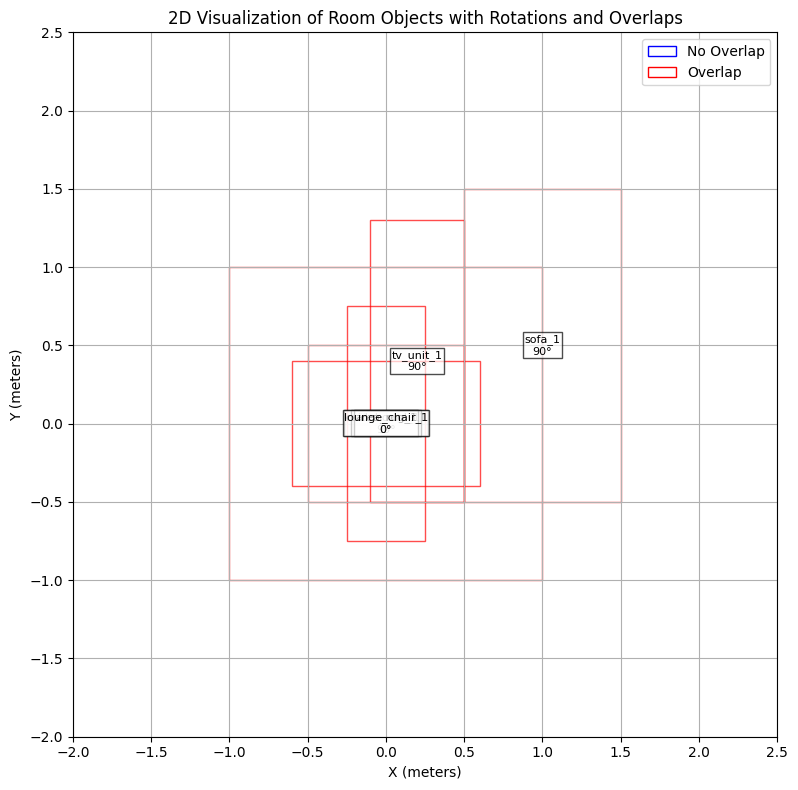

In [288]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.transforms import Affine2D
import numpy as np
from shapely.geometry import Polygon

# Assuming 'layout_graph' is already defined and enhanced
data = layout_graph.copy()

# Access the list of objects within 'objects_in_room'
objects = data.get('objects_in_room', [])

# Proceed only if 'objects_in_room' is a list
if not isinstance(objects, list):
    raise TypeError("'objects_in_room' should be a list of objects.")

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_aspect('equal')
ax.grid(True)
ax.set_xlabel('X (meters)')
ax.set_ylabel('Y (meters)')
ax.set_title('2D Visualization of Room Objects with Rotations and Overlaps')

# Process each object to create polygons
polygons = []
names = []

for obj in objects:
    try:
        x = obj['position']['x']
        y = obj['position']['y']
        length = obj['size_in_meters']['length']
        width = obj['size_in_meters']['width']
        angle = obj['rotation']['z_angle']
        
        theta = np.deg2rad(angle)
        rotation_matrix = np.array([
            [np.cos(theta), -np.sin(theta)],
            [np.sin(theta), np.cos(theta)]
        ])
        
        # Define local corners
        corners_local = np.array([
            [-length/2, -width/2],
            [length/2, -width/2],
            [length/2, width/2],
            [-length/2, width/2]
        ])
        
        # Rotate and translate corners
        rotated_corners = np.dot(corners_local, rotation_matrix.T)
        translated_corners = rotated_corners + np.array([x, y])
        
        polygons.append(Polygon(translated_corners))
        names.append(obj.get('new_object_id', 'Unnamed_Object'))
        
    except KeyError as e:
        print(f"Missing key {e} in object '{obj.get('new_object_id', 'Unknown')}'. Skipping this object.")
    except TypeError as e:
        print(f"Type error in object '{obj.get('new_object_id', 'Unknown')}': {e}. Skipping this object.")

# Detect overlaps
overlapping_indices = set()
overlapping_pairs = []

for i in range(len(polygons)):
    for j in range(i + 1, len(polygons)):
        if polygons[i].intersects(polygons[j]):
            overlapping_indices.add(i)
            overlapping_indices.add(j)
            overlapping_pairs.append((names[i], names[j]))

# Plot objects with rotations
for idx, obj in enumerate(objects):
    try:
        x = obj['position']['x']
        y = obj['position']['y']
        length = obj['size_in_meters']['length']
        width = obj['size_in_meters']['width']
        angle = obj['rotation']['z_angle']
        
        rect = patches.Rectangle(
            (-length/2, -width/2), length, width,
            linewidth=1, 
            edgecolor='red' if idx in overlapping_indices else 'blue',
            facecolor='none', 
            alpha=0.7
        )
        
        # Apply transformations
        t = Affine2D().rotate_deg(angle).translate(x, y)
        rect.set_transform(t + ax.transData)
        ax.add_patch(rect)
        
        # Add labels
        ax.text(x, y, f"{obj.get('new_object_id', 'Unnamed')}\n{angle}°", 
                ha='center', va='center', fontsize=8,
                bbox=dict(facecolor='white', alpha=0.7, pad=1))
    
    except KeyError as e:
        print(f"Missing key {e} in object '{obj.get('new_object_id', 'Unknown')}'. Skipping this object.")
    except TypeError as e:
        print(f"Type error in object '{obj.get('new_object_id', 'Unknown')}': {e}. Skipping this object.")

# Add legend and set limits
ax.legend(handles=[
    patches.Patch(facecolor='none', edgecolor='blue', label='No Overlap'),
    patches.Patch(facecolor='none', edgecolor='red', label='Overlap')
], loc='upper right')

# Calculate all bounds for setting plot limits
all_bounds = []
for poly in polygons:
    if not poly.is_empty:
        all_bounds.append(poly.bounds)  # bounds = (minx, miny, maxx, maxy)

if all_bounds:
    all_bounds = np.array(all_bounds)
    padding = 1.0
    ax.set_xlim(all_bounds[:, 0].min() - padding, all_bounds[:, 2].max() + padding)
    ax.set_ylim(all_bounds[:, 1].min() - padding, all_bounds[:, 3].max() + padding)
else:
    # Default limits if no polygons are present
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)

# Print overlap results
if overlapping_pairs:
    print("Overlapping objects:")
    for pair in overlapping_pairs:
        print(f"- {pair[0]} and {pair[1]}")
else:
    print("No overlaps detected.")

plt.tight_layout()
plt.show()


## Part 3. Refine design

In [183]:
class Agent:
    def __init__(self, name, system_message, access_token, schema):
        self.name = name
        self.system_message = system_message
        self.access_token = access_token
        self.schema = schema
        self.messages = []  

    def generate_response(self, user_input):
        prompt = f"{self.system_message}\nUser Input:\n{user_input}\n\n{self.name} Response:\n"
        response = gigachat_request(prompt, self.access_token, self.schema, temperature=0.7)
        if response:
            if isinstance(response, dict):
                response = json.dumps(response)  # Serialize dict to JSON string
            self.messages.append({'role': 'assistant', 'content': response})
        return response

    def last_message(self):
        return self.messages[-1] if self.messages else {}


class JSONSchemaAgent(Agent):
    def __init__(self, name, is_termination_msg, schema, access_token, system_message=""):
        super().__init__(name, system_message, access_token, schema)
        self.is_termination_msg = is_termination_msg

    def generate_response(self, user_input):
        result = self.get_human_input(user_input)
        if result:
            self.messages.append({'role': 'assistant', 'content': result})
        return result

    def get_human_input(self, prompt: str) -> str:
        try:
            # Parse JSON directly from the passed prompt
            json_data = json.loads(prompt)
            # Validate JSON against the schema
            validate(instance=json_data, schema=self.schema)
            return "SUCCESS"

        except json.JSONDecodeError:
            return "Failed to decode JSON from the agent's response."
        except ValidationError as e:
            # Generate feedback based on the type of validation error
            feedback = f"Validation error: {e.message}"
            if e.validator == "enum":
                allowed = e.schema.get("enum", [])
                feedback += f" Allowed values: {allowed}."
            elif e.validator == "required":
                missing = ", ".join(e.validator_value)
                feedback += f" Missing required properties: {missing}."
            return feedback
        except TypeError:
            return "Invalid type for JSON content."


class GroupChat:
    def __init__(self, agents, messages=None, max_round=15):
        self.agents = agents
        self.messages = messages if messages is not None else []
        self.max_round = max_round
        self.round = 0

    def agent_by_name(self, name):
        return next((agent for agent in self.agents if agent.name == name), None)

    def select_speaker(self, last_speaker):
        raise NotImplementedError("Subclasses should implement this method to select the next speaker.")

    def run(self):
        last_speaker = None
        while self.round < self.max_round:
            self.round += 1
            speaker = self.select_speaker(last_speaker)
            if speaker is None:
                break
            user_input = self.messages[-1]["content"] if self.messages else ""
            response = speaker.generate_response(user_input)
            if response:
                self.messages.append({'role': 'assistant', 'content': response})
                last_speaker = speaker
            else:
                break
        return self.messages

class LayoutRefinerGroupChat(GroupChat):
    def select_speaker(self, last_speaker):
        last_speaker_name = last_speaker.name if last_speaker else "Admin"
        last_message_content = self.messages[-1]["content"] if self.messages else None

        if last_speaker_name == "Admin":
            return self.agent_by_name("Layout_refiner")
        elif last_speaker_name == "Layout_refiner":
            return self.agent_by_name("Json_schema_debugger")
        elif last_speaker_name == "Json_schema_debugger":
            if last_message_content and "SUCCESS" not in last_message_content:
                return self.agent_by_name("Layout_refiner")
            else:
                return None
        else:
            return None

    def add_message(self, message):
        self.messages.append(message)

    def run(self):
        last_speaker = None
        json_response = None
        validation_result = None
        while self.round < self.max_round:
            self.round += 1
            speaker = self.select_speaker(last_speaker)
            if speaker is None:
                break
            user_input = self.messages[-1]["content"] if self.messages else ""
            response = speaker.generate_response(user_input)
            if response:
                self.add_message({'role': 'assistant', 'content': response})
                last_speaker = speaker
                if speaker.name == "Layout_refiner":
                    try:
                        json_response = json.loads(response)
                    except json.JSONDecodeError:
                        print("Layout_refiner returned invalid JSON.")
                elif speaker.name == "Json_schema_debugger":
                    validation_result = response.strip()
                    if validation_result != "SUCCESS":
                        print("JSON validation failed.")
                        break  # Stop the process or handle the error
            else:
                print(f"Speaker '{speaker.name}' did not return a response.")
                break
        if validation_result == "SUCCESS":
            return self.messages, json_response
        else:
            return self.messages, None
        
        
import logging

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(levelname)s: %(message)s')


class SceneGraphRefiner:
    def __init__(self, scene_graph, access_token, layout_refiner_schema, room_priors=None):
        """
        Initializes the SceneGraphRefiner.

        Args:
            scene_graph (dict): The initial scene graph.
            access_token (str): Access token for API interactions.
            layout_refiner_schema (dict): JSON schema for validation.
            room_priors (dict, optional): Additional priors based on room dimensions.
        """
        self.scene_graph = scene_graph
        self.access_token = access_token
        self.layout_refiner_schema = layout_refiner_schema
        self.room_priors = room_priors or {}

    def refine_design(self, verbose=False):
        """
        Refines the scene graph by determining spatial relationships based on object attributes.

        Args:
            verbose (bool): If True, outputs detailed logs.

        Returns:
            dict: The refined scene graph.
        """
        cluster_dict = get_cluster_objects(self.scene_graph["objects_in_room"])
        if verbose:
            logging.info("Clustered Objects:")
            logging.info(json.dumps({str(k): v for k, v in cluster_dict.items()}, indent=4))

        if not cluster_dict:
            if verbose:
                logging.info("No clusters found. Returning original scene graph.")
            return self.scene_graph

        # Initialize agents
        user_proxy, json_schema_debugger, layout_refiner = get_refiner_agents(
            self.access_token,
            self.layout_refiner_schema
        )

        for cluster_key, cluster_objects in cluster_dict.items():
            parent_id = list(cluster_key)[0]
            child_ids = [obj_id for obj_id in cluster_objects if obj_id != parent_id]

            if verbose:
                logging.info(f"Refining Parent ID: {parent_id} with {len(child_ids)} children.")

            # Interact with API to determine prepositions
            try:
                groupchat = LayoutRefinerGroupChat(
                    agents=[user_proxy, layout_refiner, json_schema_debugger],
                    messages=[],
                    max_round=15
                )
                groupchat.add_message({
                    'role': 'system',
                    'content': f"""Parent Object: {parent_id}
Children Objects: {child_ids}
Determine the appropriate prepositions for each child object relative to the parent object."""
                })

                messages, json_response = groupchat.run()

                if verbose:
                    logging.info("Final Message from Chat Service:")
                    logging.info(json_response)

                if not json_response:
                    raise ValueError("No JSON content found in the response.")

                # Validate the structure of json_response
                validate(instance=json_response, schema=self.layout_refiner_schema)

                # Update each child object's placement with relationship to the parent
                for obj in json_response["objects_in_room"]:
                    # Map 'object_id' from response to 'new_object_id' in scene graph
                    child_obj = next(
                        (o for o in self.scene_graph["objects_in_room"] if o["new_object_id"] == obj["object_id"]),
                        None
                    )
                    if child_obj:
                        # Ensure 'placement' and 'objects_in_room' exist in child_obj
                        if "placement" not in child_obj:
                            child_obj["placement"] = {}
                        if "objects_in_room" not in child_obj["placement"]:
                            child_obj["placement"]["objects_in_room"] = []
                        
                        # Create relationship with the parent
                        relationship = {
                            "object_id": parent_id,  # Parent ID
                            "preposition": obj["preposition"],
                            "is_adjacent": obj["is_adjacent"]
                        }
                        
                        # Remove existing relationships with the parent
                        child_obj["placement"]["objects_in_room"] = [
                            rel for rel in child_obj["placement"]["objects_in_room"]
                            if rel["object_id"] != parent_id
                        ]
                        
                        # Add new relationship
                        child_obj["placement"]["objects_in_room"].append(relationship)

            except json.JSONDecodeError as e:
                if verbose:
                    logging.error(f"Error decoding JSON: {e}")
            except ValidationError as e:
                if verbose:
                    logging.error(f"JSON Validation Error: {e.message}")
            except ValueError as e:
                if verbose:
                    logging.error(f"Error: {e}")
            except Exception as e:
                if verbose:
                    logging.error(f"Unexpected error: {e}")

        return self.scene_graph

def get_refiner_agents(access_token, layout_refiner_schema):
    user_proxy = Agent(
        name="Admin",
        system_message="Administrative Agent responsible for initiating layout refinement interactions.",
        access_token=access_token,
        schema=layout_refiner_schema
    )

    json_schema_debugger = JSONSchemaAgent(
        name="Json_schema_debugger",
        is_termination_msg=lambda msg: "SUCCESS" in msg,
        schema=layout_refiner_schema,
        access_token=access_token,
        system_message=(
            "You are a JSON Schema Debugger. Your task is to validate the following JSON data against the provided schema. "
            "If the JSON is valid, respond with 'SUCCESS'. If there are validation errors, respond with the error messages."
        )
    )

    layout_refiner = Agent(
        name="Layout_refiner",
        system_message=f"""Layout Refiner Agent: Optimize spatial layout by refining placements and ensuring clear relationships.
- Evaluate initial positioning: Start with each object’s initial preposition (e.g., 'on', 'left of', etc.) in relation to its parent object.
- Propose adjustments: Suggest secondary placements to clarify spatial relationships, considering proximity, alignment, and visual coherence.
- Validate relative positioning: Ensure objects maintain logical relationships with the parent object and among each other, respecting adjacency and orientation constraints.
- Structured Output: Strictly follow the JSON schema provided below to ensure output consistency and enable further processing.

JSON Schema for Output:
{json.dumps(layout_refiner_schema, indent=4)}

**Important**: The response must be a valid JSON object that conforms to the above schema. Do not include any additional text or explanations.

**Note**: Ensure that rugs are placed on the floor and other objects are placed on rugs. Rugs should not be placed on top of other objects.""",
        access_token=access_token,
        schema=layout_refiner_schema
    )
    return user_proxy, json_schema_debugger, layout_refiner


def get_cluster_objects(objects_in_room):
    """
    Build an undirected graph of adjacency among objects_in_room 
    and find connected components => each is a cluster.

    Args:
        objects_in_room (list): List of objects in the room.

    Returns:
        dict: A dictionary with clusters as keys and lists of object IDs as values.
    """
    G = nx.Graph()
    for obj in objects_in_room:
        G.add_node(obj["new_object_id"])
    for obj in objects_in_room:
        obj_id = obj["new_object_id"]
        for rel in obj["placement"]["objects_in_room"]:
            other_id = rel["object_id"]  # Reference to other object
            if other_id != obj_id:  # Avoid self-loop
                G.add_edge(obj_id, other_id)
    connected_comps = list(nx.connected_components(G))

    cluster_dict = {}
    for comp in connected_comps:
        # Identify base objects: objects with no parents
        is_base = True
        for obj_id in comp:
            obj = next((o for o in objects_in_room if o["new_object_id"] == obj_id), None)
            if obj and obj["placement"]["objects_in_room"]:
                is_base = False
                break
        if is_base:
            continue  # Skip clustering for base objects
        if len(comp) > 1:
            cluster_dict[frozenset(comp)] = list(comp)
    return cluster_dict


In [184]:
room_dimensions = (22.0, 24.0, 2.7)
room_priors = get_room_priors(room_dimensions)

if not access_token:
    print("Missing GIGACHAT_ACCESS_TOKEN")
else:
    refiner = SceneGraphRefiner(
        scene_graph=corrected_scene_graph,
        layout_refiner_schema=layout_refiner_schema,
        access_token=access_token,
        room_priors=room_priors,
    )

    refined_scene = refiner.refine_design(verbose=True)
    print("Final Layout:")
    print(json.dumps(refined_scene, indent=4))

INFO: Clustered Objects:
INFO: {
    "frozenset({'area_rug_1', 'coffee_table_1', 'lounge_chair_1', 'sofa_1'})": [
        "area_rug_1",
        "coffee_table_1",
        "lounge_chair_1",
        "sofa_1"
    ]
}
INFO: Refining Parent ID: area_rug_1 with 3 children.
INFO: Final Message from Chat Service:
INFO: None
ERROR: Error: No JSON content found in the response.


Request failed: 401 Client Error: Unauthorized for url: https://gigachat-preview.devices.sberbank.ru/api/v1/chat/completions
Speaker 'Layout_refiner' did not return a response.
Final Layout:
{
    "objects_in_room": [
        {
            "new_object_id": "sofa_1",
            "style": "Modern",
            "material": "Leather",
            "size_in_meters": {
                "length": 2.0,
                "width": 1.0,
                "height": 0.8
            },
            "is_on_the_floor": true,
            "facing": "north_wall",
            "placement": {
                "room_layout_elements": [
                    {
                        "layout_element_id": "north_wall",
                        "preposition": "on"
                    }
                ],
                "objects_in_room": []
            }
        },
        {
            "new_object_id": "coffee_table_1",
            "style": "Modern",
            "material": "Glass and Metal",
            "size_in_meters

In [ ]:
import json
import re
import networkx as nx
from jsonschema import validate, ValidationError
import logging

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(levelname)s: %(message)s')

# Schema and constants
layout_refiner_schema = {
    "type": "object",
    "properties": {
        "objects_in_room": {
            "type": "array",
            "items": {
                "type": "object",
                "properties": {
                    "object_id": {"type": "string"},
                    "preposition": {
                        "type": "string",
                        "enum": ["on", "left of", "right of", "in front of", "behind", "under", "above"]
                    },
                    "is_adjacent": {"type": "boolean"}
                },
                "required": ["object_id", "preposition", "is_adjacent"]
            }
        }
    },
    "required": ["objects_in_room"]
}

ROOM_LAYOUT_ELEMENTS = ["south_wall", "north_wall", "west_wall", "east_wall", "ceiling", "middle_of_the_room"]
DIRECTIONAL_PREPOSITIONS = ["left of", "right of", "in front of", "behind"]

class Agent:
    def __init__(self, name, system_message, access_token, schema):
        self.name = name
        self.system_message = system_message
        self.access_token = access_token
        self.schema = schema
        self.messages = []

    def generate_response(self, user_input):
        prompt = f"{self.system_message}\nUser Input:\n{user_input}"
        response = self.mock_gigachat_request(prompt)
        if response:
            self.messages.append({'role': 'assistant', 'content': response})
        return response

    def mock_gigachat_request(self, prompt):
        # Simulated LLM response for demonstration
        return json.dumps({
            "objects_in_room": [
                {"object_id": "coffee_table_1", "preposition": "on", "is_adjacent": True},
                {"object_id": "lounge_chair_1", "preposition": "left of", "is_adjacent": False}
            ]
        })

class JSONSchemaAgent(Agent):
    def __init__(self, name, schema, access_token):
        super().__init__(
            name=name,
            system_message="JSON Schema Validator Agent",
            access_token=access_token,
            schema=schema
        )

    def generate_response(self, user_input):
        try:
            json_data = json.loads(user_input)
            validate(instance=json_data, schema=self.schema)
            return "SUCCESS"
        except (json.JSONDecodeError, ValidationError) as e:
            return f"Validation Error: {str(e)}"

class LayoutRefinerGroupChat:
    def __init__(self, agents, max_round=10):
        self.agents = {agent.name: agent for agent in agents}
        self.max_round = max_round
        self.messages = []

    def run(self):
        current_speaker = "Layout_refiner"
        for _ in range(self.max_round):
            agent = self.agents[current_speaker]
            response = agent.generate_response(self.messages[-1]["content"] if self.messages else "")
            
            self.messages.append({
                'role': agent.name,
                'content': response
            })
            
            if current_speaker == "Json_schema_debugger":
                if "SUCCESS" in response:
                    break
                current_speaker = "Layout_refiner"
            else:
                current_speaker = "Json_schema_debugger"
        
        return self.messages

class SceneGraphRefiner:
    def __init__(self, scene_graph, access_token, layout_refiner_schema, room_priors=None):
        self.scene_graph = scene_graph
        self.access_token = access_token
        self.layout_refiner_schema = layout_refiner_schema
        self.room_priors = room_priors or {}
        self.initialize_agents()

    def initialize_agents(self):
        self.layout_refiner = Agent(
            name="Layout_refiner",
            system_message="Specialized in spatial relationship reasoning",
            access_token=self.access_token,
            schema=self.layout_refiner_schema
        )
        
        self.json_validator = JSONSchemaAgent(
            name="Json_schema_debugger",
            schema=self.layout_refiner_schema,
            access_token=self.access_token
        )

    def refine_design(self, verbose=False):
        clusters = self.get_cluster_objects()
        for cluster in clusters:
            self.process_cluster(cluster, verbose)
        return self.scene_graph

    def get_cluster_objects(self):
        G = nx.Graph()
        for obj in self.scene_graph["objects_in_room"]:
            G.add_node(obj["new_object_id"])
            for rel in obj["placement"]["objects_in_room"]:
                G.add_edge(obj["new_object_id"], rel["object_id"])
        return list(nx.connected_components(G))

    def process_cluster(self, cluster, verbose):
        groupchat = LayoutRefinerGroupChat(
            agents=[self.layout_refiner, self.json_validator],
            max_round=8
        )
        
        prompt = self.create_cluster_prompt(cluster)
        groupchat.messages.append({'role': 'user', 'content': prompt})
        
        messages = groupchat.run()
        
        if verbose:
            self.log_processing_results(messages)

    def create_cluster_prompt(self, cluster):
        return f"""Process these objects: {', '.join(cluster)}
Use prepositions from: {DIRECTIONAL_PREPOSITIONS}
Consider room elements: {ROOM_LAYOUT_ELEMENTS}"""

    def log_processing_results(self, messages):
        logging.info("Processing Log:")
        for msg in messages:
            logging.info(f"{msg['role']}: {msg['content'][:100]}...")

# Example usage
def get_room_priors(dimensions):
    return {
        "wall_clearance": 0.5,
        "ceiling_height": dimensions[2] - 0.3
    }

if __name__ == "__main__":
    # Example scene graph
    corrected_scene_graph = {
        "objects_in_room": [
            {
                "new_object_id": "sofa_1",
                "placement": {"objects_in_room": []}
            },
            {
                "new_object_id": "coffee_table_1",
                "placement": {"objects_in_room": []}
            }
        ]
    }

    # Runtime configuration
    room_dimensions = (22.0, 24.0, 2.7)
    room_priors = get_room_priors(room_dimensions)
    access_token = "mock_access_token"

    refiner = SceneGraphRefiner(
        scene_graph=corrected_scene_graph,
        access_token=access_token,
        layout_refiner_schema=layout_refiner_schema,
        room_priors=room_priors
    )

    refined_scene = refiner.refine_design(verbose=True)
    print("Refined Scene Graph:")
    print(json.dumps(refined_scene, indent=2))

In [175]:
room_dimensions = (22.0, 24.0, 2.7)
room_priors = get_room_priors(room_dimensions)

if not access_token:
    print("Missing GIGACHAT_ACCESS_TOKEN")
else:
    refiner = SceneGraphRefiner(
        scene_graph=corrected_scene_graph,
        layout_refiner_schema=layout_refiner_schema,
        access_token=access_token,
        room_priors=room_priors,
    )

    refined_scene = refiner.refine_design(verbose=True)
    print("Final Layout:")
    print(json.dumps(refined_scene, indent=4))

INFO: Clustered Objects:
INFO: {
    "frozenset({'area_rug_1', 'coffee_table_1', 'lounge_chair_1', 'sofa_1'})": [
        "area_rug_1",
        "coffee_table_1",
        "lounge_chair_1",
        "sofa_1"
    ]
}
INFO: Refining Parent ID: area_rug_1 with 3 children.
INFO: Final Message from Chat Service:
INFO: None
ERROR: Error: No JSON content found in the response.


JSON validation error: '' is not one of ['on', 'left of', 'right of', 'in front', 'behind', 'under', 'above']
Speaker 'Layout_refiner' did not return a response.
Refined Scene Graph:
{
    "objects_in_room": [
        {
            "new_object_id": "sofa_1",
            "style": "Modern",
            "material": "Leather",
            "size_in_meters": {
                "length": 2.0,
                "width": 1.0,
                "height": 0.8
            },
            "is_on_the_floor": true,
            "facing": "north_wall",
            "placement": {
                "room_layout_elements": [
                    {
                        "layout_element_id": "north_wall",
                        "preposition": "on"
                    }
                ],
                "objects_in_room": []
            }
        },
        {
            "new_object_id": "coffee_table_1",
            "style": "Modern",
            "material": "Glass and Metal",
            "size_in_meters": {
   

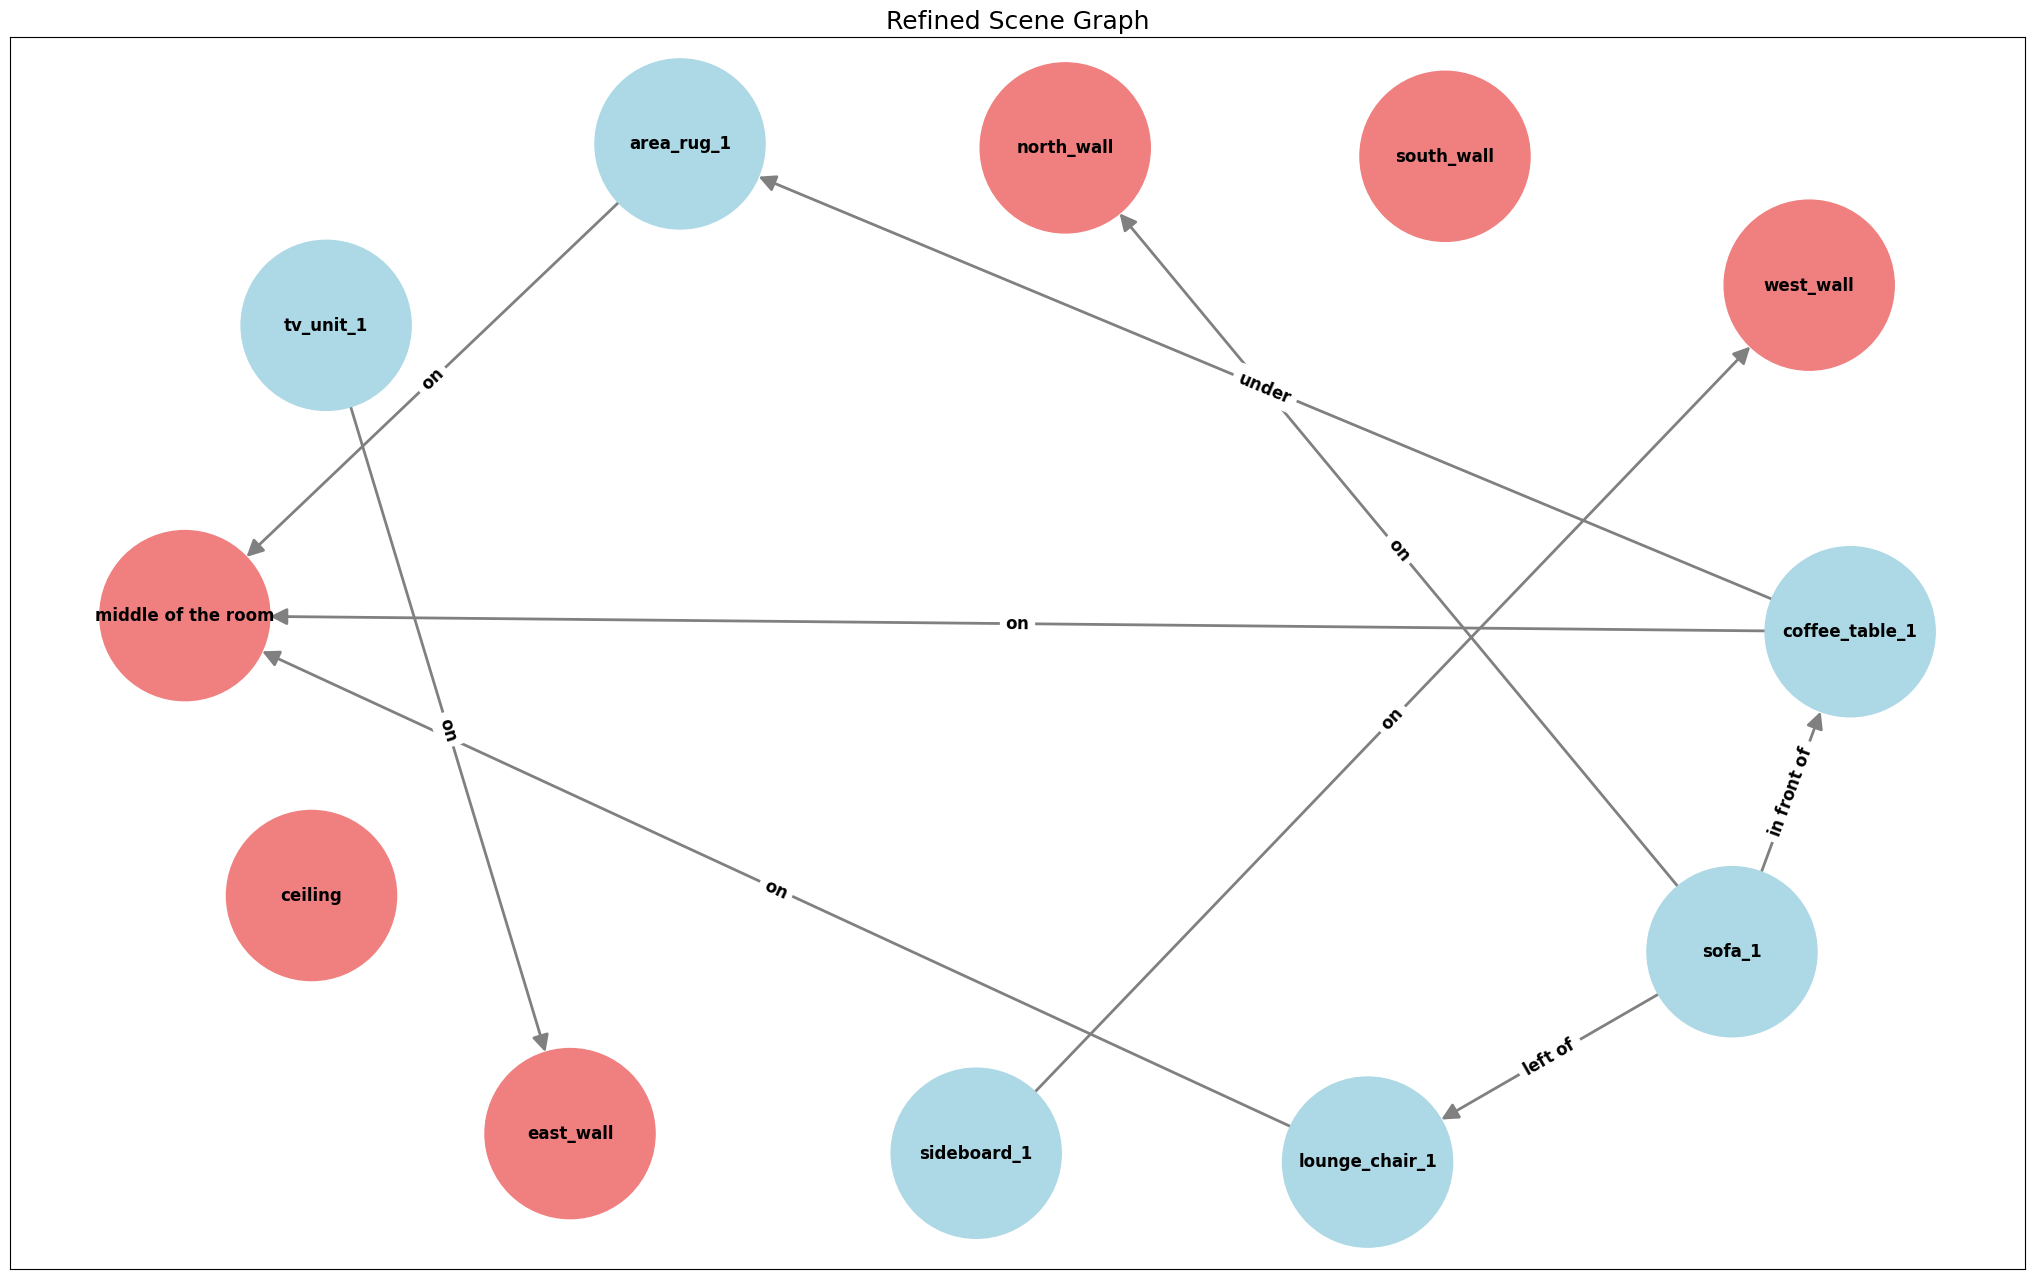

In [176]:
title_refined = "Refined Scene Graph"
visualize_scene_graph(refined_scene, title_refined)

In [ ]:
# Corrected Scene Graph
corrected_scene_graph = {
    'objects_in_room': [
        {
            'new_object_id': 'sofa_1',
            'style': 'Modern',
            'material': 'Leather',
            'size_in_meters': {'length': 2.0, 'width': 1.0, 'height': 0.8},
            'is_on_the_floor': True,
            'facing': 'north_wall',
            'placement': {
                'room_layout_elements': [
                    {'layout_element_id': 'north_wall', 'preposition': 'on'}
                ],
                'objects_in_room': []
            }
        },
        {
            'new_object_id': 'coffee_table_1',
            'style': 'Modern',
            'material': 'Glass and Metal',
            'size_in_meters': {'length': 1.25, 'width': 1.05, 'height': 0.4},
            'is_on_the_floor': True,
            'facing': 'middle of the room',
            'placement': {
                'room_layout_elements': [
                    {'layout_element_id': 'middle of the room', 'preposition': 'on'}
                ],
                'objects_in_room': [
                    {
                        'object_id': 'sofa_1',  # Reference to other object
                        'preposition': 'in front of',
                        'is_adjacent': True
                    }
                ]
            }
        },
        {
            'new_object_id': 'tv_unit_1',
            'style': 'Modern',
            'material': 'MDF',
            'size_in_meters': {'length': 1.8, 'width': 0.6, 'height': 0.4},
            'is_on_the_floor': True,
            'facing': 'east_wall',
            'placement': {
                'room_layout_elements': [
                    {'layout_element_id': 'east_wall', 'preposition': 'on'}
                ],
                'objects_in_room': []
            }
        },
        {
            'new_object_id': 'sideboard_1',
            'style': 'Modern',
            'material': 'Wood',
            'size_in_meters': {'length': 1.5, 'width': 0.5, 'height': 0.8},
            'is_on_the_floor': True,
            'facing': 'west_wall',
            'placement': {
                'room_layout_elements': [
                    {'layout_element_id': 'west_wall', 'preposition': 'on'}
                ],
                'objects_in_room': []
            }
        },
        {
            'new_object_id': 'area_rug_1',
            'style': 'Modern',
            'material': 'Synthetic Fiber',
            'size_in_meters': {'length': 2.0, 'width': 2.0, 'height': 0.02},
            'is_on_the_floor': True,
            'facing': 'middle of the room',
            'placement': {
                'room_layout_elements': [
                    {'layout_element_id': 'middle of the room', 'preposition': 'on'}
                ],
                'objects_in_room': [
                    {
                        'object_id': 'coffee_table_1',  # Reference to other object
                        'preposition': 'under',
                        'is_adjacent': True
                    }
                ]
            }
        },
        {
            'new_object_id': 'lounge_chair_1',
            'style': 'Modern',
            'material': 'Fabric',
            'size_in_meters': {'length': 2.05, 'width': 1.05, 'height': 0.8},
            'is_on_the_floor': True,
            'facing': 'middle of the room',
            'placement': {
                'room_layout_elements': [
                    {'layout_element_id': 'middle of the room', 'preposition': 'on'}
                ],
                'objects_in_room': [
                    {
                        'object_id': 'sofa_1',  
                        'preposition': 'left of',
                        'is_adjacent': True
                    }
                ]
            }
        }
    ]
}


In [ ]:
corrected_scene_graph["objects_in_room"] = preprocess_scene_graph(corrected_scene_graph["objects_in_room"])
G_ref = build_graph(corrected_scene_graph["objects_in_room"])
G_ref, corrected_scene_graph["objects_in_room"] = handle_under_prepositions(G_ref, corrected_scene_graph["objects_in_room"])
visualize_G(G_ref, output_path=f"{output_dir}/ref_graph.png", prompt_text="Refined Scene Graph")

In [ ]:
import networkx as nx

def extract_prepositions_from_graph(G, scene_graph):
    
    updated_scene_graph = {
        'objects_in_room': []
    }

    # Iterate through the objects in the scene graph
    for obj in scene_graph['objects_in_room']:
        obj_id = obj['new_object_id']
        updated_obj = {
            'new_object_id': obj_id,
            'style': obj['style'],
            'material': obj['material'],
            'size_in_meters': obj['size_in_meters'],
            'is_on_the_floor': obj['is_on_the_floor'],
            'facing': obj['facing'],
            'placement': {
                'room_layout_elements': [],
                'objects_in_room': []
            }
        }

        # Update room layout elements with prepositions from G
        for layout_element in obj['placement']['room_layout_elements']:
            layout_id = layout_element['layout_element_id']
            if G.has_edge(obj_id, layout_id):
                edge_data = G[obj_id][layout_id]['weight']
                updated_obj['placement']['room_layout_elements'].append({
                    'layout_element_id': layout_id,
                    'preposition': edge_data.get('preposition', '')
                })
            else:
                updated_obj['placement']['room_layout_elements'].append(layout_element)

        # Update objects in room with prepositions from G
        for other_obj in obj['placement']['objects_in_room']:
            other_obj_id = other_obj['object_id']
            if G.has_edge(obj_id, other_obj_id):
                edge_data = G[obj_id][other_obj_id]['weight']
                updated_obj['placement']['objects_in_room'].append({
                    'object_id': other_obj_id,
                    'preposition': edge_data.get('preposition', ''),
                    'is_adjacent': edge_data.get('adjacency', True)
                })
            else:
                updated_obj['placement']['objects_in_room'].append(other_obj)

        updated_scene_graph['objects_in_room'].append(updated_obj)

    return updated_scene_graph

updated_scene_graph = extract_prepositions_from_graph(G_ref, corrected_scene_graph)
updated_scene_graph

In [125]:
updated_scene_graph = {'objects_in_room': [{'new_object_id': 'sofa_1',
   'style': 'Modern',
   'material': 'Leather',
   'size_in_meters': {'length': 2.0, 'width': 1.0, 'height': 0.8},
   'is_on_the_floor': True,
   'facing': 'north_wall',
   'placement': {'room_layout_elements': [{'layout_element_id': 'north_wall',
      'preposition': 'on'}],
    'objects_in_room': []}},
  {'new_object_id': 'coffee_table_1',
   'style': 'Modern',
   'material': 'Glass and Metal',
   'size_in_meters': {'length': 1.25, 'width': 1.05, 'height': 0.4},
   'is_on_the_floor': True,
   'facing': 'middle of the room',
   'placement': {'room_layout_elements': [{'layout_element_id': 'middle of the room',
      'preposition': 'on'}],
    'objects_in_room': [{'object_id': 'sofa_1',
      'preposition': 'in front of',
      'is_adjacent': True}]}},
  {'new_object_id': 'tv_unit_1',
   'style': 'Modern',
   'material': 'MDF',
   'size_in_meters': {'length': 1.8, 'width': 0.6, 'height': 0.4},
   'is_on_the_floor': True,
   'facing': 'east_wall',
   'placement': {'room_layout_elements': [{'layout_element_id': 'east_wall',
      'preposition': 'on'}],
    'objects_in_room': []}},
  {'new_object_id': 'sideboard_1',
   'style': 'Modern',
   'material': 'Wood',
   'size_in_meters': {'length': 1.5, 'width': 0.5, 'height': 0.8},
   'is_on_the_floor': True,
   'facing': 'west_wall',
   'placement': {'room_layout_elements': [{'layout_element_id': 'west_wall',
      'preposition': 'on'}],
    'objects_in_room': []}},
  {'new_object_id': 'area_rug_1',
   'style': 'Modern',
   'material': 'Synthetic Fiber',
   'size_in_meters': {'length': 2.0, 'width': 2.0, 'height': 0.02},
   'is_on_the_floor': True,
   'facing': 'middle of the room',
   'placement': {'room_layout_elements': [{'layout_element_id': 'middle of the room',
      'preposition': 'on'}],
    'objects_in_room': [{'object_id': 'coffee_table_1',
      'preposition': 'under',
      'is_adjacent': True}]}},
  {'new_object_id': 'lounge_chair_1',
   'style': 'Modern',
   'material': 'Fabric',
   'size_in_meters': {'length': 2.05, 'width': 1.05, 'height': 0.8},
   'is_on_the_floor': True,
   'facing': 'middle of the room',
   'placement': {'room_layout_elements': [{'layout_element_id': 'middle of the room',
      'preposition': 'on'}],
    'objects_in_room': [{'object_id': 'sofa_1',
      'preposition': 'left of',
      'is_adjacent': True}]}}]}

In [15]:
final = {
    "objects_in_room": [
        {
            "new_object_id": "sofa_1",
            "style": "Modern",
            "material": "Leather",
            "size_in_meters": {"length": 2.0, "width": 1.0, "height": 0.8},
            "is_on_the_floor": True,
            "facing": "north_wall",
            "placement": {
                "room_layout_elements": [
                    {"layout_element_id": "north_wall", "preposition": "on"}
                ],
                "objects_in_room": []
            },
            "rotation": {"z_angle": 0.0},
            "cluster": {
                "constraint_area": {
                    "x_neg": 0.5,
                    "x_pos": 0.5,
                    "y_neg": 0.3,
                    "y_pos": 0.3
                }
            },
            "position": {"x": 2.0, "y": 3.0, "z": 0.4}
        },
        {
            "new_object_id": "coffee_table_1",
            "style": "Modern",
            "material": "Glass and Metal",
            "size_in_meters": {"length": 1.25, "width": 1.05, "height": 0.4},
            "is_on_the_floor": True,
            "facing": "middle of the room",
            "placement": {
                "room_layout_elements": [
                    {"layout_element_id": "middle of the room", "preposition": "on"}
                ],
                "objects_in_room": [
                    {"object_id": "sofa_1", "preposition": "in front of", "is_adjacent": True}
                ]
            },
            "rotation": {"z_angle": 0.0},
            "cluster": {
                "constraint_area": {
                    "x_neg": 0.3,
                    "x_pos": 0.3,
                    "y_neg": 0.4,
                    "y_pos": 0.4
                }
            },
            "position": {"x": 4.0, "y": 3.5, "z": 0.2}
        },
        {
            "new_object_id": "tv_unit_1",
            "style": "Modern",
            "material": "MDF",
            "size_in_meters": {"length": 1.8, "width": 0.6, "height": 0.4},
            "is_on_the_floor": True,
            "facing": "east_wall",
            "placement": {
                "room_layout_elements": [
                    {"layout_element_id": "east_wall", "preposition": "on"}
                ],
                "objects_in_room": []
            },
            "rotation": {"z_angle": 90.0},
            "cluster": {
                "constraint_area": {
                    "x_neg": 0.6,
                    "x_pos": 0.6,
                    "y_neg": 0.2,
                    "y_pos": 0.2
                }
            },
            "position": {"x": 5.0, "y": 6.0, "z": 0.4}
        },
        {
            "new_object_id": "sideboard_1",
            "style": "Modern",
            "material": "Wood",
            "size_in_meters": {"length": 1.5, "width": 0.5, "height": 0.8},
            "is_on_the_floor": True,
            "facing": "west_wall",
            "placement": {
                "room_layout_elements": [
                    {"layout_element_id": "west_wall", "preposition": "on"}
                ],
                "objects_in_room": []
            },
            "rotation": {"z_angle": 270.0},
            "cluster": {
                "constraint_area": {
                    "x_neg": 0.4,
                    "x_pos": 0.4,
                    "y_neg": 0.3,
                    "y_pos": 0.3
                }
            },
            "position": {"x": 1.0, "y": 1.0, "z": 0.4}
        },
        {
            "new_object_id": "area_rug_1",
            "style": "Modern",
            "material": "Synthetic Fiber",
            "size_in_meters": {"length": 2.0, "width": 2.0, "height": 0.02},
            "is_on_the_floor": True,
            "facing": "middle of the room",
            "placement": {
                "room_layout_elements": [
                    {"layout_element_id": "middle of the room", "preposition": "on"}
                ],
                "objects_in_room": [
                    {"object_id": "coffee_table_1", "preposition": "under", "is_adjacent": True}
                ]
            },
            "rotation": {"z_angle": 0.0},
            "cluster": {
                "constraint_area": {
                    "x_neg": 0.5,
                    "x_pos": 0.5,
                    "y_neg": 0.5,
                    "y_pos": 0.5
                }
            },
            "position": {"x": 3.0, "y": 2.0, "z": 0.02}
        },
        {
            "new_object_id": "lounge_chair_1",
            "style": "Modern",
            "material": "Fabric",
            "size_in_meters": {"length": 2.05, "width": 1.05, "height": 0.8},
            "is_on_the_floor": True,
            "facing": "middle of the room",
            "placement": {
                "room_layout_elements": [
                    {"layout_element_id": "middle of the room", "preposition": "on"}
                ],
                "objects_in_room": [
                    {"object_id": "sofa_1", "preposition": "left of", "is_adjacent": True}
                ]
            },
            "rotation": {"z_angle": 0.0},
            "cluster": {
                "constraint_area": {
                    "x_neg": 0.6,
                    "x_pos": 0.6,
                    "y_neg": 0.4,
                    "y_pos": 0.4
                }
            },
            "position": {"x": 1.5, "y": 3.5, "z": 0.4}
        }
    ]
}


In [16]:
final

{'objects_in_room': [{'new_object_id': 'sofa_1',
   'style': 'Modern',
   'material': 'Leather',
   'size_in_meters': {'length': 2.0, 'width': 1.0, 'height': 0.8},
   'is_on_the_floor': True,
   'facing': 'north_wall',
   'placement': {'room_layout_elements': [{'layout_element_id': 'north_wall',
      'preposition': 'on'}],
    'objects_in_room': []},
   'rotation': {'z_angle': 0.0},
   'cluster': {'constraint_area': {'x_neg': 0.5,
     'x_pos': 0.5,
     'y_neg': 0.3,
     'y_pos': 0.3}},
   'position': {'x': 2.0, 'y': 3.0, 'z': 0.4}},
  {'new_object_id': 'coffee_table_1',
   'style': 'Modern',
   'material': 'Glass and Metal',
   'size_in_meters': {'length': 1.25, 'width': 1.05, 'height': 0.4},
   'is_on_the_floor': True,
   'facing': 'middle of the room',
   'placement': {'room_layout_elements': [{'layout_element_id': 'middle of the room',
      'preposition': 'on'}],
    'objects_in_room': [{'object_id': 'sofa_1',
      'preposition': 'in front of',
      'is_adjacent': True}]},
  

In [17]:
file_name = 'final_scene.json'
with open(file_name, 'w') as json_file:
    json.dump(final, json_file, indent=4)

print(f"Scene saved to {file_name}")

Scene saved to final_scene.json
